# MVP Análise de Dados e Boas Práticas

**Nome:** André Camatta

**Dataset:** [Lending Club 2007-2020Q3](https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1?utm_source=chatgpt.com)

## Sumário

- Descrição do problema
  - Problema de negócio
  - Objetivo geral
  - Objetivos específicos
  - O que é peer-to-peer lending (P2P)?
  - Contexto de P2P lending no Brasil
  - Conjunto de dados
  - Atributos mais relevantes
  - Restrições e condições para seleção dos dados
  - Hipóteses
- Importação das bibliotecas
- Carga de dados
- Análise exploratória dos dados
  - Visão geral do dataset
  - Seleção das variáveis-chave e análise sistemática de associação
  - Análise de valores faltantes e inconsistências
  - Resumo estatístico – variáveis numéricas
  - Resumo estatístico – variáveis categóricas
  - Análise de valores extremos (outliers)
  - Análise comparativa das variáveis numéricas: distribuições por adimplência
  - Análise de variáveis categóricas
  - Análise temporal por data de emissão
  - Análise de correlação entre variáveis explicativas
  - Análise geoespacial da inadimplência por estado
- Pré-processamento dos dados
  - Recarregamento dos dados
  - Preparação do dataset para modelagem
  - Escolha das transformações das variáveis categóricas (encoding)
  - Transformações personalizadas
  - Definição do pipeline de pré-processamento
  - Configuração da validação cruzada e verificação final
  - Verificação do pré-processamento
- Modelagem preditiva com LightGBM
- Conclusão final
- ANEXO A – Pipeline de anonimização

## Descrição do problema

### Problema de negócio

No mercado de empréstimos peer-to-peer (P2P), o desafio central para a plataforma e para os investidores é **identificar, no momento da concessão, quais empréstimos têm maior probabilidade de se tornarem inadimplentes**. Uma previsão incorreta resulta em perdas financeiras para os investidores.

### Objetivo geral

Desenvolver e avaliar um modelo de machine learning capaz de **prever o risco de default** para empréstimos da plataforma Lending Club, utilizando exclusivamente informações disponíveis no momento da originação do contrato.

Tipo de aprendizado: **Supervisionado – classificação binária**.

### Objetivos específicos

Para atingir o objetivo geral, os seguintes passos serão executados:

Etapas obrigatórias:

1.  **Análise exploratória de dados (EDA):** Investigar o conjunto de dados para identificar padrões, tratar inconsistências e validar hipóteses sobre os fatores de risco.
2.  **Pré-processamento e engenharia de features:** Preparar os dados para modelagem, tratando valores ausentes, transformando variáveis e selecionando os atributos mais preditivos.

Etapas adicionais (opcionais, mas recomendadas):

3.  **Treinamento do modelo:** Implementar um modelo de classificação para estimar a probabilidade de default.
4.  **Avaliação de performance:** Medir a eficácia do modelo utilizando métricas adequadas para classificação desbalanceada.

### O que é peer-to-peer lending (P2P)?

É um mercado eletrônico que conecta diretamente investidores e tomadores que funciona da seguinte maneira: o tomador solicita crédito numa "prateleira" on-line. A plataforma realiza scoring de risco e fixa taxa/prazo (ou leilão em alguns modelos). Diversos investidores financiam frações do empréstimo, diversificando risco. A plataforma cobra taxa de intermediação, mas não aporta recursos próprios — diferentemente de um banco tradicional que utiliza o seu próprio funding e "arrisca" o seu balanço.

Nos EUA, a Lending Club e a Prosper iniciaram em 2006. Depois de 2020, a Lending Club comprou um banco regulado e passou a originar parte dos créditos no próprio balanço, mas o histórico 2007-2020 representa sua origem P2P. Há de se esclarecer que a crise da Covid 19 mostrou fragilidade do segmento, que encolheu nos EUA. Operar como um banco digital regulado permitiu à Lending Club captar depósitos segurados pelo FDIC, muito mais baratos e estáveis que o capital de investidores de varejo. A mudança eliminou custos de registro de securities (como as notas P2P são tratadas), reduziu volatilidade de funding e permitiu reter carteiras estratégicas no balanço. Um recrudescimento desse mercado exige reformas regulatórias ou tokenização que ofereçam liquidez, simplicidade fiscal e spreads atrativos ao investidor pessoa física.

De toda forma, estimar a probabilidade de inadimplência antes da originação possui uma aplicação muito mais ampla do que no P2P. É um problema clássico de crédito, onde a análise preditiva pode ajudar a:

(a) proteger o retorno dos investidores;

(b) calibrar as taxas de juros ofertadas;

(c) manter o nível de risco da carteira aceito pela plataforma e pelos reguladores.

### Contexto de P2P lending no Brasil

**Regulação vigente**  
Desde a **Resolução CMN 4 656/2018**, o Banco Central passou a licenciar fintechs de crédito sob dois formatos:  
* **SCD** – Sociedade de Crédito Direto (empresta recursos próprios)  
* **SEP** – Sociedade de Empréstimo entre Pessoas (**modelo P2P**), que apenas intermedia tomadores e investidores por plataforma online.

**Plataformas ativas (2025)**  
Entre as SEPs mais conhecidas estão **Nexoos, Biva (PagBank), IOUU** e **Mutual**. A Nexoos, por exemplo, já originou **R$ 1,10 bilhão** em crédito para PMEs e conta com **≈ 122 mil investidores cadastrados**.

**Tamanho de mercado e projeção**  
Consultorias setoriais estimam que o **mercado brasileiro de P2P lending movimentou USD 5 bi em 2024** e pode atingir **USD 28,1 bi até 2033**, crescendo a **CAGR de 21 %**.

**Fatores de crescimento**  
* **Open Finance + Pix** reduzem custo de aquisição e verificações.  
* Juros atrativos para investidores (geralmente **CDI + 8 pp a CDI + 30 pp** para PMEs) em comparação a renda fixa tradicional.  
* Demanda de crédito por pequenas empresas que não conseguem limites suficientes nos bancos comerciais.  
* Supervisão do BC aumenta a confiança, enquanto mantém exigências de segregação de contas e divulgação de risco.

**Potencial**  
Mesmo somando SCDs e SEPs, o estoque ainda representa **< 1 % da carteira total de crédito do Sistema Financeiro Nacional (SFN)** — espaço amplo para consolidação e inovação, especialmente em nichos desatendidos (microcrédito, capital de giro regional). A combinação de **crescimento projetado de dois dígitos** e **barreiras regulatórias relativamente baixas** coloca o P2P como um dos segmentos fintech mais promissores na próxima década. Em particular, o segmento é mais promissor do que nos EUA porque o crédito formal às micro e pequenas empresas (PMEs) ainda é muito mais escasso no Brasil, o funding ainda é bem caro para pequenos bancos (~CDI + 2 pp) e há um ambiente financeiro bastante inovador, vide Pix e Open Finance.


**Fontes**

- **Resolução CMN 4.656/2018** – cria as figuras SCD e SEP  
  [PDF oficial – Banco Central](https://normativos.bcb.gov.br/Lists/Normativos/Attachments/50579/Res_4656_v7_L.pdf)

- **Fintechs de crédito (FAQ do BC)** – visão geral sobre SCD e SEP  
  [Banco Central – Página "Fintechs"](https://www.bcb.gov.br/estabilidadefinanceira/fintechs)

- **Mercado brasileiro de P2P lending** – tamanho de USD 5 bi em 2024 e projeção de USD 28,1 bi em 2033 (CAGR 21 %)  
  [IMARC Group – Brazil Peer-to-Peer Lending Market Report (2025)](https://www.imarcgroup.com/brazil-peer-to-peer-lending-market)

- **Exemplo de plataforma SEP** – Nexoos atinge R$ 1 bi originados e 700 mil CNPJs analisados  
  [Finsiders Brasil – "Nexoos volta a ter vida própria" (abr/2025)](https://finsidersbrasil.com.br/reportagem-exclusiva-fintechs/quatro-anos-apos-venda-para-fintech-da-americanas-nexoos-volta-a-ter-vida-propria/)

### Conjunto de dados

O conjunto de dados reúne todas as operações originadas pela Lending Club, maior plataforma norte-americana de peer-to-peer lending até 2020. A versão mais completa no Kaggle cobre de 2007 ao 3º tri/2020, com ≈ 2 milhões de empréstimos (≈ 1 GB) e ~145 colunas que descrevem perfil do tomador, condições da operação e evolução do pagamento.

### Atributos mais relevantes

| Atributo | Tipo original | Papel previsto / Observação |
| :--- | :--- | :--- |
| acc_open_past_24mths | Numérico inteiro | Número de contas abertas nos últimos 24 meses |
| addr_state | Categórico texto | UF de residência |
| annual_inc | Numérico | Renda anual declarada |
| application_type | Categórico texto | Tipo de aplicação (Individual / Joint) |
| dti | Numérico | Debt-to-Income ratio (%) |
| dti_joint | Numérico | Debt-to-Income ratio conjunto (aplicações conjuntas) |
| earliest_cr_line | String data | Data da 1ª linha de crédito |
| emp_length | Categórico texto | Tempo de emprego |
| fico_range_high (*) | Numérico inteiro | Limite superior da faixa FICO |
| fico_range_low (*) | Numérico inteiro | Limite inferior da faixa FICO na originação |
| funded_amnt | Numérico contínuo | Valor efetivamente financiado pela plataforma |
| grade (*) | Categórico ordinal | Rating interno A–G (quanto mais perto de A, menor o risco) |
| home_ownership | Categórico texto | Situação de moradia (RENT, OWN, MORTGAGE etc.) |
| initial_list_status | Categórico texto | Vendido inteiro ou fracionado (Whole/Fractional) |
| installment | Numérico | Parcela mensal estimada |
| int_rate | Numérico (%) | Taxa anual de juros do contrato |
| issue_d | String data | Data de originação |
| loan_amnt | Numérico contínuo | Valor solicitado pelo tomador |
| loan_status | Categórico texto | Variável-alvo original (Fully Paid, Charged Off etc.) |
| mort_acc | Numérico inteiro | Número de contas hipotecárias |
| purpose | Categórico texto | Finalidade declarada do empréstimo |
| revol_util | Numérico (%) | Taxa de utilização de crédito rotativo |
| sub_grade (*) | Categórico ordinal | Faixa fina dentro do grade (A1–G5) |
| term | Categórico texto | Prazo (36 ou 60 meses) |
| verification_status | Categórico texto | Nível de verificação de renda (Verified, Source Verified, Not Verified) |
| zip_code | Categórico texto | CEP do tomador |
| target_default | Binário (criado) | 1 = default / 0 = pago — rótulo para modelagem |

(\*) Na Lending Club, cada empréstimo recebia uma **grade** de risco de A a G; dentro de cada letra havia cinco **subgrades** (A1–A5 … G1–G5). A1 indica mutuário mais seguro e juros menores; G5, maior risco e taxa mais alta. As notas resultam de algoritmos que combinam FICO, renda, DTI e histórico, recalibrados conforme o desempenho da carteira.

(**) FICO é uma pontuação de 300-850 criada pela Fair Isaac, usada nos EUA para prever inadimplência. Calculada pelas bureaus Experian, Equifax e TransUnion, considera histórico de pagamentos (35 %), utilização de crédito (30 %), tempo de relacionamento (15 %), mix de produtos (10 %) e novas contas (10 %). Notas altas significam menor risco e melhores condições financeiras.

### Restrições e condições para seleção dos dados

- **Período analisado**  
  Filtrar apenas empréstimos emitidos **entre 01/01/2015 e 31/12/2020** para manter um regime regulatório e macroeconômico homogêneo por dois motivos: excluir os anos de recuperação da crise de 2008 e a "infância" do setor e o maior escrutínio regulatório a partir de 2015 (aumento de supervisão).

- **Aplicabilidade**  
  
  - **Perspectiva da plataforma**: Para uma nova fintech, o modelo ideal preveria o risco de default antes de definir a taxa de juros e o rating, usando essa predição para calibrar os termos do empréstimo. Entretanto, isso exige mais pesquisa e conhecimento mais profundo de classificação de risco.

  - **Perspectiva do investidor (abordagem adotada)**: Este projeto adotará o ponto de vista do investidor. O modelo irá prever a probabilidade de default de um empréstimo que já possui taxa de juros e rating definidos pela Lending Club, utilizando todas as informações disponíveis no momento da originação como variáveis preditoras.

- **Simplificações do modelo**:
  
  - **Uso das variáveis de risco**: Dado que adotamos a perspectiva do investidor, as variáveis int_rate, grade e sub_grade serão utilizadas como preditoras importantes.

  - **Escopo temporal**: Embora a análise pudesse ser enriquecida com previsões macroeconômicas futuras, o modelo se limitará às variáveis conhecidas na data de concessão do empréstimo, por ser a única informação disponível no dataset.

- **Abordagem de modelagem: Point-in-Time (PIT) vs. Through-the-Cycle (TTC)**
  - **Point-in-Time (PIT)**: Modelos PIT estimam a probabilidade de inadimplência em um horizonte de tempo curto e fixo (ex: 12 meses), sendo sensíveis às condições macroeconômicas atuais. São úteis para projeções de perdas de curto prazo.
  - **Through-the-Cycle (TTC)**: Modelos TTC, por outro lado, avaliam o risco de inadimplência ao longo de todo o ciclo de vida de um empréstimo, com base nas características intrínsecas do tomador na originação. São mais estáveis e ideais para decisões de concessão de crédito e precificação de risco, pois não flutuam com o ciclo econômico.
  - **Abordagem adotada**: Este projeto seguirá uma abordagem **TTC**, treinando o modelo em um período que abrange diversas condições econômicas (2015-2020) para aprender um padrão de risco médio e duradouro.

- **Regras de negócio da Lending Club**  

  Enquanto operou como marketplace P2P (2007-dez/2020), a Lending Club adotou as seguintes regras: tíquete mínimo permanente de US\$ 1 000; dois prazos padrão: 36 ou 60 meses, com parcelas fixas e sem multa de quitação antecipada; e um teto que subiu conforme a plataforma crescia. De 2007 até início de 2011, o limite individual era de US\$ 25 000; em março de 2011 passou a US$ 35 000; e, a partir de 5 de março de 2016, atingiu US\$ 40 000, nível mantido até o encerramento da operação varejo em 31/12/2020. A soma dos empréstimos ativos de um mesmo mutuário não podia ultrapassar o teto vigente, e a elegibilidade exigia residência nos EUA, idade mínima de 18 anos e score FICO em torno de 600 ou superior. Todos os contratos eram sem garantia (unsecured) e tinham taxa fixa determinada pelo modelo interno de risco.

- **Agregação do status do empréstimo**  
  Consolidar `loan_status` em dois grupos:  
  - `paid` → *Fully Paid*, *Does not meet the credit policy (Fully Paid)*  
  - `default` → *Charged Off*, *Default*, *Late (31-120 days)*, *In Grace Period*, *Does not meet the credit policy (Charged Off)*, *Late (16-30 days)*  

- **Prevenção de vazamento de informação futura**  
  Desconsiderar colunas que só ficam conhecidas **depois** da concessão — p. ex. `last_pymnt_d`, `total_pymnt`, `recoveries`, `collection_recovery_fee`.

- **Privacidade e conformidade**  
  Excluir ou anonimizar identificadores diretos em dados ainda não ofuscados (`member_id`, `emp_title`, textos livres) mesmo que os dados obtidos sejam públicos, uma vez que eles serão republicados no github, tornando-me também responsável (LGPD).

- **Limite de tamanho de dataset a ser republicado no GitHub (requisito da avaliação)**  
  O arquivo completo (≈ 393 MB compactado / > 1 GB descompactado) ultrapassa o limite de **100 MB por arquivo** imposto pelo GitHub. Para reprodutibilidade sem exceder cotas:  
  1. Subir apenas uma **amostra ≤ 100 MB** no repositório.
  2. **Git LFS** ou **Release Assets** para hospedar o arquivo completo.


### Hipóteses
- **Capacidade de pagamento influencia inadimplência**  
   Métricas que refletem fluxo de caixa do tomador — p. ex. `dti` (*debt-to-income ratio*) e `annual_inc` — terão forte relação com a chance de **default**.

- **FICO e *grades* internas concentram a maior parte da informação de risco**  
   Variáveis como `grade`, `sub_grade`, `fico_range_low` e `int_rate` já incorporam modelos de *credit-scoring* do próprio Lending Club e devem ser os preditores mais relevantes.

- **O prazo do empréstimo é um fator de risco primário**  
   Empréstimos com prazo de 60 meses apresentarão uma taxa de inadimplência significativamente maior do que os de 36 meses, pois o maior tempo de exposição aumenta a probabilidade de o tomador enfrentar instabilidade financeira.

- **Fatores geográficos e macroeconômicos impactam o risco**  
   A inadimplência não será homogênea entre os estados (`addr_state`) nem ao longo do tempo (`issue_d`), refletindo a influência de condições econômicas e regulatórias locais que não são totalmente capturadas pelas variáveis individuais do tomador.




## Importação das bibliotecas

In [1]:
# ==============================================================================
# IMPORTAÇÕES E CONFIGURAÇÕES
# ==============================================================================

# Bibliotecas básicas para manipulação de dados
import pandas as pd
import numpy as np
import zipfile
import os
import requests
from io import StringIO


# Bibliotecas para visualização e análise exploratória
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import warnings

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore')

# Configurar exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)


## Carga de dados

As etapas do trabalho são realizadas a partir de uma amostra dos dados originais, que foi estratificada por ano e `target_default` (2015-2020), preservando as proporções originais.

- **Viabilidade técnica**: Tamanho deve ser compatível com as limitações do GitHub (<100MB).
- **Reprodutibilidade**: Execução facilitada sem dependências externas (Kaggle API) ou GDrive.
- **Conformidade (LGPD)**: Alguns campos não estavam adequadamente anonimizados, mesmo que públicos.

Além disso, já foram ignoradas informações ex post por meio da remoção de colunas com potencial vazamento de informações futuras (conhecidas após a ocorrência do default). As variáveis que são conhecidas após a concessão do empréstimo, mas antes do default, foram mantidas na amostra, por enquanto.

O processo detalhado de criação da amostra está no **Anexo A**.


In [2]:
# Carregamento da amostra estratificada construída conforme o processo do Anexo A

# URL do dataset no GitHub
github_url = "https://raw.githubusercontent.com/andrecamatta/mvp_puc_analise_dados/master/lending_club_sample_2015_2020.csv.gz"

# Carregar diretamente do GitHub
df = pd.read_csv(github_url, compression='gzip', low_memory=False)


## Análise exploratória dos dados

Agora que temos os dados carregados, vamos analisar suas características principais para entender o conjunto de dados e preparar para a modelagem.

Importante: Para os efeitos desta seção (análise exploratória), vamos considerar todos os dados da amostra estratificada. As transformações que por ventura sejam realizadas nesta seção são somente para fins de análise exploratória e não devem ser vistas como etapas de pré-processamento final.

### Visão geral do dataset

A seguir, uma visão geral do dataset utilizado. Observe que os dados foram amostrados antes para atender às restrições de tamanho do GitHub e facilitar a análise.

Foram inferidos os tipos de dados, tanto o padrão do pandas, quanto da classificação dos campos entendidos como object. Também foi obtida uma análise preliminar dos valores faltantes, bem como a proporção de default (variável target).




1. VISÃO GERAL DO DATASET


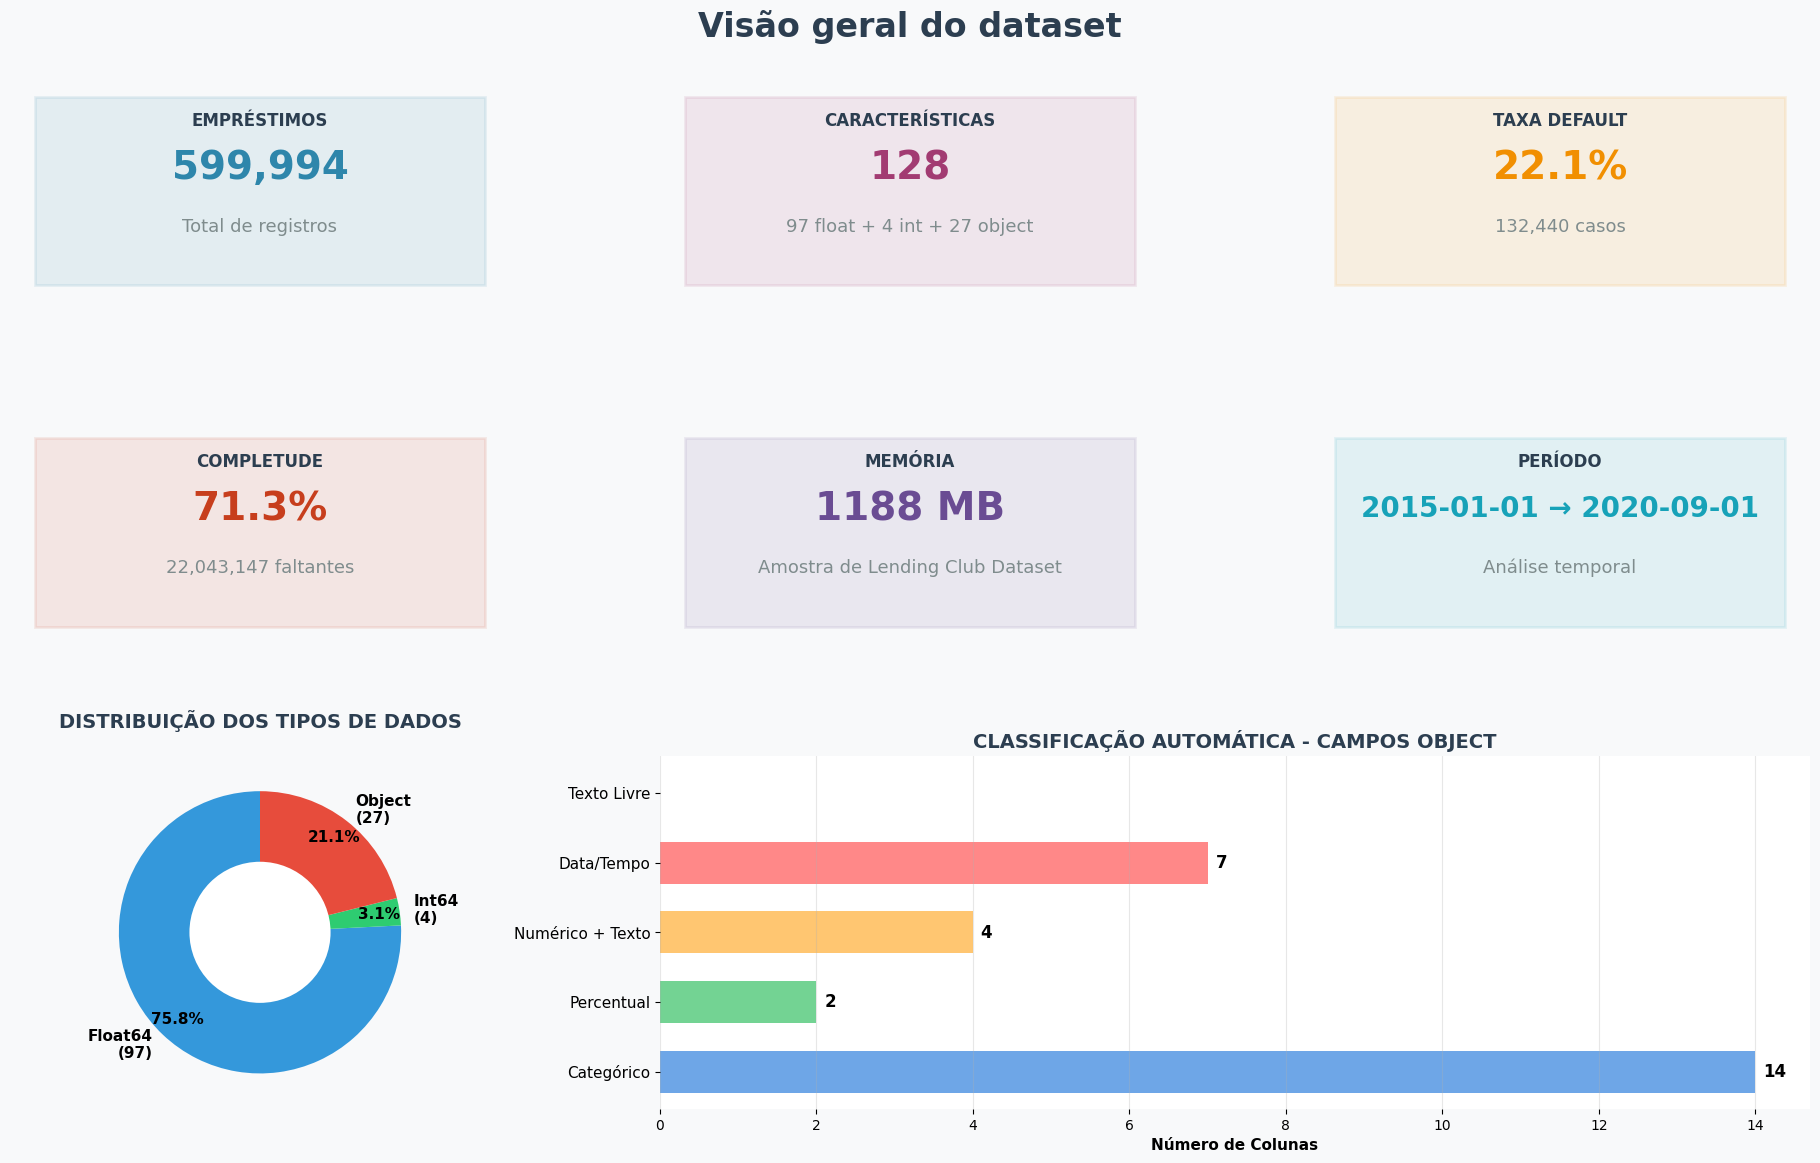

In [ ]:
# ==============================================================================
# 1. VISÃO GERAL DO DATASET
# ==============================================================================

print("\n" + "="*60)
print("1. VISÃO GERAL DO DATASET")
print("="*60)
basic_types = df.dtypes.value_counts()
float_types = basic_types.get(pd.api.types.pandas_dtype('float64'), 0)
int_types = basic_types.get(pd.api.types.pandas_dtype('int64'), 0)
object_types = basic_types.get(pd.api.types.pandas_dtype('object'), 0)

# Estatísticas principais
num_instances = len(df)
num_attributes = len(df.columns)
default_rate = (df['target_default'].sum() / len(df)) * 100
start_date = df['issue_d'].dropna().min()
end_date = df['issue_d'].dropna().max()
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = 100 - (missing_cells / total_cells * 100)
memory_usage_mb = df.memory_usage(deep=True).sum() / 1024**2

# --- DESIGN DASHBOARD MODERNO ---
plt.style.use('default')
fig = plt.figure(figsize=(20, 16), facecolor='#f8f9fa')

# Grid layout com duas linhas de cards - 4 linhas totais
gs = fig.add_gridspec(4, 3, height_ratios=[1, 1, 1.5, 1], width_ratios=[1, 1, 1],
                      hspace=0.4, wspace=0.3, top=0.94, bottom=0.08, left=0.05, right=0.95)

# Paleta de cores moderna - expandida para 6 cards
colors_kpi = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A4C93', '#17A2B8']
colors_chart = ['#4A90E2', '#50C878', '#FFB84D', '#FF6B6B', '#8E44AD']

# === SEÇÃO 1: PRIMEIRA LINHA DE KPIs ===
kpi_data_row1 = [
    {'title': 'EMPRÉSTIMOS', 'value': f'{num_instances:,}', 'subtitle': 'Total de registros', 'color': colors_kpi[0]},
    {'title': 'CARACTERÍSTICAS', 'value': f'{num_attributes}', 'subtitle': f'{float_types} float + {int_types} int + {object_types} object', 'color': colors_kpi[1]},
    {'title': 'TAXA DEFAULT', 'value': f'{default_rate:.1f}%', 'subtitle': f'{int(df["target_default"].sum()):,} casos', 'color': colors_kpi[2]}
]

for i, kpi in enumerate(kpi_data_row1):
    ax = fig.add_subplot(gs[0, i])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Card background
    rect = plt.Rectangle((0.05, 0.1), 0.9, 0.8, facecolor=kpi['color'], alpha=0.1,
                        edgecolor=kpi['color'], linewidth=2, transform=ax.transAxes)
    ax.add_patch(rect)

    # KPI value (grande)
    ax.text(0.5, 0.60, kpi['value'], ha='center', va='center', fontsize=28,
            fontweight='bold', color=kpi['color'], transform=ax.transAxes)

    # Title
    ax.text(0.5, 0.80, kpi['title'], ha='center', va='center', fontsize=12,
            fontweight='bold', color='#2c3e50', transform=ax.transAxes)

    # Subtitle
    ax.text(0.5, 0.35, kpi['subtitle'], ha='center', va='center', fontsize=13,
            color='#7f8c8d', transform=ax.transAxes)

kpi_data_row2 = [
    {'title': 'COMPLETUDE', 'value': f'{completeness:.1f}%', 'subtitle': f'{missing_cells:,} faltantes', 'color': colors_kpi[3]},
    {'title': 'MEMÓRIA', 'value': f'{memory_usage_mb:.0f} MB', 'subtitle': 'Amostra de Lending Club Dataset', 'color': colors_kpi[4]},
    {'title': 'PERÍODO', 'value': f'{start_date} → {end_date}', 'subtitle': 'Análise temporal', 'color': colors_kpi[5]}
]

for i, kpi in enumerate(kpi_data_row2):
    ax = fig.add_subplot(gs[1, i])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Card background
    rect = plt.Rectangle((0.05, 0.1), 0.9, 0.8, facecolor=kpi['color'], alpha=0.1,
                        edgecolor=kpi['color'], linewidth=2, transform=ax.transAxes)
    ax.add_patch(rect)

    # KPI value (grande) - ajustar fonte para período
    fontsize_value = 20 if kpi['title'] == 'PERÍODO' else 28
    ax.text(0.5, 0.60, kpi['value'], ha='center', va='center', fontsize=fontsize_value,
            fontweight='bold', color=kpi['color'], transform=ax.transAxes)

    # Title
    ax.text(0.5, 0.80, kpi['title'], ha='center', va='center', fontsize=12,
            fontweight='bold', color='#2c3e50', transform=ax.transAxes)

    # Subtitle
    ax.text(0.5, 0.35, kpi['subtitle'], ha='center', va='center', fontsize=13,
            color='#7f8c8d', transform=ax.transAxes)

# Gráfico 1: Distribuição de Tipos (Donut Chart)
ax1 = fig.add_subplot(gs[2, :1])
sizes = [float_types, int_types, object_types]
labels = [f'Float64\n({float_types})', f'Int64\n({int_types})', f'Object\n({object_types})']
colors_donut = ['#3498db', '#2ecc71', '#e74c3c']

wedges, texts, autotexts = ax1.pie(sizes, labels=labels, colors=colors_donut, autopct='%1.1f%%',
                                   startangle=90, pctdistance=0.85, textprops={'fontsize': 11, 'fontweight': 'bold'})

# Criar buraco no meio para donut
centre_circle = plt.Circle((0,0), 0.50, fc='white')
ax1.add_artist(centre_circle)
ax1.set_title('DISTRIBUIÇÃO DOS TIPOS DE DADOS', fontsize=14, fontweight='bold', pad=20, color='#2c3e50')

# Gráfico 2: Classificação object (bar chart horizontal)
ax2 = fig.add_subplot(gs[2, 1:])

# Classificação automática
def classify_object_column(col_name, col_data):
    sample_vals = col_data.dropna().astype(str).head(100)
    if sample_vals.empty:
        return 'Texto Livre'

    unique_ratio = col_data.nunique() / len(col_data.dropna())
    sample_val = sample_vals.iloc[0] if not sample_vals.empty else ""

    date_patterns = ['date', 'time', '_d', 'issue', 'earliest', 'last']
    month_names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    if (any(pattern in col_name.lower() for pattern in date_patterns) or
        any(month in sample_val.lower() for month in month_names)):
        return 'Data/Tempo'

    rate_columns = ['rate', 'util', 'pct', 'percent']
    if ('%' in sample_val or any(rate in col_name.lower() for rate in rate_columns)):
        return 'Percentual'

    if 'grade' in col_name.lower():
        return 'Categórico'

    has_digits = any(char.isdigit() for char in sample_val)
    has_letters = any(char.isalpha() for char in sample_val)
    numeric_text_patterns = ['term', 'length', 'zip', 'code']
    if ((has_digits and has_letters) or
        any(pattern in col_name.lower() for pattern in numeric_text_patterns)):
        return 'Numérico + Texto'

    categorical_patterns = ['status', 'type', 'plan', 'purpose', 'title', 'ownership', 'verification', 'flag']
    if (unique_ratio < 0.1 or col_data.nunique() < 50 or
        any(pattern in col_name.lower() for pattern in categorical_patterns)):
        return 'Categórico'

    return 'Texto Livre'

object_classification = {
    'Categórico': [], 'Percentual': [], 'Numérico + Texto': [],
    'Data/Tempo': [], 'Texto Livre': []
}

object_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in object_cols:
    classification = classify_object_column(col, df[col])
    object_classification[classification].append(col)

# Preparar dados para gráfico horizontal
categories = list(object_classification.keys())
counts = [len(object_classification[cat]) for cat in categories]
y_pos = range(len(categories))

bars = ax2.barh(y_pos, counts, color=colors_chart[:len(categories)], alpha=0.8, height=0.6)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(categories, fontsize=11)
ax2.set_xlabel('Número de Colunas', fontsize=11, fontweight='bold')
ax2.set_title('CLASSIFICAÇÃO AUTOMÁTICA - CAMPOS OBJECT', fontsize=14, fontweight='bold', color='#2c3e50')
ax2.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, (bar, count) in enumerate(zip(bars, counts)):
    if count > 0:
        ax2.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                str(count), va='center', fontweight='bold', fontsize=12)

# Remover spines
for spine in ax2.spines.values():
    spine.set_visible(False)

# Título principal do dashboard
fig.suptitle('Visão geral do dataset', fontsize=24, fontweight='bold',
             color='#2c3e50', y=0.98)

plt.show()


### Seleção das variáveis-chave e análise sistemática de associação

Para realizar a análise exploratória de dados, foi implementada uma **análise sistemática de associação** que **parte de um conjunto inicial baseado no conhecimento de domínio** e o **expande sistematicamente** usando evidência estatística. A abordagem integra métricas complementares para avaliar a força da associação entre variáveis explicativas e a variável target (adimplência/inadimplência).

**Importante**: A seleção de variáveis-chave nesta etapa **não representa o descarte definitivo** de outras variáveis para machine learning. Esta análise foca na **identificação e priorização** das variáveis mais relevantes para análise exploratória inicial, mas todas as variáveis de originação podem ser candidatas para modelagem posterior, onde técnicas automáticas de seleção (como regularização L1/L2, seleção por importância de features, etc.) podem revelar padrões adicionais.

**Metodologia de análise sistemática:**

**0. Conjunto inicial (conhecimento de domínio)**
   - **Variáveis do conjunto inicial**: Variáveis fundamentais de crédito baseadas na literatura e prática da indústria
   - **Foram escolhidas**: `loan_amnt`, `grade`, `sub_grade`, `int_rate`, `term`, `annual_inc`, `dti`, `fico_range_low`, `fico_range_high`, `home_ownership`, `verification_status`, `purpose`
   - **Objetivo**: Garantir que variáveis que possam dar boa interpretação aos dados não sejam omitidas por limitações estatísticas

**1. Classificação temporal das variáveis**
   - **Originação**: Disponíveis no momento da concessão (válidas para predição)
   - **Pós-originação**: Conhecidas apenas após a concessão (vazamento temporal)
   - **Administrativas**: Identificadores e metadados (não preditivas)

**2. Análise de associação para variáveis numéricas**
   - **Correlação de Pearson**: Mede associação linear (-1 a +1) - sensível a outliers
   - **Correlação de Spearman**: Captura relações monotônicas não-lineares - robusta a outliers
   - **Information Value (IV)**: Quantifica poder discriminatório
   - **Mutual Information (MI)**: Detecta dependências não-lineares complexas através da entropia
   - **Effect Size (Cohen's d)**: Magnitude prática da diferença entre grupos (padronizada)

**3. Análise de associação para variáveis categóricas**
   - **Chi-squared (χ²)**: Testa independência estatística entre categoria e target (p-value)
   - **Cramér's V**: Effect size padronizado para associações categóricas (0 a 1, análogo ao R²)
   - **Information Value categórico**: Adaptação do IV usando Weight of Evidence para variáveis discretas
   - **Mutual Information categórica**: Captura dependências não-lineares usando encoding categórico

**4. Score composto e expansão sistemática**
   - **Normalização**: Métricas padronizadas para escala 0-1 por divisão pelo máximo
   - **Ponderação**: Pesos baseados na robustez estatística (IV e MI recebem maior peso)
   - **Classificação automática**: FORTE (pelo menos uma métrica alta identificada), MODERADA (pelo menos uma métrica média identificada, se não for forte), FRACA
   - **Expansão das key_columns**: Adição de variáveis com associação FORTE/MODERADA ao conjunto inicial

Observe que a análise sistemática permite identificar não somente associações lineares, mas também outros tipos de associações, como monotônicas, não-lineares, de dependência etc.


In [4]:
# ==============================================================================
# 2. SELEÇÃO DAS VARIÁVEIS-CHAVE (KEY COLUMNS)
# ==============================================================================

print("\n" + "="*60)
print("2. SELEÇÃO DAS VARIÁVEIS-CHAVE E AMOSTRA DO DATASET")
print("="*60)


# 2.1 DEFINIR VARIÁVEIS DISPONÍVEIS NO MOMENTO DA ORIGINAÇÃO
# ==============================================================================

def classify_variables_by_availability():
    """
    Classifica variáveis por disponibilidade temporal:
    - ORIGINAÇÃO: Disponíveis no momento da concessão
    - PÓS_ORIGINAÇÃO: Só conhecidas após a concessão (vazamento temporal)
    - ADMINISTRATIVAS: IDs, metadados, não preditivas
    """

    # Variáveis claramente disponíveis na originação
    origination_vars = [
        # Características do empréstimo
        'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
        'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',

        # Características do tomador
        'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
        'purpose', 'title', 'zip_code', 'addr_state', 'dti',
        'earliest_cr_line', 'fico_range_low', 'fico_range_high',
        'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies',

        # Informações de solicitação conjunta (se aplicável)
        'annual_inc_joint', 'dti_joint', 'verification_status_joint',
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
        'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
        'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
        'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
        'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
        'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
        'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
        'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
        'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
        'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
        'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
        'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
        'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
        'total_il_high_credit_limit'
    ]

    # Variáveis conhecidas apenas após originação (vazamento temporal)
    post_origination_vars = [
        # Status e evoluções de pagamento
        'loan_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
        'next_pymnt_d', 'last_credit_pull_d',

        # Status de dificuldade/acordos
        'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
        'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date',
        'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
        'hardship_loan_status', 'orig_projected_additional_accrued_interest',
        'hardship_payoff_balance_amount', 'hardship_last_payment_amount',

        # Acordo de quitação
        'settlement_status', 'settlement_date', 'settlement_amount',
        'settlement_percentage', 'settlement_term', 'debt_settlement_flag',
        'debt_settlement_flag_date'
    ]

    # Variáveis administrativas/identificadores
    administrative_vars = [
        'id', 'member_id', 'url', 'desc', 'title'  # Removidas por LGPD também
    ]

    return origination_vars, post_origination_vars, administrative_vars

# Aplicar classificação
origination_vars, post_origination_vars, administrative_vars = classify_variables_by_availability()

# Filtrar apenas variáveis que existem no dataset e são de originação
available_origination_vars = [var for var in origination_vars if var in df.columns]
available_post_vars = [var for var in post_origination_vars if var in df.columns]

print(f"Variáveis disponíveis na originação: {len(available_origination_vars)}")
print(f"Variáveis pós-originação identificadas: {len(available_post_vars)}")

# Loop para encontrar e converter todas as colunas de percentual
for col in df.select_dtypes(include=['object']).columns:
    # Verifica se a coluna não está vazia e se o primeiro valor não nulo contém '%'
    if not df[col].dropna().empty and '%' in str(df[col].dropna().iloc[0]):
        print(f"Convertendo a coluna de percentual: '{col}'")
        df[col] = df[col].str.replace('%', '').astype(float)

# 2.2 ANÁLISE DE ASSOCIAÇÃO - VARIÁVEIS NUMÉRICAS
# ==============================================================================

print(f"\n2.2 ANÁLISE DE ASSOCIAÇÃO - VARIÁVEIS NUMÉRICAS")
print("="*60)

# Executar análise de associação apenas nas variáveis de originação
origination_numeric = [var for var in available_origination_vars
                      if var in df.select_dtypes(include=[np.number]).columns
                      and var != 'target_default']

print(f"Analisando {len(origination_numeric)} variáveis numéricas de originação")


def safe_correlation(x, y, method='pearson'):
    if len(x) < 50 or x.nunique() < 2 or y.nunique() < 2 or x.std() == 0 or y.std() == 0:
        return 0.0
    return x.corr(y, method=method)

def calculate_information_value(feature, target):
    """Calcula Information Value com validações"""
    if len(feature) < 100 or feature.nunique() < 2:
        return 0.0

    # Criar bins adaptativos
    n_bins = min(10, feature.nunique())
    if n_bins < 2:
        return 0.0

    # Usar quantiles para evitar problemas com distribuições
    if feature.nunique() > n_bins:
        bins = feature.quantile(np.linspace(0, 1, n_bins + 1)).unique()
        if len(bins) < 3:
            return 0.0
        feature_binned = pd.cut(feature, bins=bins, include_lowest=True, duplicates='drop')
    else:
        feature_binned = feature

    # Calcular tabela de contingência
    crosstab = pd.crosstab(feature_binned, target)
    if crosstab.shape[0] < 2 or crosstab.shape[1] < 2:
        return 0.0

    # Normalizar por colunas e calcular IV
    crosstab_norm = crosstab.div(crosstab.sum(axis=0), axis=1)

    # Evitar divisão por zero adicionando epsilon
    epsilon = 1e-10
    crosstab_norm = crosstab_norm + epsilon

    if 0 not in crosstab_norm.columns or 1 not in crosstab_norm.columns:
        return 0.0

    woe = np.log(crosstab_norm[1] / crosstab_norm[0])
    iv = ((crosstab_norm[1] - crosstab_norm[0]) * woe).sum()

    return iv if np.isfinite(iv) else 0.0

def calculate_mutual_information(feature, target):
    """Calcula Mutual Information usando entropia"""
    if len(feature) < 50 or feature.nunique() < 2:
        return 0.0

    # Discretizar variável contínua
    n_bins = min(10, int(np.sqrt(len(feature))))
    feature_discrete = pd.qcut(feature, q=n_bins, duplicates='drop')

    # Calcular entropias
    def entropy(labels):
        value_counts = pd.Series(labels).value_counts(normalize=True)
        return -np.sum(value_counts * np.log2(value_counts + 1e-10))

    h_target = entropy(target)
    h_feature = entropy(feature_discrete)

    # Entropia conjunta
    joint_counts = pd.crosstab(feature_discrete, target, normalize=True)
    h_joint = -np.sum(joint_counts.values * np.log2(joint_counts.values + 1e-10))

    mi = h_target + h_feature - h_joint
    return mi if np.isfinite(mi) and mi >= 0 else 0.0

def calculate_effect_size(feature, target):
    """Calcula effect size usando diferença de médias padronizada"""
    group_0 = feature[target == 0]
    group_1 = feature[target == 1]

    if len(group_0) < 10 or len(group_1) < 10:
        return 0.0

    mean_diff = group_1.mean() - group_0.mean()
    pooled_std = np.sqrt(((len(group_0) - 1) * group_0.var() +
                         (len(group_1) - 1) * group_1.var()) /
                        (len(group_0) + len(group_1) - 2))

    if pooled_std == 0:
        return 0.0

    cohen_d = mean_diff / pooled_std
    return abs(cohen_d) if np.isfinite(cohen_d) else 0.0

# Executar análise
results = []
for var in origination_numeric:
    valid_data = df[[var, 'target_default']].dropna()

    if len(valid_data) < 1000:
        continue

    feature = valid_data[var]
    target = valid_data['target_default']

    if feature.nunique() < 2 or feature.std() == 0:
        continue

    # Calcular métricas
    pearson = abs(safe_correlation(feature, target, 'pearson'))
    spearman = abs(safe_correlation(feature, target, 'spearman'))
    iv_score = calculate_information_value(feature, target)
    mi_score = calculate_mutual_information(feature, target)
    effect_size = calculate_effect_size(feature, target)

    results.append({
        'variavel': var,
        'pearson': pearson,
        'spearman': spearman,
        'information_value': iv_score,
        'mutual_info': mi_score,
        'effect_size': effect_size,
        'n_obs': len(valid_data)
    })

# Processar resultados e criar score composto
association_df = pd.DataFrame(results)

if len(association_df) > 0:
    # Normalizar métricas para criar score composto
    for metric in ['pearson', 'spearman', 'information_value', 'mutual_info', 'effect_size']:
        max_val = association_df[metric].max()
        if max_val > 0:
            association_df[f'{metric}_norm'] = association_df[metric] / max_val
        else:
            association_df[f'{metric}_norm'] = 0

    # Score composto com pesos baseados na robustez das métricas
    weights = {
        'pearson_norm': 0.15,
        'spearman_norm': 0.20,
        'information_value_norm': 0.25,
        'mutual_info_norm': 0.25,
        'effect_size_norm': 0.15
    }

    association_df['score_composto'] = sum(
        association_df[col] * weight for col, weight in weights.items()
    )

    # Ordenar por score composto
    association_df = association_df.sort_values('score_composto', ascending=False)

    # Classificar importância
    def classify_importance(row):
        strong = (row['information_value'] >= 0.30 or
                 row['mutual_info'] >= 0.1 or
                 row['effect_size'] >= 0.30 or
                 row['score_composto'] >= 0.5)

        moderate = (row['information_value'] >= 0.1 or
                   row['spearman'] >= 0.1 or
                   row['effect_size'] >= 0.20 or
                   row['mutual_info'] >= 0.05 or
                   row['score_composto'] >= 0.20)

        if strong:
            return 'FORTE'
        elif moderate:
            return 'MODERADA'
        else:
            return 'FRACA'

    association_df['importancia'] = association_df.apply(classify_importance, axis=1)

    # Mostrar resultados da análise numérica
    print(f"\nRESULTADOS DA ANÁLISE NUMÉRICA:")
    print("-" * 80)
    print(f"{'Variável':<20} {'Score':<8} {'Pearson':<8} {'Spearman':<8} {'IV':<8} {'MI':<8} {'Effect Size':<12} {'Importância'}")
    print("-" * 80)
    for _, row in association_df.iterrows():
        print(f"{row['variavel'][:19]:<20} {row['score_composto']:<8.3f} "
              f"{row['pearson']:<8.3f} {row['spearman']:<8.3f} "
              f"{row['information_value']:<8.3f} {row['mutual_info']:<8.3f} "
              f"{row['effect_size']:<12.3f} {row['importancia']}")
    # Identificar variáveis numéricas significativas
    significant_numeric = association_df[
        association_df['importancia'].isin(['FORTE', 'MODERADA'])
    ]['variavel'].tolist()
    print(f"\nVARIÁVEIS NUMÉRICAS SIGNIFICATIVAS ({len(significant_numeric)}):")
    for var in significant_numeric:
        print(f"- {var}")
else:
    print("Nenhuma variável numérica significativa encontrada.")



2. SELEÇÃO DAS VARIÁVEIS-CHAVE E AMOSTRA DO DATASET
Variáveis disponíveis na originação: 85
Variáveis pós-originação identificadas: 17
Convertendo a coluna de percentual: 'int_rate'
Convertendo a coluna de percentual: 'revol_util'

2.2 ANÁLISE DE ASSOCIAÇÃO - VARIÁVEIS NUMÉRICAS
Analisando 71 variáveis numéricas de originação

RESULTADOS DA ANÁLISE NUMÉRICA:
--------------------------------------------------------------------------------
Variável             Score    Pearson  Spearman IV       MI       Effect Size  Importância
--------------------------------------------------------------------------------
int_rate             1.000    0.271    0.269    0.470    0.055    0.678        FORTE
fico_range_low       0.318    0.120    0.117    0.093    0.011    0.291        MODERADA
fico_range_high      0.318    0.120    0.117    0.093    0.011    0.291        MODERADA
dti_joint            0.313    0.122    0.124    0.077    0.011    0.271        MODERADA
funded_amnt          0.212    0.082 

In [5]:
# ==============================================================================
# 2.3 ANÁLISE DE ASSOCIAÇÃO - VARIÁVEIS CATEGÓRICAS
# ==============================================================================

print(f"\n2.3 ANÁLISE DE ASSOCIAÇÃO - VARIÁVEIS CATEGÓRICAS")
print("="*60)

# Identificar variáveis categóricas de originação
origination_categorical = [var for var in available_origination_vars
                          if var in df.select_dtypes(include=['object']).columns]

print(f"Analisando {len(origination_categorical)} variáveis categóricas de originação")

# Funções para análise de variáveis categóricas
def calculate_categorical_iv(feature, target):
    """Calcula Information Value para variáveis categóricas"""
    try:
        crosstab = pd.crosstab(feature, target)
        if crosstab.shape[0] < 2 or crosstab.shape[1] < 2:
            return 0.0

        # Normalizar por colunas
        crosstab_norm = crosstab.div(crosstab.sum(axis=0), axis=1)

        # Verificar se ambas as classes do target existem
        if 0 not in crosstab_norm.columns or 1 not in crosstab_norm.columns:
            return 0.0

        # Evitar divisão por zero
        epsilon = 1e-10
        crosstab_norm = crosstab_norm + epsilon

        # Weight of Evidence
        woe = np.log(crosstab_norm[1] / crosstab_norm[0])

        # Information Value
        iv = ((crosstab_norm[1] - crosstab_norm[0]) * woe).sum()

        return iv if np.isfinite(iv) else 0.0
    except:
        return 0.0

def calculate_cramers_v(feature, target):
    """Calcula Cramér's V (effect size para associação categórica)"""
    try:
        crosstab = pd.crosstab(feature, target)
        chi2 = stats.chi2_contingency(crosstab)[0]
        n = crosstab.sum().sum()
        min_dim = min(crosstab.shape) - 1
        if min_dim == 0:
            return 0.0
        cramers_v = np.sqrt(chi2 / (n * min_dim))
        return cramers_v if np.isfinite(cramers_v) else 0.0
    except:
        return 0.0

def calculate_categorical_mutual_info(feature, target):
    """Calcula Mutual Information para variáveis categóricas"""
    try:
        # Converter categorias para códigos numéricos
        from sklearn.feature_selection import mutual_info_classif
        from sklearn.preprocessing import LabelEncoder

        le = LabelEncoder()
        feature_encoded = le.fit_transform(feature.astype(str))

        mi_score = mutual_info_classif(feature_encoded.reshape(-1, 1), target,
                                      discrete_features=True, random_state=42)[0]
        return mi_score if np.isfinite(mi_score) else 0.0
    except:
        return 0.0

def calculate_default_rate_range(feature, target):
    """Calcula a amplitude da taxa de default entre categorias"""
    try:
        rates = feature.groupby(feature).apply(lambda x: target[x.index].mean())
        if len(rates) < 2:
            return 0.0
        return rates.max() - rates.min()
    except:
        return 0.0

# Executar análise para variáveis categóricas
categorical_results = []

for var in origination_categorical:
    # Filtrar apenas categorias com volume mínimo
    valid_data = df[[var, 'target_default']].dropna()

    if len(valid_data) < 1000:
        continue

    # Verificar se tem pelo menos 2 categorias
    if valid_data[var].nunique() < 2:
        continue

    feature = valid_data[var]
    target = valid_data['target_default']

    # Calcular métricas específicas para categóricas
    try:
        # Chi-squared test
        crosstab = pd.crosstab(feature, target)
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)

        # Métricas de associação
        cramers_v = calculate_cramers_v(feature, target)
        iv_score = calculate_categorical_iv(feature, target)
        mi_score = calculate_categorical_mutual_info(feature, target)
        default_range = calculate_default_rate_range(feature, target)

        categorical_results.append({
            'variavel': var,
            'chi2_statistic': chi2,
            'p_value': p_value,
            'cramers_v': cramers_v,
            'information_value': iv_score,
            'mutual_info': mi_score,
            'default_rate_range': default_range,
            'n_categories': feature.nunique(),
            'n_obs': len(valid_data),
            'significativo': 'Sim' if p_value < 0.05 else 'Não'
        })
    except Exception as e:
        print(f"Erro ao processar {var}: {e}")
        continue

# Processar resultados categóricos
categorical_df = pd.DataFrame(categorical_results)

if len(categorical_df) > 0:
    # Normalizar métricas para criar score composto
    metrics_to_normalize = ['cramers_v', 'information_value', 'mutual_info', 'default_rate_range']

    for metric in metrics_to_normalize:
        max_val = categorical_df[metric].max()
        if max_val > 0:
            categorical_df[f'{metric}_norm'] = categorical_df[metric] / max_val
        else:
            categorical_df[f'{metric}_norm'] = 0

    # Score composto para categóricas
    cat_weights = {
        'cramers_v_norm': 0.25,
        'information_value_norm': 0.30,
        'mutual_info_norm': 0.25,
        'default_rate_range_norm': 0.20
    }

    categorical_df['score_composto'] = sum(
        categorical_df[col] * weight for col, weight in cat_weights.items()
    )

    # Ordenar por score composto
    categorical_df = categorical_df.sort_values('score_composto', ascending=False)

    # Classificar importância para categóricas
    def classify_categorical_importance(row):
        strong = (row['cramers_v'] >= 0.3 or
                 row['information_value'] >= 0.3 or
                 row['default_rate_range'] >= 0.2 or
                 row['score_composto'] >= 0.5)

        moderate = (row['cramers_v'] >= 0.1 or
                   row['information_value'] >= 0.1 or
                   row['default_rate_range'] >= 0.1 or
                   row['mutual_info'] >= 0.05 or
                   row['score_composto'] >= 0.20)

        if strong:
            return 'FORTE'
        elif moderate:
            return 'MODERADA'
        else:
            return 'FRACA'

    categorical_df['importancia'] = categorical_df.apply(classify_categorical_importance, axis=1)

    # Mostrar resultados da análise categórica
    print(f"\nRESULTADOS DA ANÁLISE CATEGÓRICA:")
    print("-" * 80)
    print(f"{'Variável':<20} {'Score':<8} {'Cramér V':<9} {'IV':<8} {'MI':<8} {'Range':<8} {'Import.'}")
    print("-" * 80)

    for _, row in categorical_df.iterrows():
        print(f"{row['variavel']:<30} {row['score_composto']:<8.3f} "
              f"{row['cramers_v']:<9.3f} {row['information_value']:<8.3f} "
              f"{row['mutual_info']:<8.3f} {row['default_rate_range']:<8.3f} "
              f"{row['importancia']}")

    # Identificar variáveis categóricas significativas
    significant_categorical = categorical_df[
        categorical_df['importancia'].isin(['FORTE', 'MODERADA'])
    ]['variavel'].tolist()

    print(f"\nVARIÁVEIS CATEGÓRICAS SIGNIFICATIVAS ({len(significant_categorical)}):")
    print("-" * 50)
    for var in significant_categorical:
        row = categorical_df[categorical_df['variavel'] == var].iloc[0]
        print(f"- {var:<25} Score: {row['score_composto']:.3f} ({row['importancia']})")

else:
    print("Nenhuma variável categórica atendeu aos critérios mínimos para análise")

# 2.4 VARIÁVEIS-CHAVE SELECIONADAS
# ==============================================================================

# 2.4 VARIÁVEIS-CHAVE SELECIONADAS
print("\n2.4 VARIÁVEIS-CHAVE SELECIONADAS")

# conjunto inicial
key_columns = [
    'loan_amnt', 'grade', 'sub_grade', 'int_rate', 'term',
    'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
    'home_ownership', 'verification_status', 'purpose', 'target_default'
]

# construir extensão sem duplicatas, preservando ordem
extended = list(dict.fromkeys(key_columns + significant_numeric + significant_categorical))

# filtrar somente colunas existentes
extended_key_columns = [c for c in extended if c in df.columns]

print(f"Quantidade inicial: {len(key_columns)}")
print(f"Quantidade após extensão (únicos): {len(extended_key_columns)}")
print("Variáveis finais:")
for c in extended_key_columns:
    print(f"- {c}")
# ==============================================================================


# 2.5 AMOSTRA DO DATASET EXPANDIDO
# ==============================================================================

print(f"\n2.5 AMOSTRA DO DATASET COM VARIÁVEIS EXPANDIDAS")
print("="*60)

display(df[extended_key_columns].head(10))


2.3 ANÁLISE DE ASSOCIAÇÃO - VARIÁVEIS CATEGÓRICAS
Analisando 14 variáveis categóricas de originação

RESULTADOS DA ANÁLISE CATEGÓRICA:
--------------------------------------------------------------------------------
Variável             Score    Cramér V  IV       MI       Range    Import.
--------------------------------------------------------------------------------
sub_grade                      0.906    0.268     0.453    0.037    0.528    FORTE
grade                          0.844    0.260     0.418    0.034    0.451    FORTE
term                           0.421    0.181     0.172    0.015    0.174    MODERADA
zip_code                       0.320    0.078     0.039    0.003    1.000    FORTE
earliest_cr_line               0.313    0.076     0.035    0.003    1.000    FORTE
issue_d                        0.170    0.086     0.042    0.004    0.190    MODERADA
verification_status_joint      0.165    0.095     0.044    0.004    0.087    FRACA
home_ownership                 0.164    

,loan_amnt,grade,sub_grade,int_rate,term,annual_inc,dti,fico_range_low,fico_range_high,home_ownership,verification_status,purpose,target_default,dti_joint,funded_amnt,funded_amnt_inv,acc_open_past_24mths,mort_acc,zip_code,earliest_cr_line,issue_d,addr_state
0,10000.0000,D,D2,17.2700,36 months,150000.0000,30.7800,660.0000,664.0000,MORTGAGE,Source Verified,medical,0,NaN,10000.0000,10000.0000,6.0000,4.0000,328xx,Sep-1998,2016-05-01,FL
1,28000.0000,B,B2,9.4900,60 months,114500.0000,15.2600,705.0000,709.0000,MORTGAGE,Verified,debt_consolidation,0,NaN,28000.0000,28000.0000,3.0000,3.0000,220xx,Oct-1982,2016-08-01,VA
2,35000.0000,D,D1,16.2900,60 months,122000.0000,14.6300,710.0000,714.0000,MORTGAGE,Source Verified,debt_consolidation,0,NaN,35000.0000,35000.0000,2.0000,2.0000,300xx,Aug-2005,2016-05-01,GA
3,2750.0000,B,B1,8.2400,36 months,55000.0000,24.4600,700.0000,704.0000,RENT,Not Verified,major_purchase,0,NaN,2750.0000,2750.0000,1.0000,0.0000,294xx,Nov-1993,2016-12-01,SC
4,10000.0000,B,B2,10.4900,36 months,115000.0000,7.4200,670.0000,674.0000,RENT,Not Verified,debt_consolidation,0,NaN,10000.0000,10000.0000,6.0000,1.0000,750xx,Oct-2004,2016-12-01,TX
5,7125.0000,C,C5,15.3100,36 months,59000.0000,3.0500,675.0000,679.0000,RENT,Source Verified,credit_card,0,NaN,7125.0000,7125.0000,7.0000,0.0000,891xx,Nov-2004,2016-03-01,NV
6,5000.0000,A,A1,5.3200,36 months,78000.0000,26.8600,705.0000,709.0000,MORTGAGE,Not Verified,home_improvement,0,NaN,5000.0000,5000.0000,5.0000,2.0000,150xx,Sep-1996,2016-05-01,PA
7,16000.0000,B,B5,11.4900,36 months,80000.0000,15.5700,675.0000,679.0000,OWN,Source Verified,credit_card,0,NaN,16000.0000,16000.0000,10.0000,0.0000,907xx,Oct-1991,2016-07-01,CA
8,12000.0000,B,B2,9.4900,36 months,55000.0000,11.9800,660.0000,664.0000,RENT,Verified,debt_consolidation,0,NaN,12000.0000,12000.0000,2.0000,0.0000,028xx,Aug-2006,2016-08-01,RI
9,7500.0000,B,B3,10.4900,36 months,58000.0000,5.6500,675.0000,679.0000,RENT,Not Verified,other,0,NaN,7500.0000,7500.0000,2.0000,0.0000,890xx,Apr-1998,2016-08-01,NV


### Análise de valores faltantes e inconsistências

A análise de integridade dos dados, focada nas `extended_key_columns`, revela um dataset de alta qualidade, mas com a necessidade de tratar valores faltantes em três colunas específicas. A execução do código confirma os seguintes pontos:

- __Valores faltantes em colunas-chave:__

  - `dti_joint`: __94,83%__ dos valores são nulos (568.997 registros).
  - `dti`: __0,08%__ dos valores são nulos (468 registros).

- __Análise de qualidade dos dados:__

  - __Redundância:__ As colunas `loan_amnt` e `funded_amnt` são __100% idênticas__, confirmando que o valor solicitado foi sempre o valor financiado nesta amostra.
  - __Consistência de negócio:__ Não foram encontradas inconsistências lógicas. Todos os valores de `loan_amnt` estão dentro do range esperado (US\$ 1.000 a US\$ 40.000).
  - __Consistência FICO:__ Os scores FICO são consistentes (`fico_range_low` nunca é maior que `fico_range_high`) e todos os empréstimos atendem à regra de negócio de ter um FICO score igual ou superior a 600.
  - __Valores válidos:__ Não há valores negativos em campos financeiros como `annual_inc` ou `dti`.
  - __Estados de residência:__ As UFs estão consistentes com os 50 estados dos EUA, sem valores inválidos. Note que DC é um território federal, mas pode ser tratado como um estado para fins de análise. O único estado ausente é Iowa, que não possui registros nesta amostra. Foi verificado que não é uma questão de inconsistência ou de falta de demanda, mas uma questão regulatória, pois a Lending Club não conseguiu autorização para operar em tal estado.
  - __ZIP Codes:__ Os códigos postais estão no formato padrão de 5 dígitos, mas ocultando os últimos 2 dígitos com XX para preservar a privacidade. Esse fato reduz a quantidade de códigos únicos, mas ainda assim, há 911 códigos postais distintos. Trata-se, portanto, de uma variável de alta cardinalidade.

__Sugestões para pré-processamento:__

1. __`dti_joint`__: A ausência de 94,83% dos dados é estrutural, refletindo empréstimos individuais. A sugestão principal é __remover a coluna__. Como alternativa para reter a informação de empréstimo conjunto, pode-se criar uma feature binária para indicar se o empréstimo é individual ou conjunto.

2. __`dti`__: Com apenas 0,08% de valores faltantes, a __imputação pela mediana__ é uma estratégia sugerida. Dada a distribuição assimétrica dessa variável, conforme veremos a seguir, a mediana é mais robusta a outliers e preserva a estrutura dos dados.

3. __``zip_code``__: Como já existe feature para o estado, é necessário verificar se a informação adicional do código postal é realmente necessária. Caso necessário, a alta cardinalidade deve ser tratada com técnicas de redução, como:
   - __Agrupamento por região geográfica__: Agrupar os códigos postais em regiões maiores (regiões do censo) para reduzir a cardinalidade.
   - __One-Hot Encoding com limite de frequência__: Aplicar one-hot encoding apenas para os códigos postais mais frequentes, transformando os menos comuns em uma categoria "Outros".
    


In [6]:
# ==============================================================================
# 3. ANÁLISE DE VALORES FALTANTES E INCONSISTÊNCIAS
# ==============================================================================

print("\n" + "="*60)
print("3. ANÁLISE DE VALORES FALTANTES E INCONSISTÊNCIAS")
print("="*60)

# Análise de valores faltantes
missing_analysis = pd.DataFrame({
    'Coluna': df.columns,
    'Valores_Faltantes': df.isnull().sum(),
    'Percentual': (df.isnull().sum() / len(df) * 100).round(2),
    'Tipo': df.dtypes
}).sort_values('Valores_Faltantes', ascending=False)

# Mostrar apenas colunas com valores faltantes
missing_cols = missing_analysis[missing_analysis['Valores_Faltantes'] > 0]

# Algumas das keycolumns possuem valores faltantes?
# Verificar colunas-chave com valores faltantes e sua proporção
km = missing_analysis.loc[
    missing_analysis['Coluna'].isin(extended_key_columns) & (missing_analysis['Valores_Faltantes'] > 0),
    ['Coluna', 'Valores_Faltantes', 'Percentual']
]
if not km.empty:
    print("Colunas-chave com valores faltantes:")
    for _, r in km.iterrows():
        print(f"- {r.Coluna}: {r.Valores_Faltantes} ({r.Percentual}%)")
else:
    print("Nenhuma coluna-chave possui valores faltantes.")

# Análise de Qualidade dos Dados e Identificação de Inconsistências

print("ANÁLISE DE QUALIDADE DOS DADOS")
print("=" * 50)

quality_issues = []

# Verificar se funded_amnt <= loan_amnt
if 'funded_amnt' in df.columns and 'loan_amnt' in df.columns:
    inconsistent_funding = (df['funded_amnt'] > df['loan_amnt']).sum()
    print(f"\nRelação entre loan_amnt e funded_amnt:")
    print(f"- Casos onde funded_amnt > loan_amnt: {inconsistent_funding}")

    # Verificação crucial: são sempre iguais?
    total_count = len(df)
    equal_count = (df['loan_amnt'] == df['funded_amnt']).sum()
    always_equal = (df['loan_amnt'] == df['funded_amnt']).all()

    print(f"- Total de registros: {total_count:,}")
    print(f"- Registros onde loan_amnt = funded_amnt: {equal_count:,}")
    print(f"- São sempre iguais? {always_equal}")

    # Verifique se há algum fora do range entre $1000 e $40,000
    out_of_range = ((df['loan_amnt'] < 1000) | (df['loan_amnt'] > 40000)).sum()
    print(f"- Casos fora do range $1,000 a $40,000: {out_of_range}")

    if inconsistent_funding > 0:
        quality_issues.append(f"Funded amount inconsistente em {inconsistent_funding} casos")
    if out_of_range > 0:
        quality_issues.append(f"Valores de loan_amnt fora do range em {out_of_range} casos")

# Verificar scores FICO inconsistentes
if 'fico_range_low' in df.columns and 'fico_range_high' in df.columns:
    fico_inconsistent = (df['fico_range_low'] > df['fico_range_high']).sum()
    print(f"\nConsistência dos scores FICO:")
    print(f"- Casos onde fico_range_low > fico_range_high: {fico_inconsistent}")

    if fico_inconsistent > 0:
        quality_issues.append(f"FICO ranges inconsistentes em {fico_inconsistent} casos")

    # Verifique se há algum score FICO abaixo de 600 (regra de negócio)
    fico_below_600 = (df['fico_range_low'] < 600).sum()
    print(f"- Casos onde fico_range_low < 600: {fico_below_600}")

    if fico_below_600 > 0:
        quality_issues.append(f"Scores FICO abaixo de 600 em {fico_below_600} casos")

# Verificar valores negativos em campos que deveriam ser positivos
negative_income = (df['annual_inc'] < 0).sum() if 'annual_inc' in df.columns else 0
negative_dti = (df['dti'] < 0).sum() if 'dti' in df.columns else 0

print(f"\nValores negativos em campos financeiros:")
print(f"- Renda anual negativa: {negative_income}")
print(f"- DTI negativo: {negative_dti}")

if negative_income > 0:
    quality_issues.append(f"Renda anual negativa em {negative_income} casos")
if negative_dti > 0:
    quality_issues.append(f"DTI negativo em {negative_dti} casos")

#Análise de consistência entre `grade` e `sub_grade`__:
# Se cada `sub_grade` (ex: 'A1', 'B3') corresponde corretamente à sua `grade` ('A', 'B').
# Por exemplo, não deveria existir um `sub_grade` 'C2' associado a uma `grade` 'A'.
grade_consistency = df.apply(lambda row: row['sub_grade'].startswith(row['grade']), axis=1).all()
print(f"\nConsistência entre grade e sub_grade: {'OK' if grade_consistency else 'Inconsistente'}")

if not grade_consistency:
    inconsistent_sub_grades = df[~df.apply(lambda row: row['sub_grade'].startswith(row['grade']), axis=1)]
    print(f"- Sub-grades inconsistentes encontradas:")
    for _, row in inconsistent_sub_grades.iterrows():
        print(f"  - {row['sub_grade']} (grade: {row['grade']})")
    quality_issues.append("Inconsistências entre grade e sub_grade encontradas")

# Análise de cardinalidade de variáveis categóricas de localização (addr_state e zip_code)
unique_states = df['addr_state'].unique()
# Checa se são siglas de estados válidas
valid_states = set([
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
    'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
])

if not set(unique_states).issubset(valid_states):
    print(f"\nInconsistências encontradas em addr_state:")
    invalid_states = set(unique_states) - valid_states
    print(f"- Estados inválidos encontrados: {', '.join(invalid_states)}")
    quality_issues.append(f"Estados inválidos em addr_state: {', '.join(invalid_states)}")

# Algum estado não utilizado?
unused_states = valid_states - set(unique_states)
if unused_states:
    print(f"- Estados não utilizados: {', '.join(unused_states)}")
    quality_issues.append(f"Estados não utilizados: {', '.join(unused_states)}")

# Análise de zip_code
qt_zip_codes = df['zip_code'].unique().shape[0]
print(f"\n- Quantidade de códigos postais únicos (zip_code): {qt_zip_codes}")

# Verificar se zip_code tem o formato correto (5 dígitos)
# Verificar formato de zip_code (3 dígitos + 'xx')
inv = df.loc[~df['zip_code'].str.match(r'^\d{3}xx$'), 'zip_code'].unique()
if inv.size:
    print("\n- Códigos postais inválidos encontrados:")
    for z in inv:
        print(f"- {z}")
    quality_issues.append(f"- Códigos postais inválidos: {', '.join(inv)}")
else:
    print("- Todos os códigos postais estão no formato correto (3 dígitos + 'xx')")




3. ANÁLISE DE VALORES FALTANTES E INCONSISTÊNCIAS
Colunas-chave com valores faltantes:
- dti_joint: 568997 (94.83%)
- dti: 468 (0.08%)
ANÁLISE DE QUALIDADE DOS DADOS

Relação entre loan_amnt e funded_amnt:
- Casos onde funded_amnt > loan_amnt: 0
- Total de registros: 599,994
- Registros onde loan_amnt = funded_amnt: 599,994
- São sempre iguais? True
- Casos fora do range $1,000 a $40,000: 0

Consistência dos scores FICO:
- Casos onde fico_range_low > fico_range_high: 0
- Casos onde fico_range_low < 600: 0

Valores negativos em campos financeiros:
- Renda anual negativa: 0
- DTI negativo: 0

Consistência entre grade e sub_grade: OK

Inconsistências encontradas em addr_state:
- Estados inválidos encontrados: DC
- Estados não utilizados: IA

- Quantidade de códigos postais únicos (zip_code): 911
- Todos os códigos postais estão no formato correto (3 dígitos + 'xx')


### Resumo estatístico - variáveis numéricas

A análise das distribuições das variáveis revela assimetrias e variabilidades que impactam a modelagem. Para melhor visualização, foram realizadas remoções de outliers nos histogramas para facilitar a interpretação dos gráficos.

O valor do empréstimo (`loan_amnt`) e a taxa de juros (`int_rate`) apresentam distribuições assimétricas à direita, com uma concentração em valores mais baixos. Sua variabilidade sugere que a aplicação de normalização ou padronização será benéfica para a modelagem. Pelo gráfico de violino é possível observar que a `loan_amnt` possui concentrações em torno de 10k, 15k, 20k etc, provavelmente, por algum viés humano ou opções predefinidas no sistema na determinação dos valores de empréstimo.

A renda anual (`annual_inc`) é fortemente assimétrica à direita, concentrando a maioria dos dados em valores baixos, mas com valores extremos que geram altíssima variabilidade (curtose elevada) e a presença de outliers. Para esta variável, é crucial aplicar uma transformação (logarítmica ou Box-Cox) ou realizar um tratamento de outliers. Por outro lado, a variável `dti` (relação dívida/renda), após a remoção de outliers para visualização, mostra uma distribuição aproximadamente simétrica.

As faixas de score de crédito (`fico_range_low` e `fico_range_high`) também são assimétricas à direita, porém com baixa variabilidade, indicando que os dados estão muito concentrados em uma faixa específica de valores. No gráfico de violino, também é possível observar que as notas mais altas vão ficando mais raras para essas variáveis de range de FICO.

As variáveis de comportamento de crédito, `acc_open_past_24mths` e `mort_acc`, também exibem forte assimetria à direita, o que é esperado, já que a maioria dos tomadores possui poucas contas recentes ou hipotecas. A variável `dti_joint` se mostra aproximadamente simétrica, mas sua análise é limitada pelos 94,8% de dados ausentes.

Por fim, o prazo do empréstimo (`term`), como variável numérica discreta (36 e 60), demonstra concentração nesses valores, pois são os únicos prazos oferecidos pela plataforma. Essa variável deve ser melhor tratada como categórica, o que deve ser feito mais adiante.



4. RESUMO ESTATÍSTICO - VARIÁVEIS NUMÉRICAS

Principais variáveis numéricas:
                loan_amnt    int_rate        term     annual_inc         dti  fico_range_low  fico_range_high   dti_joint  funded_amnt_inv  acc_open_past_24mths    mort_acc
count         599994.0000 599994.0000 599994.0000    599994.0000 599526.0000     599994.0000      599994.0000  30997.0000      599994.0000           599994.0000 599994.0000
mean           14720.4500     13.0000     41.9000     78952.4900     19.0700        698.2100         702.2100     18.9600       14715.2600                4.7900      1.5300
std             9206.0500      4.9700     10.3300    180783.0700     15.0300         33.3000          33.3000      7.8500        9203.8700                3.3100      1.8600
min             1000.0000      5.3100     36.0000         0.0000      0.0000        660.0000         664.0000      0.0000         725.0000                0.0000      0.0000
25%             7700.0000      9.1700     36.0000     468

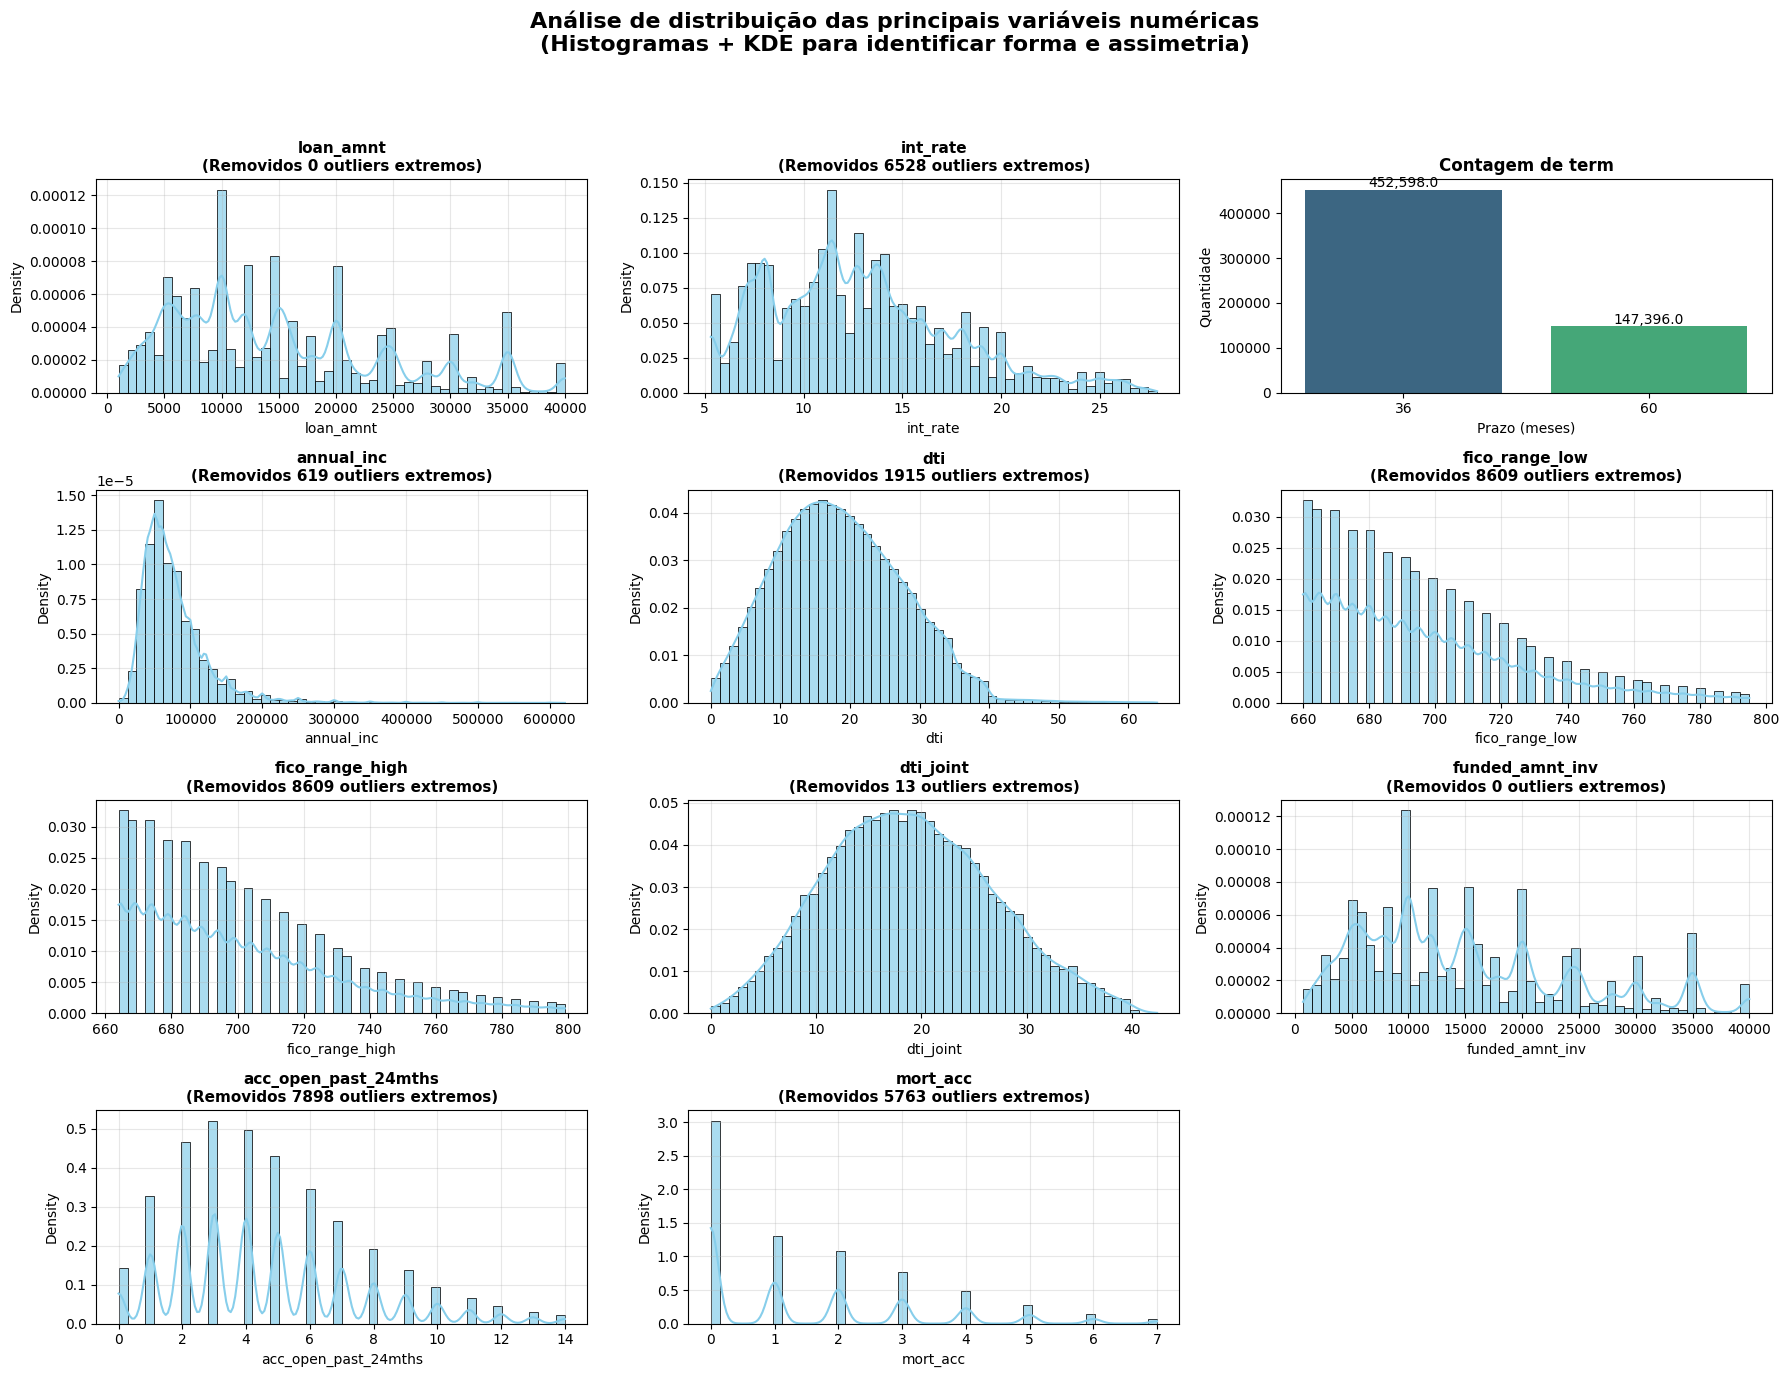

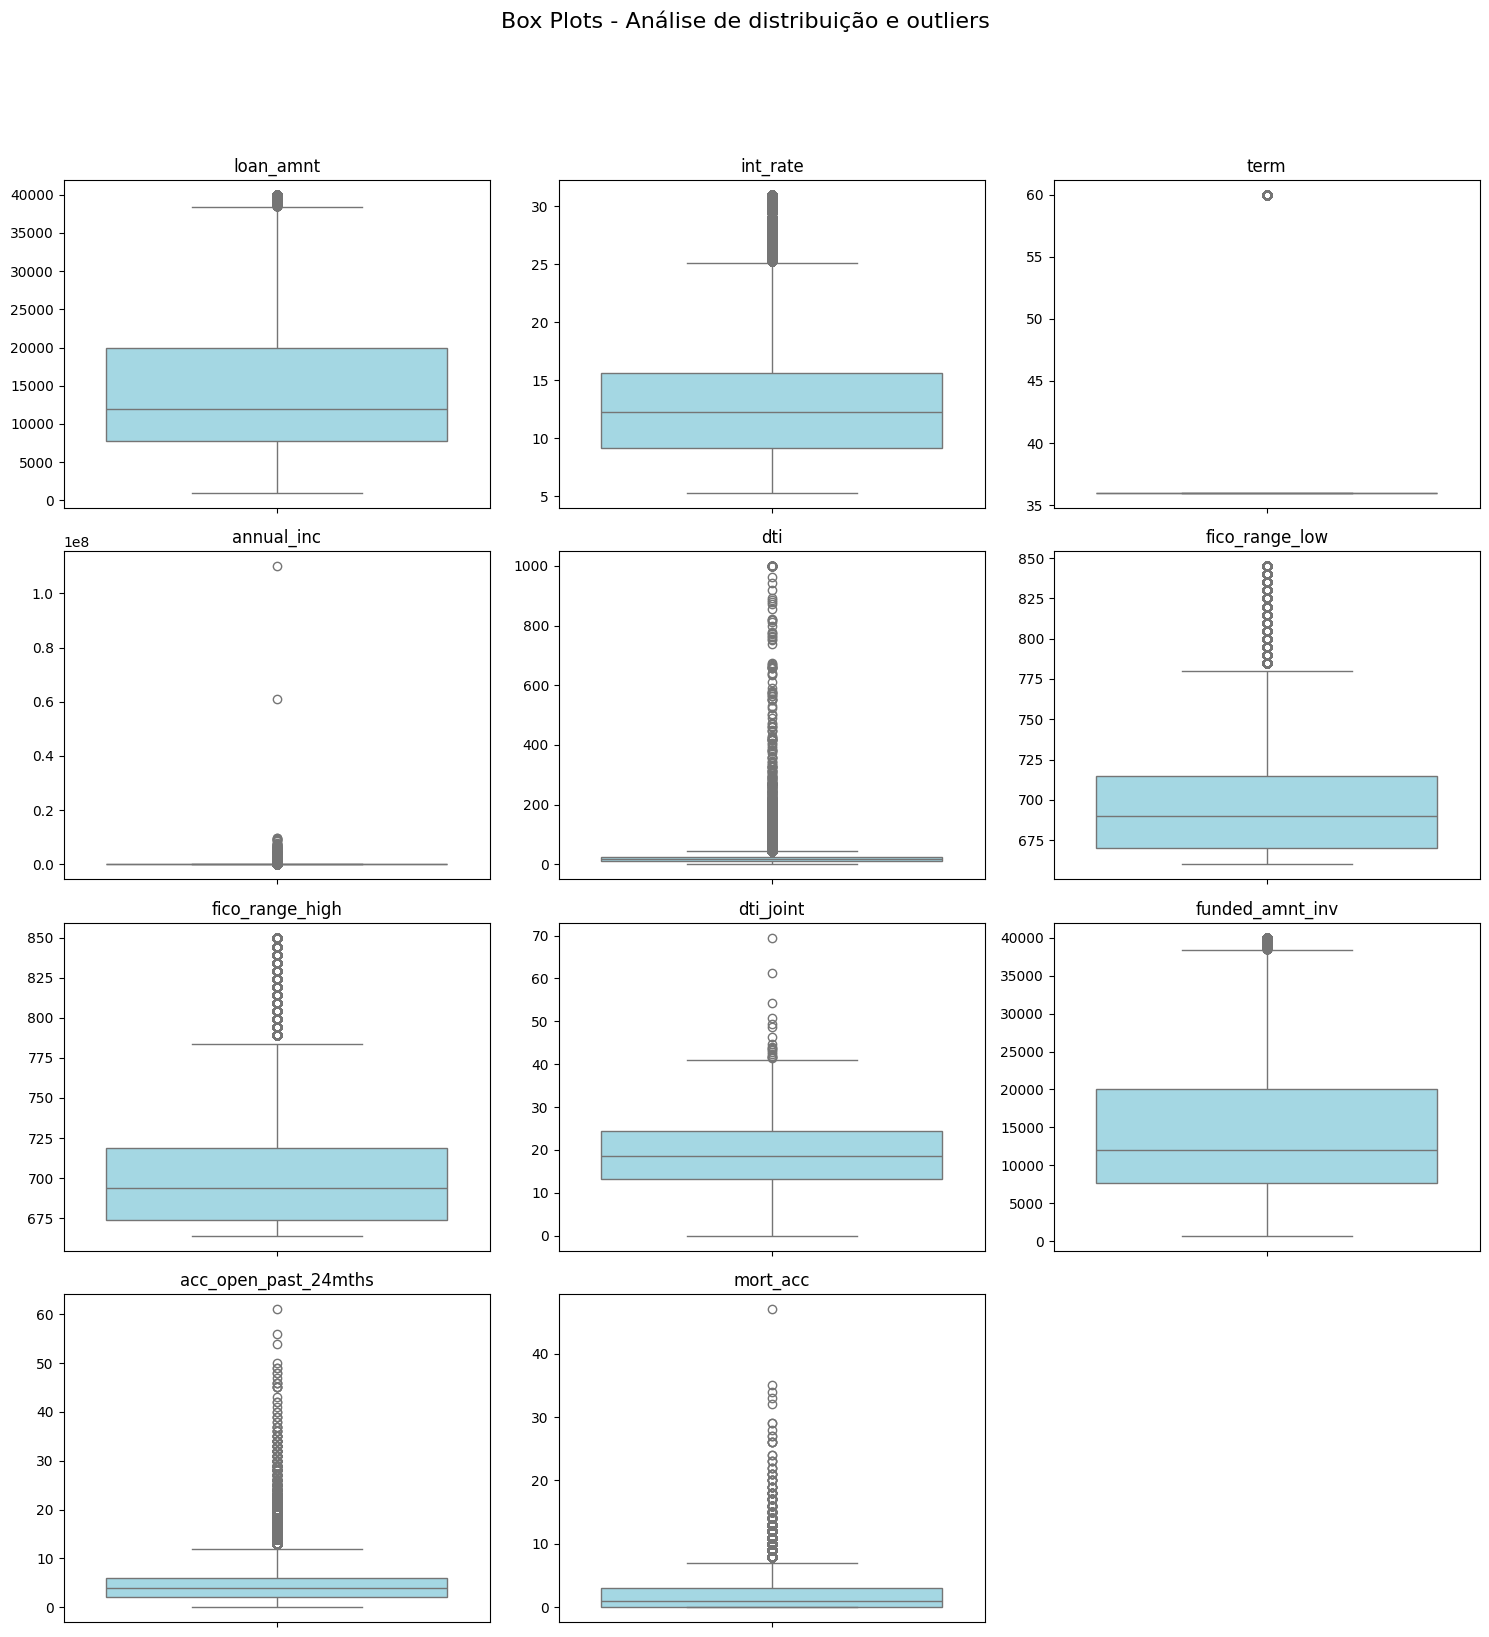

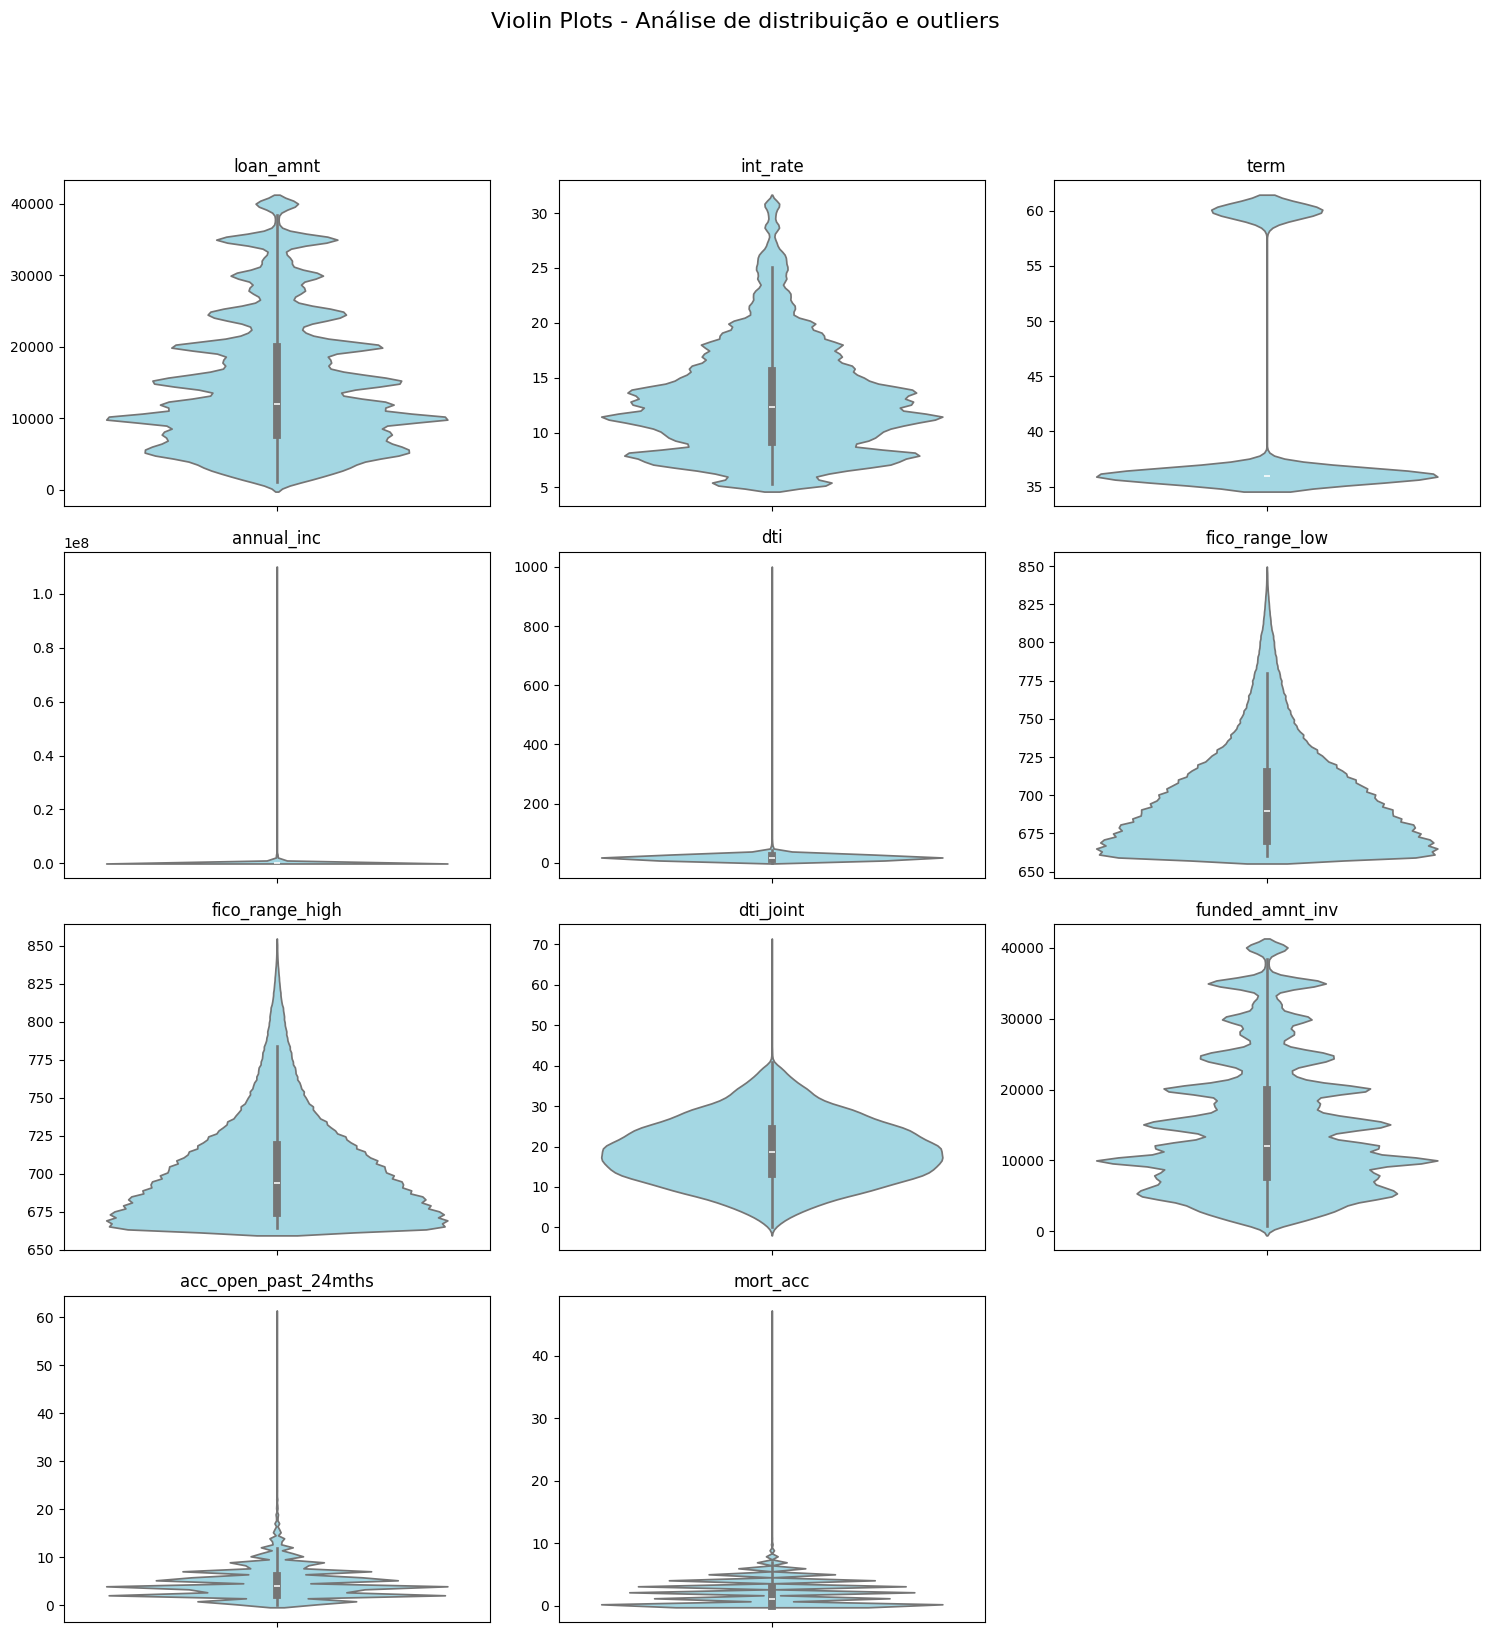

In [7]:
# ==============================================================================
# 4. RESUMO ESTATÍSTICO - VARIÁVEIS NUMÉRICAS
# ==============================================================================

print("\n" + "="*60)
print("4. RESUMO ESTATÍSTICO - VARIÁVEIS NUMÉRICAS")
print("="*60)

# Remoção do funded_amnt, pois é sempre igual ao loan_amnt
extended_key_columns = [col for col in extended_key_columns if col != 'funded_amnt']

def plotar_graficos_agrupados(df, colunas, tipo_plot):
    if tipo_plot not in ['box', 'violin']:
        print("Erro: tipo_plot deve ser 'box' ou 'violin'")
        return

    num_plots = len(colunas)
    # Ajusta o número de colunas do subplot para no máximo 3 para não ficar muito pequeno
    ncols = min(num_plots, 3)
    nrows = (num_plots - 1) // ncols + 1

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))

    # Se houver apenas um gráfico, axes não será um array, então o colocamos em uma lista
    if num_plots == 1:
        axes = [axes]
    else:
        # Achata o array de eixos para facilitar a iteração
        axes = axes.flatten()

    titulo_figura = f'{tipo_plot.capitalize()} Plots - Análise de distribuição e outliers'
    fig.suptitle(titulo_figura, fontsize=16, y=1.02)

    plot_func = sns.boxplot if tipo_plot == 'box' else sns.violinplot

    for i, coluna in enumerate(colunas):
        ax = axes[i]
        plot_func(y=df[coluna], ax=ax, color='#99ddee')
        ax.set_title(coluna, fontsize=12)
        ax.set_ylabel('')
        ax.set_xlabel('')

    # Oculta eixos não utilizados se o número de plots não preencher a grade
    for i in range(num_plots, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Converte colunas de texto para numéricas para incluí-las na análise
if df['term'].dtype == 'object':
    df['term'] = df['term'].str.extract('(\d+)').astype(int)
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remover a variável target das estatísticas descritivas
if 'target_default' in numeric_cols:
    numeric_cols.remove('target_default')

# Estatísticas básicas
stats_df = df[numeric_cols].describe()

# Adicionar estatísticas extras
extra_stats = pd.DataFrame({
    'missing_count': df[numeric_cols].isnull().sum(),
    'missing_pct': (df[numeric_cols].isnull().sum() / len(df) * 100).round(2),
    'zeros': (df[numeric_cols] == 0).sum(),
    'unique_values': df[numeric_cols].nunique(),
    'skewness': df[numeric_cols].skew().round(3),
    'kurtosis': df[numeric_cols].kurtosis().round(3)
})

# Combinar estatísticas
combined_stats = pd.concat([stats_df, extra_stats.T])

# Principais variáveis para análise detalhada
# Removemos 'funded_amnt' pois é sempre igual a 'loan_amnt' (verificado na análise de inconsistências)
# Selecionar para a análise todas as variáveis de 'extended_key_columns' que são numéricas
key_numeric_vars = [
    col for col in extended_key_columns
    if col in numeric_cols and col != 'target_default'
]

existing_key_numeric = [col for col in key_numeric_vars if col in numeric_cols]

print("\nPrincipais variáveis numéricas:")
print(combined_stats[existing_key_numeric].round(2).to_string())

n_vars = len(existing_key_numeric)
n_cols = 3  # Define 3 colunas para um layout agradável
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula as linhas necessárias


# Gráficos de histogramas + KDE para análise de distribuição
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
axes = axes.flatten()

print("ANÁLISE DE DISTRIBUIÇÃO - Histogramas + KDE")
print("=" * 60)

distribution_insights = []

for i, var in enumerate(existing_key_numeric):
    ax = axes[i]
    print(f"\nAnálise de {var}:")

    if var == 'term':
        sns.countplot(x=df[var], ax=ax, palette='viridis')
        ax.set_title(f'Contagem de {var}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Prazo (meses)')
        ax.set_ylabel('Quantidade')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')
        print("- Variável discreta. Análise de skew/kurtosis não aplicável.")

    else:
        data_original = df[var].dropna()
        data_clean = data_original[np.abs(stats.zscore(data_original)) < 3]

        if len(data_clean) > 1: # Precisa de pelo menos 2 pontos para calcular IQR
            # Cálculo dinâmico de bins (Regra de Freedman-Diaconis)
            q25, q75 = np.percentile(data_clean, [25, 75])
            iqr = q75 - q25
            bin_width = 2 * iqr * (len(data_clean) ** (-1/3))

            # Evitar divisão por zero se a largura do bin for 0
            if bin_width > 0:
                bins = int(np.ceil((data_clean.max() - data_clean.min()) / bin_width))
                # Limitar a um máximo razoável para não sobrecarregar
                bins = min(bins, 50)
            else:
                # Fallback para dados com variância muito baixa
                bins = 20

            # Histograma + KDE com bins dinâmicos
            sns.histplot(data_clean, kde=True, ax=axes[i], alpha=0.7, color='skyblue', stat='density', bins=bins)
            ax.set_title(f'{var}\n(Removidos {len(data_original) - len(data_clean)} outliers extremos)',
                            fontsize=11, fontweight='bold')
            ax.grid(True, alpha=0.3)

            # Estatísticas
            skewness = stats.skew(data_clean)
            kurtosis_val = stats.kurtosis(data_clean)

            # Interpretação da assimetria
            if abs(skewness) < 0.5:
                skew_text = "Aproximadamente simétrica"
            elif skewness > 0.5:
                skew_text = "Assimétrica à direita (cauda longa à direita)"
            else:
                skew_text = "Assimétrica à esquerda (cauda longa à esquerda)"

            # Interpretação da curtose
            if kurtosis_val > 0:
                kurtosis_desc = "Leptocúrtica (mais concentrada que normal)"
            elif kurtosis_val < 0:
                kurtosis_desc = "Platicúrtica (menos concentrada que normal)"
            else:
                kurtosis_desc = "Mesocúrtica (concentração normal)"

            print(f"- Assimetria: {skewness:.3f} -> {skew_text}")
            print(f"- Curtose: {kurtosis_val:.3f} -> {kurtosis_desc}")

            distribution_insights.append({
                'variavel': var,
                'assimetria': round(skewness, 3),
                'curtose': round(kurtosis_val, 3),
                'interpretacao_assimetria': skew_text,
                'interpretacao_curtose': kurtosis_desc
            })
        else:
            ax.text(0.5, 0.5, f'Dados insuficientes para {var}', ha='center', va='center', transform=axes[i].transAxes)

# Oculta eixos não utilizados
for j in range(n_vars, len(axes)):
    axes[j].set_visible(False)
# Ajustar layout e título
plt.suptitle('Análise de distribuição das principais variáveis numéricas\n(Histogramas + KDE para identificar forma e assimetria)',
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

# Chamar a função para gerar os Box Plots
plotar_graficos_agrupados(df, existing_key_numeric, 'box')
plotar_graficos_agrupados(df, existing_key_numeric, 'violin')


### Resumo estatístico - variáveis categóricas

Esta seção analisa as variáveis categóricas selecionadas na `extended_key_columns`, fornecendo uma visão abrangente de suas características estatísticas e distribuições. A análise focará em aspectos fundamentais como:

- **Cardinalidade**: número de valores únicos em cada variável
- **Distribuição da moda**: categoria mais comum e sua concentração percentual
- **Visualizações**: gráficos de distribuição com agrupamento de categorias raras para manter a clareza

A análise das variáveis categóricas nos permite traçar um perfil claro do cliente típico da Lending Club e entender a composição do seu portfólio de crédito. A distribuição dos dados revela uma estratégia de negócios focada em um nicho de mercado bem definido, em vez de uma abordagem generalista.

O principal produto da plataforma é direcionado para a __consolidação de dívidas__, finalidade que domina a maior parte das solicitações de empréstimo, seguida pelo refinanciamento de cartões de crédito. Isso indica que a Lending Club atrai clientes que buscam ativamente reorganizar suas finanças e otimizar seus passivos, em vez de financiar novas compras ou investimentos.

Do ponto de vista do risco, a carteira é predominantemente composta por clientes classificados nos __grades B e C__, que representam um risco moderado. A plataforma parece evitar uma concentração nos extremos, tanto nos perfis de baixíssimo risco (grade A) quanto nos de altíssimo risco (grades D em diante), calibrando sua exposição para um retorno ajustado ao risco mais previsível.

O perfil de moradia dos tomadores reforça essa imagem de um cliente em fase de construção de patrimônio: a maioria ou possui uma __hipoteca (`MORTGAGE`)__ ou vive de __aluguel (`RENT`)__. Clientes que já são proprietários de seus imóveis sem dívidas (`OWN`) são uma minoria.

Finalmente, a estrutura das aplicações é massivamente __individual__, com pouquíssimos empréstimos conjuntos, o que pode limitar a relevância preditiva desta variável. Em contrapartida, os diferentes status de verificação de renda são bem distribuídos, mostrando que a plataforma aplica um processo de análise com múltiplos níveis de rigor.



5. RESUMO ESTATÍSTICO - VARIÁVEIS CATEGÓRICAS

5.1 SELEÇÃO DE VARIÁVEIS CATEGÓRICAS
----------------------------------------
Variáveis categóricas identificadas: 6
Lista: ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state']

5.2 TABELA DE RESUMO ESTATÍSTICO
----------------------------------------
           Variável  Nº Únicos Ausentes (%)               Moda  Freq. Moda Conc. Moda (%)
              grade          7         0.0%                  B      175594          29.3%
          sub_grade         35         0.0%                 C1       39678           6.6%
     home_ownership          5         0.0%           MORTGAGE      293351          48.9%
verification_status          3         0.0%    Source Verified      249775          41.6%
            purpose         13         0.0% debt_consolidation      339488          56.6%
         addr_state         50         0.0%                 CA       82855          13.8%

5.3 VISUALIZAÇÕES DE DISTRIBUIÇÃO

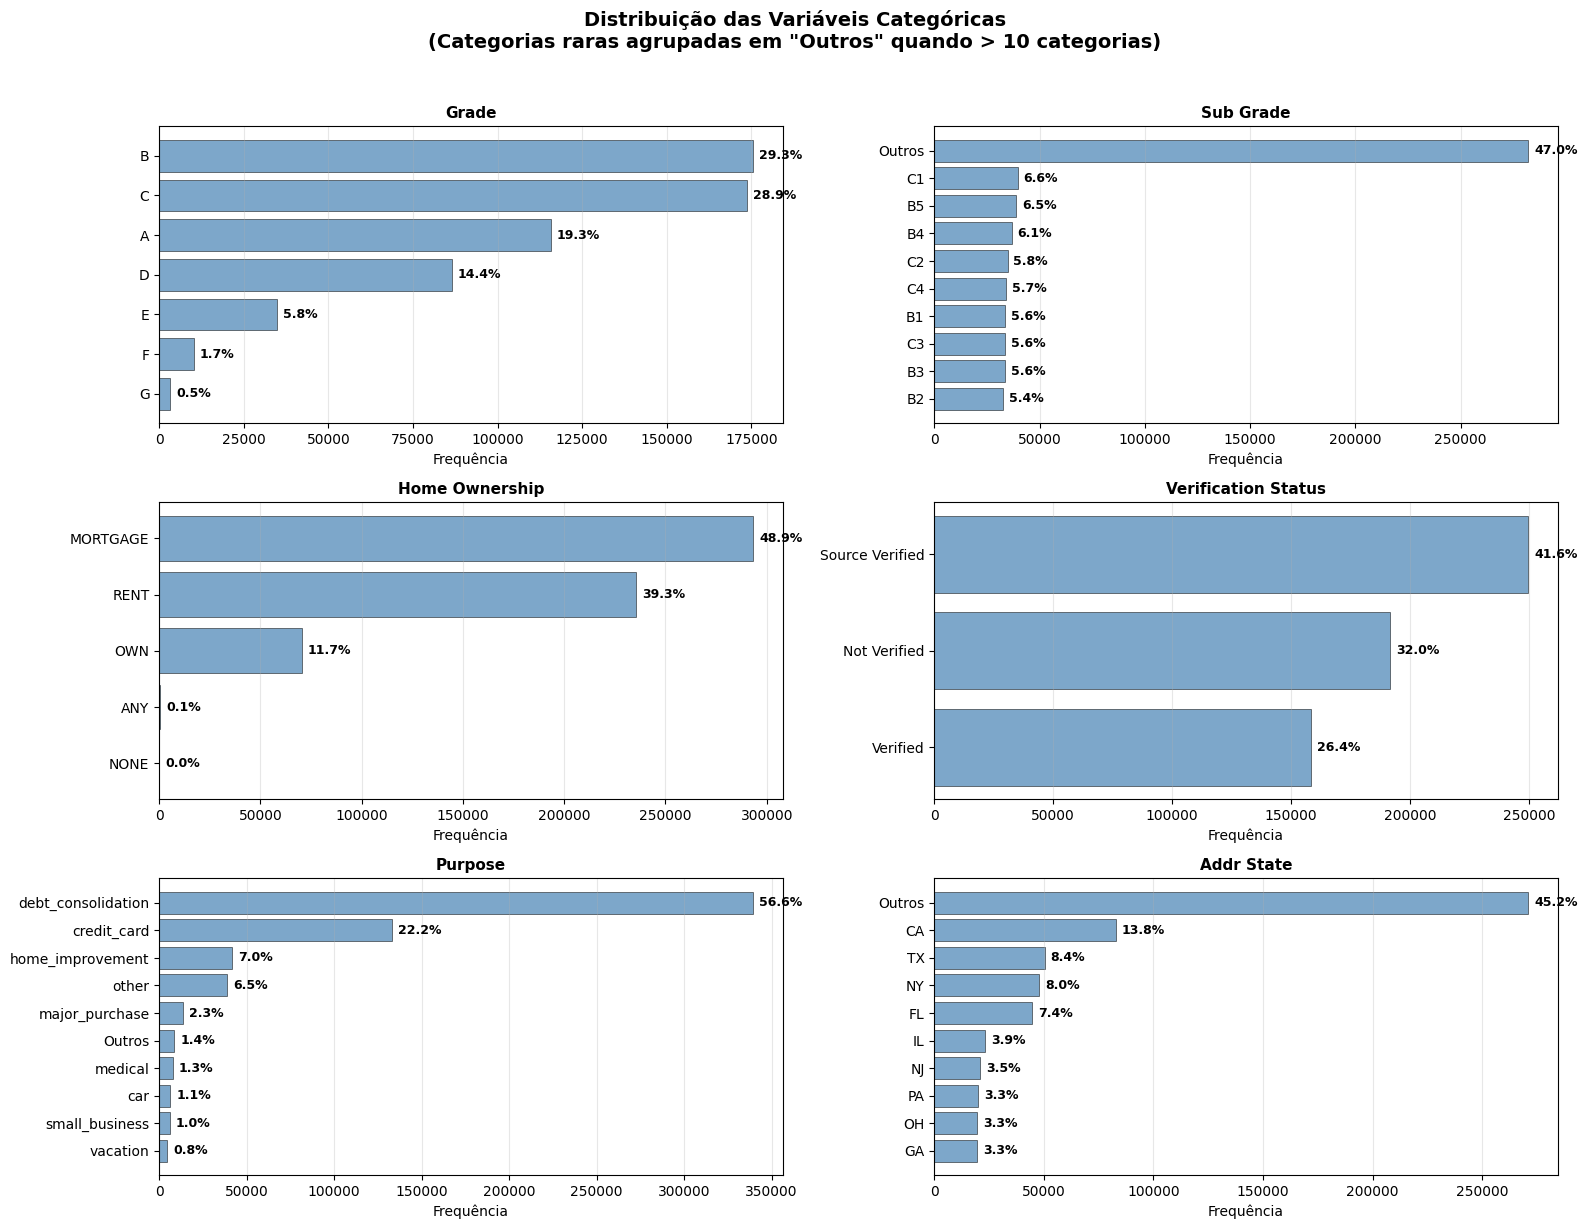

In [8]:
# ==============================================================================
# 5. RESUMO ESTATÍSTICO - VARIÁVEIS CATEGÓRICAS
# ==============================================================================

print("\n" + "="*60)
print("5. RESUMO ESTATÍSTICO - VARIÁVEIS CATEGÓRICAS")
print("="*60)

# a. Seleção dinâmica de variáveis categóricas
print("\n5.1 SELEÇÃO DE VARIÁVEIS CATEGÓRICAS")
print("-" * 40)

# Começar com as variáveis da extended_key_columns
categorical_vars = []

# Incluir variáveis de tipo object
for col in extended_key_columns:
    if col in df.columns:
        if df[col].dtype == 'object':
            categorical_vars.append(col)
        # Incluir variáveis numéricas com baixa cardinalidade (tratadas como categóricas)
        elif df[col].dtype in ['int64', 'float64'] and df[col].nunique() < 15:
            categorical_vars.append(col)

# Excluir colunas não adequadas para análise de frequência
cols_to_exclude = ['issue_d', 'earliest_cr_line', 'zip_code', 'term', 'target_default']
categorical_vars = [col for col in categorical_vars if col not in cols_to_exclude]

print(f"Variáveis categóricas identificadas: {len(categorical_vars)}")
print(f"Lista: {categorical_vars}")

# b. Geração de tabela de resumo
print("\n5.2 TABELA DE RESUMO ESTATÍSTICO")
print("-" * 40)

summary_data = []
for var in categorical_vars:
    if var in df.columns:
        # Estatísticas básicas
        total_count = len(df[var])
        unique_count = df[var].nunique()
        missing_count = df[var].isnull().sum()
        missing_pct = (missing_count / total_count) * 100

        # Moda e sua frequência
        if not df[var].dropna().empty:
            mode_value = df[var].mode().iloc[0] if len(df[var].mode()) > 0 else 'N/A'
            mode_freq = df[var].value_counts().iloc[0] if len(df[var].value_counts()) > 0 else 0
            mode_concentration = (mode_freq / (total_count - missing_count)) * 100 if (total_count - missing_count) > 0 else 0
        else:
            mode_value = 'N/A'
            mode_freq = 0
            mode_concentration = 0

        summary_data.append({
            'Variável': var,
            'Nº Únicos': unique_count,
            'Ausentes (%)': f"{missing_pct:.1f}%",
            'Moda': str(mode_value),
            'Freq. Moda': mode_freq,
            'Conc. Moda (%)': f"{mode_concentration:.1f}%"
        })

# Criar DataFrame de resumo
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# c. Geração de gráficos de distribuição
print("\n5.3 VISUALIZAÇÕES DE DISTRIBUIÇÃO")
print("-" * 40)

def prepare_categorical_data(series, max_categories=10):
    """Agrupa categorias menos frequentes em 'Outros'"""
    value_counts = series.value_counts()

    if len(value_counts) <= max_categories:
        return series

    # Manter as top (max_categories - 1) categorias
    top_categories = value_counts.head(max_categories - 1).index

    # Criar nova série com agrupamento
    new_series = series.copy()
    new_series[~series.isin(top_categories)] = 'Outros'

    return new_series

def add_percentage_annotations(ax, total_count):
    """Adiciona anotações de percentual nas barras"""
    for container in ax.containers:
        labels = [f'{v/total_count*100:.1f}%' if v > 0 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, ha='left')

# Configurar grid de subplots
n_vars = len(categorical_vars)
n_cols = 2
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    ax = axes[i]

    # Preparar dados com agrupamento se necessário
    series_clean = df[var].dropna()
    if len(series_clean) == 0:
        ax.text(0.5, 0.5, f'Sem dados válidos\npara {var}',
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{var}', fontweight='bold')
        continue

    prepared_data = prepare_categorical_data(series_clean, max_categories=10)
    value_counts = prepared_data.value_counts()

    # Criar gráfico de barras horizontais
    bars = ax.barh(range(len(value_counts)), value_counts.values,
                   color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)

    # Configurar eixos
    ax.set_yticks(range(len(value_counts)))
    ax.set_yticklabels(value_counts.index, fontsize=10)
    ax.set_xlabel('Frequência', fontsize=10)
    ax.set_title(f'{var.replace("_", " ").title()}', fontweight='bold', fontsize=11)

    # Adicionar anotações de percentual
    total_valid = len(series_clean)
    for j, (bar, count) in enumerate(zip(bars, value_counts.values)):
        percentage = (count / total_valid) * 100
        ax.text(bar.get_width() + max(value_counts.values) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{percentage:.1f}%',
                va='center', ha='left', fontsize=9, fontweight='bold')

    # Adicionar informações de dados ausentes se relevante
    missing_count = df[var].isnull().sum()
    if missing_count > 0:
        missing_pct = (missing_count / len(df)) * 100
        ax.text(0.02, 0.98, f'Ausentes: {missing_pct:.1f}%',
                transform=ax.transAxes, fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                verticalalignment='top')

    ax.grid(axis='x', alpha=0.3)
    ax.invert_yaxis()  # Maior frequência no topo

# Ocultar subplots não utilizados
for j in range(n_vars, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribuição das Variáveis Categóricas\n(Categorias raras agrupadas em "Outros" quando > 10 categorias)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### Análise de valores extremos (outliers)

Ao avaliar as variáveis de alta assimetria como a renda anual (`annual_inc`) e a relação dívida/renda (`dti`), é possível observar que são suscetíveis a outliers que podem distorcer as métricas estatísticas e, consequentemente, prejudicar o desempenho de certos algoritmos de machine learning.

A distribuição da renda anual, por exemplo, é caracterizada por uma forte concentração em valores mais baixos, mas com uma cauda longa de rendas extremamente altas. Esses poucos pontos de dados atípicos "puxam" a média para cima de forma desproporcional, tornando-a uma medida de tendência central pouco representativa da maioria dos tomadores. A visualização comparativa, antes e depois da remoção de outliers pelo método IQR, demonstra que a distribuição se torna mais compacta e a média se desloca para um valor mais realista. A remoção de uma pequena fração de dados resulta em uma redução drástica no desvio padrão, revelando que a variabilidade do núcleo dos dados é muito menor.

O mesmo fenômeno, embora menos pronunciado, ocorre com o `dti`, onde valores atipicamente altos poderiam indicar erros de preenchimento ou situações financeiras incomuns. A presença desses outliers implica em uma recomendação de remoção de valores extremos (capping) ou a aplicação de uma transformação logarítmica.


6. ANÁLISE DE VALORES EXTREMOS
Análise detalhada de outliers - Variáveis com alta assimetria:
Variável        IQR Out    IQR %    Z-score Out  Z-score %  Min             Max            
------------------------------------------------------------------------------------------
dti             5447       0.9      1915         0.3        0               999            
annual_inc      28488      4.7      619          0.1        0               110,000,000    


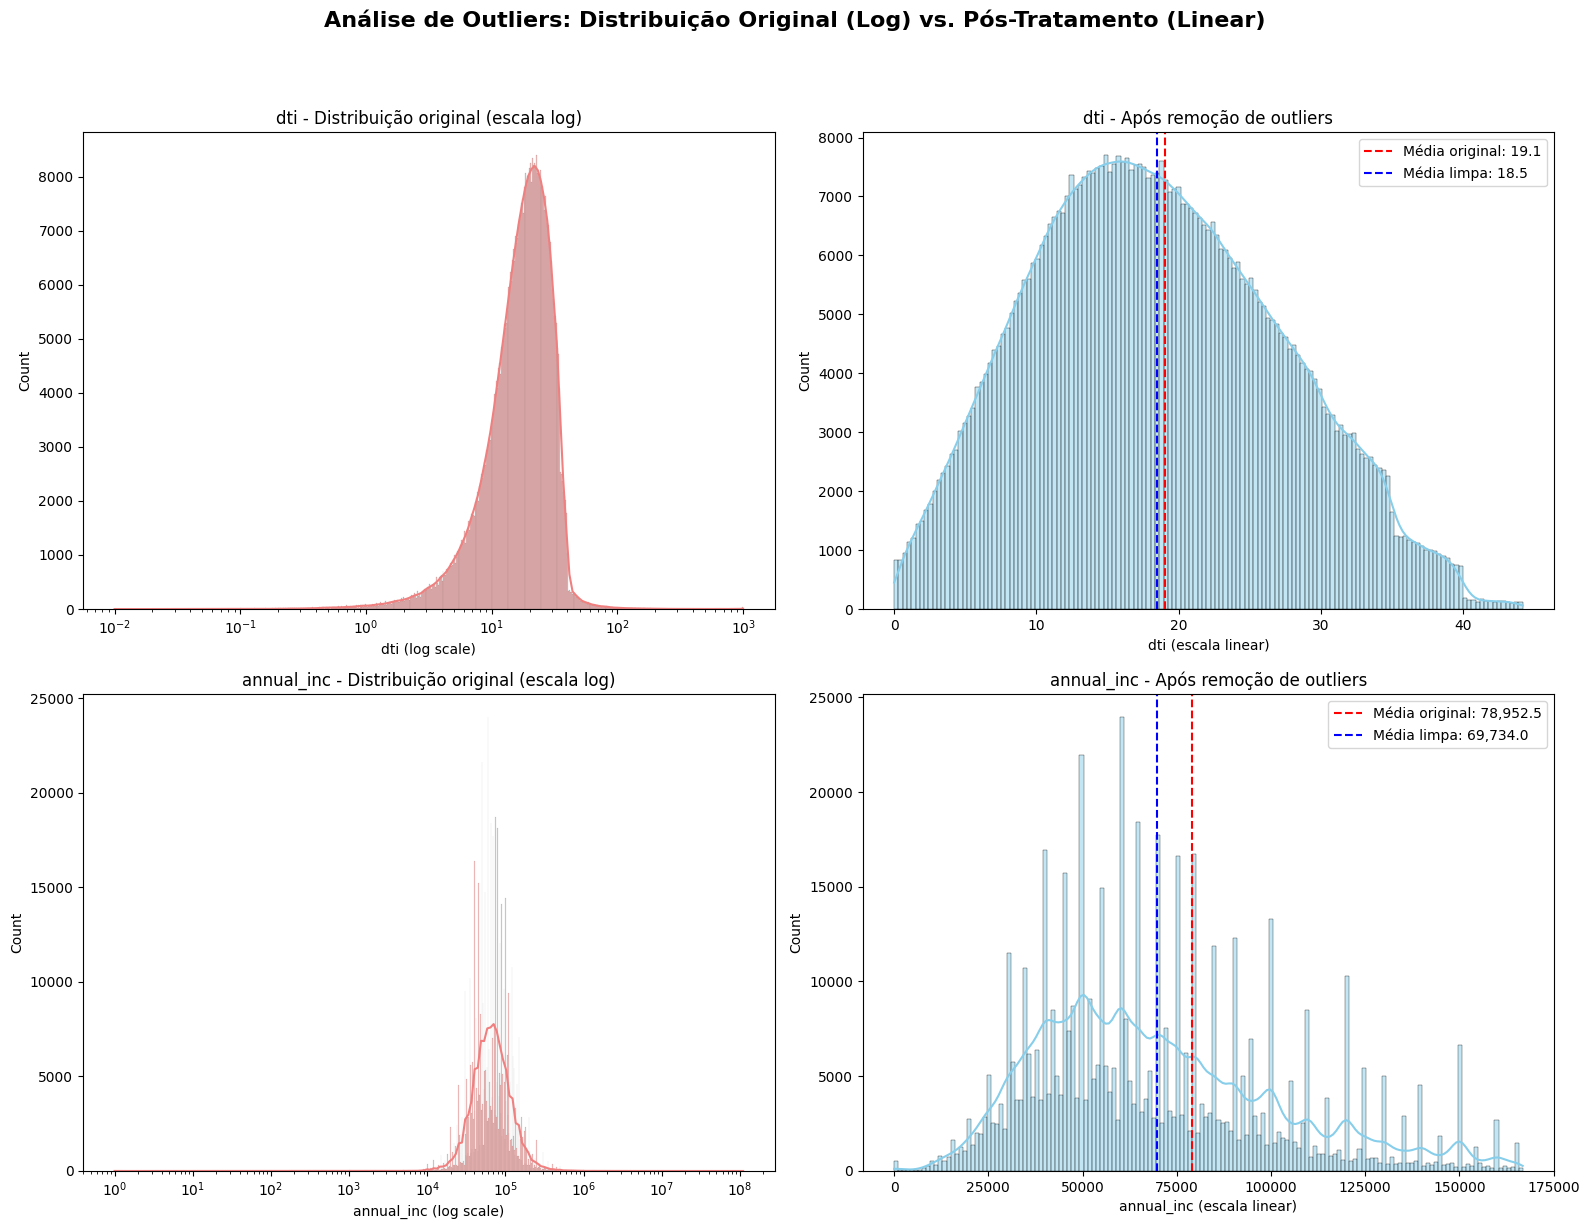


Impacto da remoção de outliers:

dti:
- Registros removidos: 0.9%
- Mudança na média: 3.1%
- Redução desvio padrão: 42.1%

annual_inc:
- Registros removidos: 4.7%
- Mudança na média: 11.7%
- Redução desvio padrão: 82.2%


In [9]:
# 6. Análise de valores extremos
print("="*60)
print("6. ANÁLISE DE VALORES EXTREMOS")
print("="*60)

# Foco nas variáveis que realmente necessitam análise aprofundada: dti e annual_inc
# As demais variáveis (loan_amnt, FICO scores, term) possuem explicações de regras de negócio

def detect_outliers_iqr(series):
    """Detecta outliers usando método IQR"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), (len(outliers) / len(series)) * 100, lower_bound, upper_bound

def detect_outliers_zscore(series, threshold=3):
    """Detecta outliers usando Z-score"""
    z_scores = np.abs(stats.zscore(series.dropna()))
    outliers = series[z_scores > threshold]
    return len(outliers), (len(outliers) / len(series)) * 100

# Análise focada em dti e annual_inc
focus_vars = ['dti', 'annual_inc']
existing_focus_vars = [var for var in focus_vars if var in df.columns]

print("Análise detalhada de outliers - Variáveis com alta assimetria:")
print(f"{'Variável':<15} {'IQR Out':<10} {'IQR %':<8} {'Z-score Out':<12} {'Z-score %':<10} {'Min':<15} {'Max':<15}")
print("-" * 90)

outlier_summary = []
for col in existing_focus_vars:
    if col in df.columns and df[col].dtype in ['int64', 'float64']:
        data_clean = df[col].dropna()

        # Método IQR
        iqr_count, iqr_pct, lower_bound, upper_bound = detect_outliers_iqr(data_clean)

        # Método Z-score
        zscore_count, zscore_pct = detect_outliers_zscore(data_clean)

        min_val = data_clean.min()
        max_val = data_clean.max()

        print(f"{col:<15} {iqr_count:<10} {iqr_pct:<8.1f} {zscore_count:<12} {zscore_pct:<10.1f} {min_val:<15,.0f} {max_val:<15,.0f}")

        outlier_summary.append({
            'variavel': col,
            'iqr_outliers': iqr_count,
            'iqr_pct': iqr_pct,
            'zscore_outliers': zscore_count,
            'zscore_pct': zscore_pct,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })

# Visualização comparativa para as variáveis foco
if len(existing_focus_vars) > 0:
    # Cria um grid de subplots: uma linha por variável, duas colunas (antes/depois)
    fig, axes = plt.subplots(len(existing_focus_vars), 2, figsize=(16, 6 * len(existing_focus_vars)), squeeze=False)
    fig.suptitle('Análise de Outliers: Distribuição Original (Log) vs. Pós-Tratamento (Linear)', fontsize=16, fontweight='bold', y=1.02)

    for i, col in enumerate(existing_focus_vars):
        data_original = df[col].dropna()
        outlier_info = outlier_summary[i]
        data_clean = data_original[(data_original >= outlier_info['lower_bound']) &
                                  (data_original <= outlier_info['upper_bound'])]

        # Evitar log(0) para a visualização
        data_log = data_original[data_original > 0]

        # Gráfico 1: Distribuição original em escala logarítmica
        ax1 = axes[i, 0]
        sns.histplot(data_log, ax=ax1, kde=True, log_scale=True, color='lightcoral')
        ax1.set_title(f'{col} - Distribuição original (escala log)', fontsize=12)
        ax1.set_xlabel(f'{col} (log scale)')

        # Gráfico 2: Distribuição após remoção de outliers (IQR)
        ax2 = axes[i, 1]
        sns.histplot(data_clean, ax=ax2, kde=True, color='skyblue')
        ax2.set_title(f'{col} - Após remoção de outliers', fontsize=12)
        ax2.set_xlabel(f'{col} (escala linear)')

        # Adicionar estatísticas para comparação
        mean_orig = data_original.mean()
        mean_clean = data_clean.mean()
        ax2.axvline(mean_orig, color='red', linestyle='--', label=f'Média original: {mean_orig:,.1f}')
        ax2.axvline(mean_clean, color='blue', linestyle='--', label=f'Média limpa: {mean_clean:,.1f}')
        ax2.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# Análise detalhada dos impactos
print(f"\nImpacto da remoção de outliers:")
for i, col in enumerate(existing_focus_vars):
    data_original = df[col].dropna()
    outlier_info = outlier_summary[i]
    data_clean = data_original[(data_original >= outlier_info['lower_bound']) &
                              (data_original <= outlier_info['upper_bound'])]

    orig_mean, clean_mean = data_original.mean(), data_clean.mean()
    orig_std, clean_std = data_original.std(), data_clean.std()

    reduction_pct = (len(data_original) - len(data_clean)) / len(data_original) * 100
    mean_change = abs(orig_mean - clean_mean) / orig_mean * 100
    std_change = abs(orig_std - clean_std) / orig_std * 100

    print(f"\n{col}:")
    print(f"- Registros removidos: {reduction_pct:.1f}%")
    print(f"- Mudança na média: {mean_change:.1f}%")
    print(f"- Redução desvio padrão: {std_change:.1f}%")


### Análise comparativa das variáveis numéricas: distribuições por adimplência

A análise comparativa entre empréstimos **pagos** e **inadimplentes** revelou diferenças significativas em todas as variáveis numéricas, validando nossas hipóteses sobre fatores de risco.

**Metodologia estatística:**

Aplicamos o **teste de Mann-Whitney U** (não-paramétrico) para comparar as distribuições dos dois grupos, complementado pelo cálculo do **effect size** (correlação rank-biserial) para quantificar a magnitude prática das diferenças.

**Cálculo do Effect Size:**

effect_size = 1 - (2 × U) / (n₁ × n₂)

Onde U = estatística Mann-Whitney, n₁ = tamanho grupo pagos, n₂ = tamanho grupo inadimplentes.

**Interpretação do Effect Size:**
- **Magnitude:** |r| < 0,1 (pequeno), 0,1 ≤ |r| < 0,3 (médio), |r| ≥ 0,3 (grande)
- **Direção:** Positivo = inadimplentes têm valores maiores; negativo = inadimplentes têm valores menores
- **Significado prático:** Representa a proporção da variabilidade associada ao status de pagamento

Todos os resultados apresentaram **p-values < 0,001**, indicando diferenças estatisticamente significativas com confiança superior a 99,9%.

**Principais descobertas:**

1. **Taxa de juros (`int_rate`)** - **Maior poder discriminatório**
   - Diferença na mediana: +27,5% | Effect size: 0,375 (**grande**)
   - Inadimplentes pagam taxas muito maiores, refletindo efetiva captura de risco pelo algoritmo da Lending Club.

2. **Valor do empréstimo (`loan_amnt`)**
   - Diferença na mediana: +25,0% | Effect size: 0,125 (**médio**)
   - Empréstimos maiores associados a maior risco de default.

3. **Scores FICO (`fico_range_low/high`)**
   - Diferença na mediana: -0,7% | Effect size: -0,163 (**médio**)
   - Pequenas diferenças absolutas, mas estatisticamente relevantes para predição.

   - Insight importante:
      - A **mediana** compara apenas o ponto central das distribuições (690 vs 685 = diferença mínima). O **effect size** mede a separação entre **distribuições completas**. Mesmo com medianas próximas, há diferenças sistemáticas nas **caudas**: mais inadimplentes concentrados nos percentis baixos (600-680) e mais pagos nos percentis altos (720+). Com 600k observações, essas diferenças pequenas mas **consistentes** se tornam estatisticamente detectáveis. Além disso, como a Lending Club exigia FICO ≥ 600, a distribuição fica comprimida numa faixa estreita onde pequenas diferenças importam proporcionalmente mais. Dessa maneira, o effect size captura poder discriminatório real que a simples comparação de medianas não revela. Isso é algo que se torna mais evidente quando olhamos para os gráficos de densidade (KDE) das distribuições.

4. **Relação dívida/renda (`dti`)**
   - Diferença na mediana: +12,6% | Effect size: 0,120 (**médio**)
   - Confirma que maior comprometimento da renda reduz capacidade de pagamento.

5. **Renda anual (`annual_inc`)**
   - Diferença na mediana: -7,5% | Effect size: -0,080 (**pequeno**)
   - Menor relevância preditiva comparada ao DTI.

**Implicações dos resultados desta seção para a modelagem:**

- **Hierarquia de importância:** int_rate > fico_scores > loan_amnt ≈ dti > annual_inc
- Todas as variáveis são estatisticamente significativas e devem ser incluídas no modelo
- A **taxa de juros** é o preditor mais forte identificado(effect size = 0,375), mas ainda a ver a correlação entre as variáveis
- **FICO scores** têm poder discriminatório relevante, apesar de diferenças absolutas pequenas
- **Modelos probabilísticos** são mais apropriados que regras simples, dada a sobreposição nas distribuições observada nos gráficos KDE

## Referências

FRITZ, C. O.; MORRIS, P. E.; RICHLER, J. J. Effect size estimates: current use, calculations, and interpretation. Journal of Experimental Psychology: General, v. 141, n. 1, p. 2-18, 2012.

MANN, H. B.; WHITNEY, D. R. On a test of whether one of two random variables is stochastically larger than the other. The Annals of Mathematical Statistics, v. 18, n. 1, p. 50-60, 1947.


7. ANÁLISE COMPARATIVA DAS VARIÁVEIS NUMÉRICAS: DISTRIBUIÇÕES POR ADIMPLÊNCIA
Objetivo: Visualizar como a distribuição de cada variável numérica chave
se comporta para os dois grupos: empréstimos pagos vs inadimplentes
Variáveis analisadas: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'dti_joint', 'funded_amnt_inv', 'acc_open_past_24mths', 'mort_acc']
Tamanho dos grupos:
- Empréstimos pagos (target_default = 0): 467,554
- Empréstimos inadimplentes (target_default = 1): 132,440
- Taxa de inadimplência: 22.1%


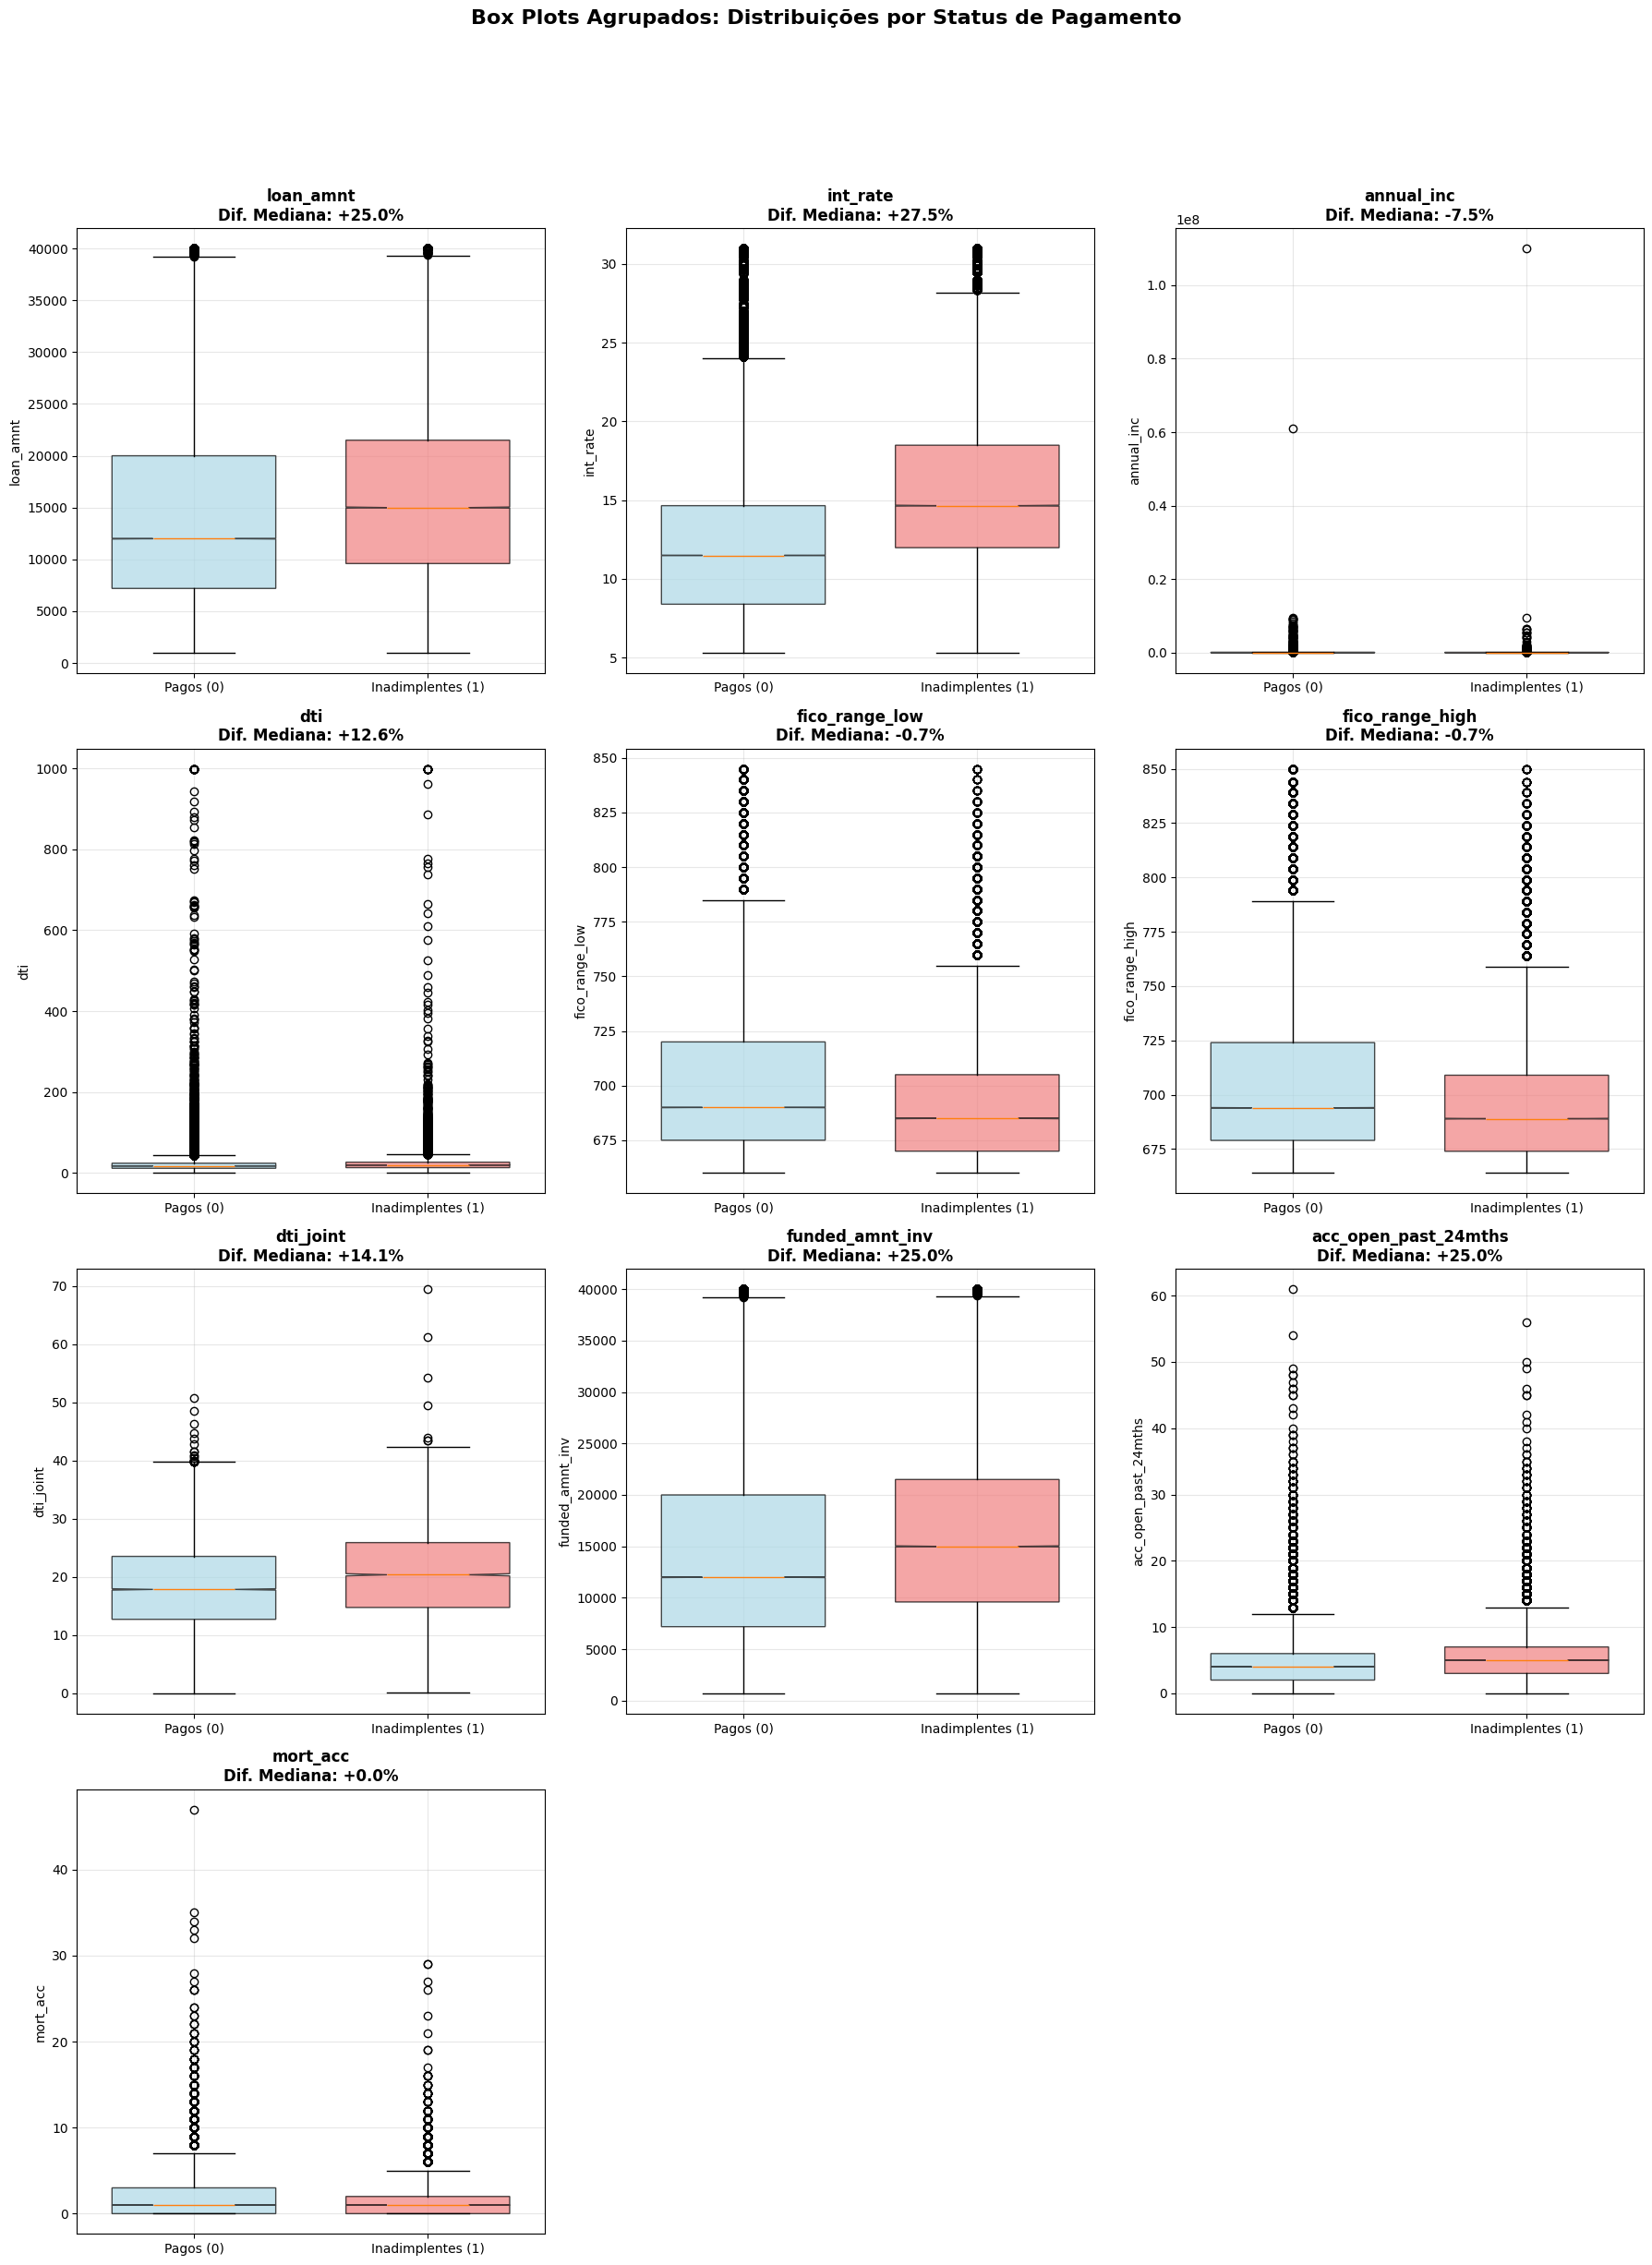

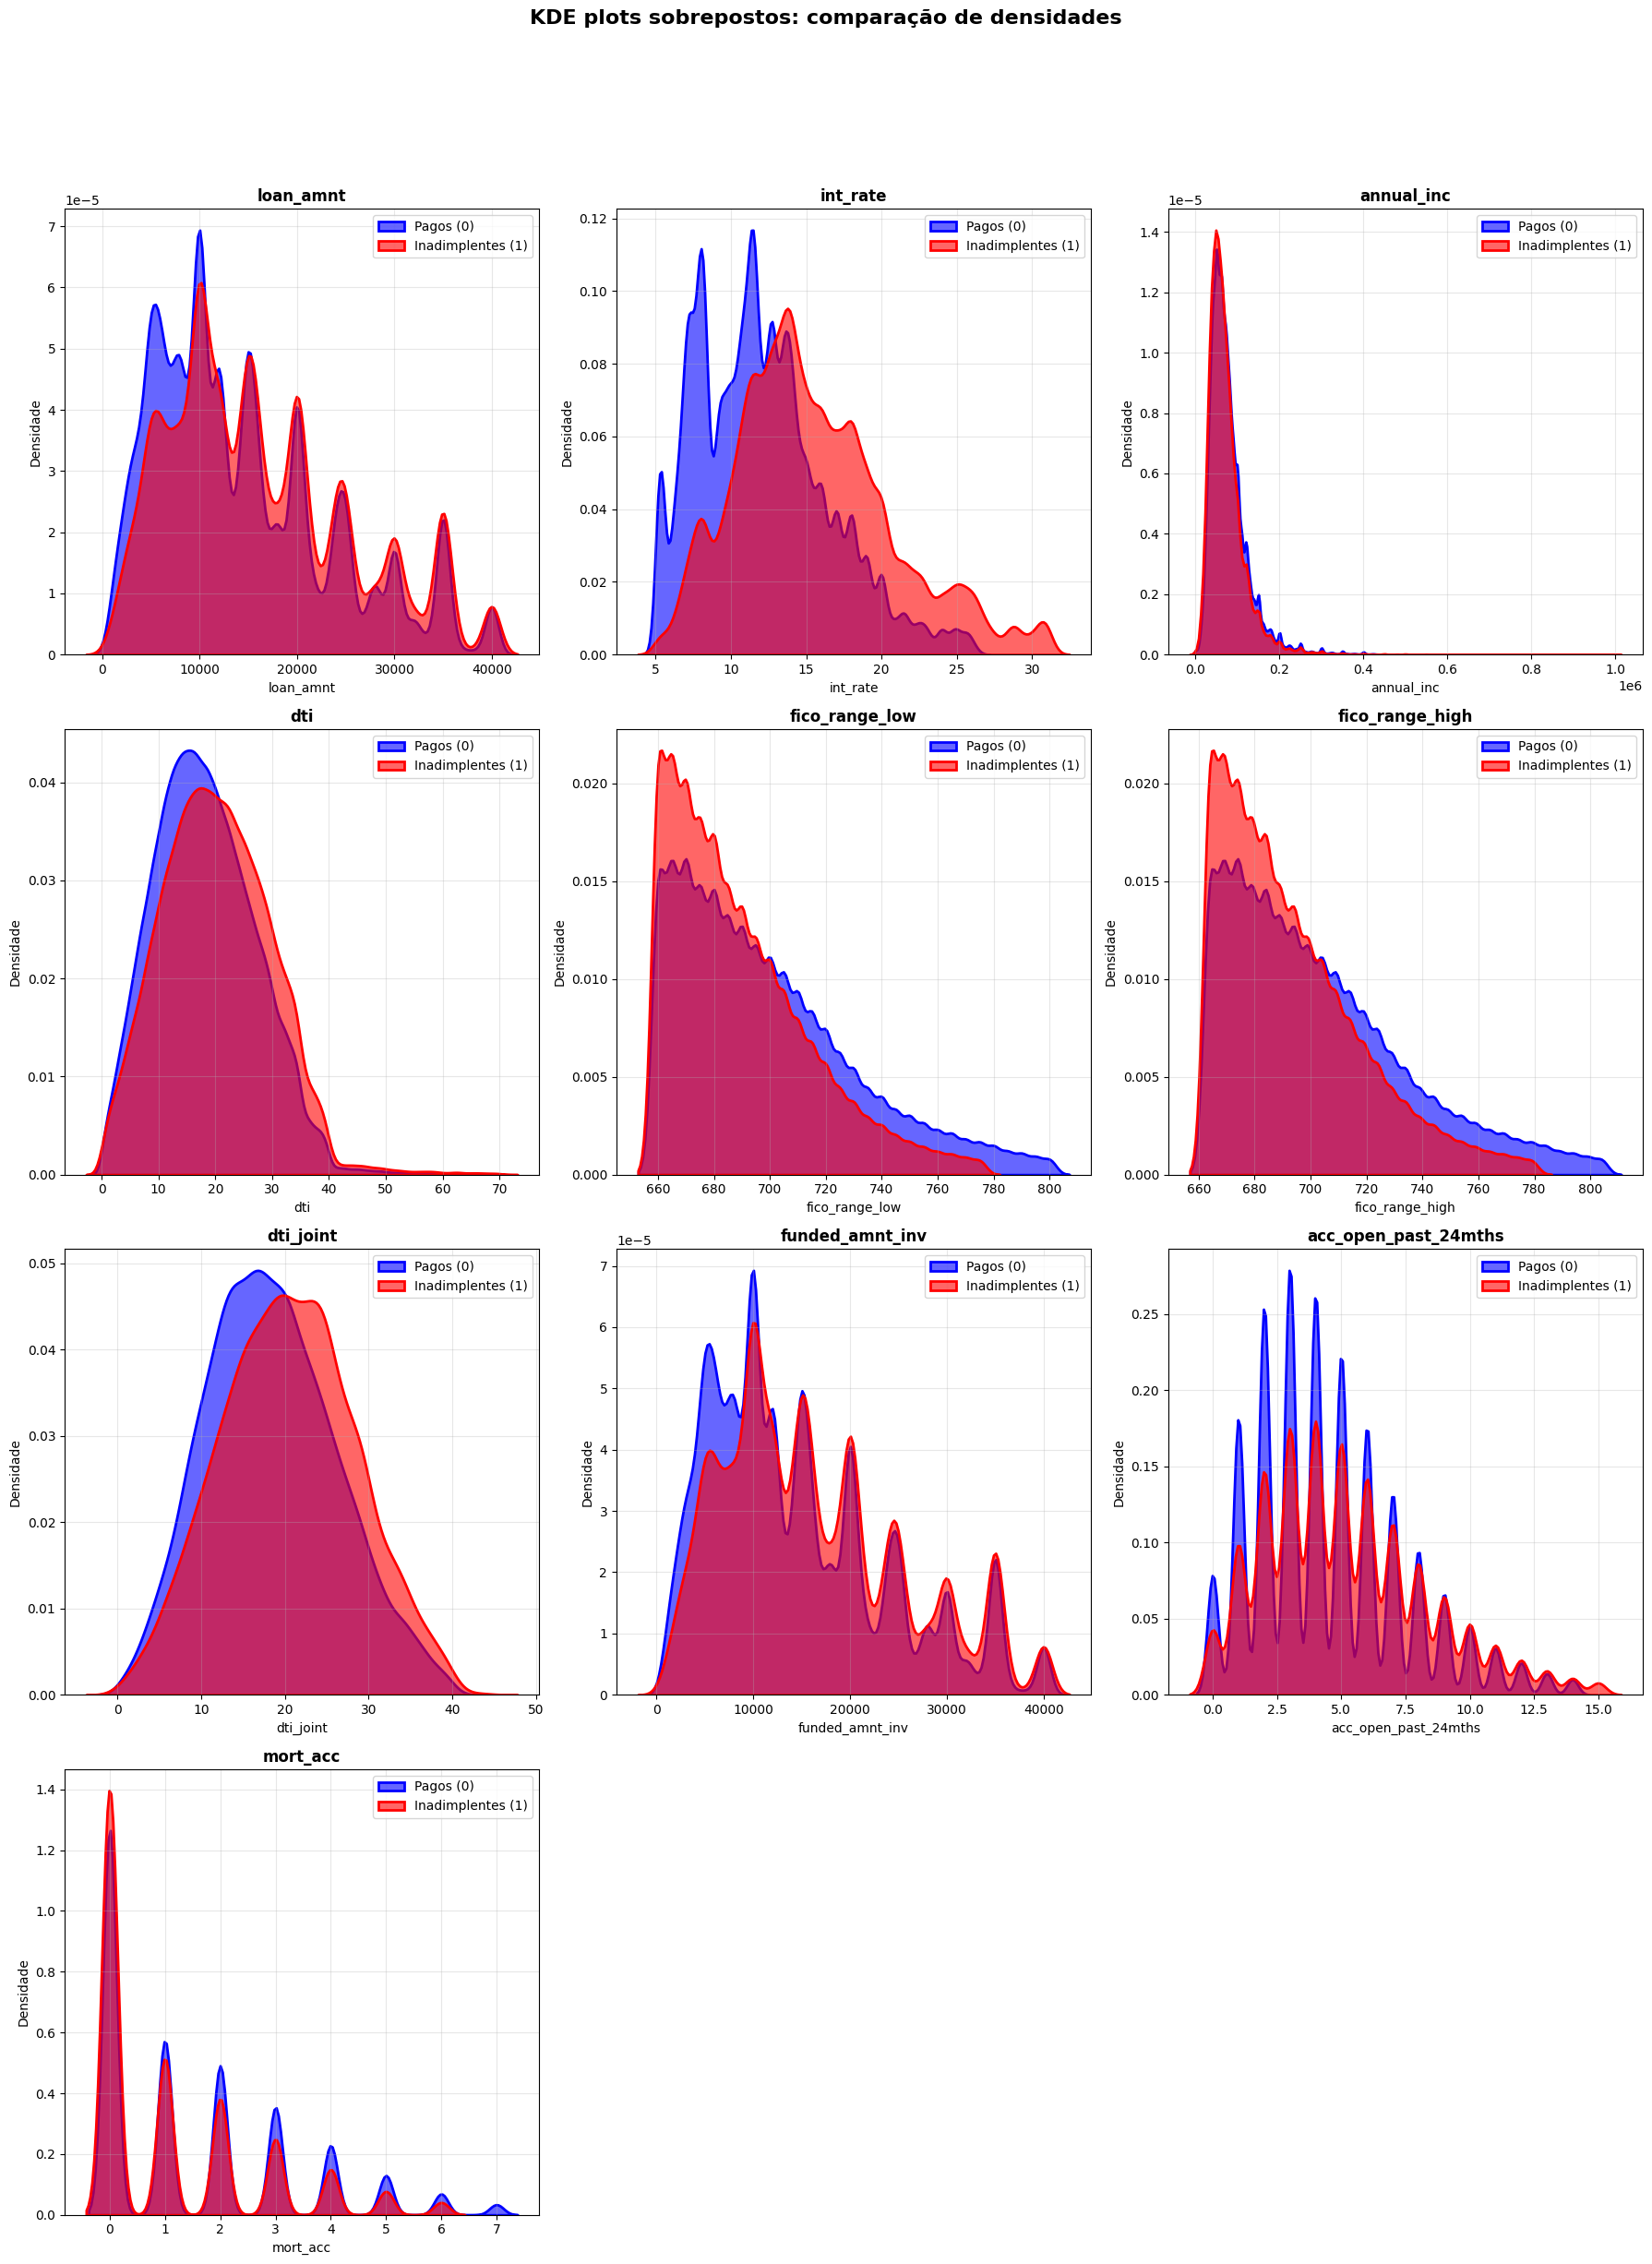


ESTATÍSTICAS COMPARATIVAS POR GRUPO
Variável        Med.Pagos    Med.Inadimp  Dif.%    p-value    Signif.  Effect Size 
----------------------------------------------------------------------------------------------------
loan_amnt       12000.00     15000.00     25.0     0.000e+00  Sim      0.125       
int_rate        11.49        14.65        27.5     0.000e+00  Sim      0.375       
annual_inc      67000.00     62000.00     -7.5     0.000e+00  Sim      -0.080      
dti             17.58        19.79        12.6     0.000e+00  Sim      0.120       
fico_range_low  690.00       685.00       -0.7     0.000e+00  Sim      -0.163      
fico_range_high 694.00       689.00       -0.7     0.000e+00  Sim      -0.163      
dti_joint       17.86        20.38        14.1     6.062e-105 Sim      0.157       
funded_amnt_inv 12000.00     15000.00     25.0     0.000e+00  Sim      0.124       
acc_open_past_24mths 4.00         5.00         25.0     0.000e+00  Sim      0.120       
mort_acc        1

In [10]:
# ==============================================================================
# 7. ANÁLISE COMPARATIVA: DISTRIBUIÇÕES POR GRUPO DE PAGAMENTO
# ==============================================================================

print("\n" + "="*60)
print("7. ANÁLISE COMPARATIVA DAS VARIÁVEIS NUMÉRICAS: DISTRIBUIÇÕES POR ADIMPLÊNCIA")
print("="*60)

print("Objetivo: Visualizar como a distribuição de cada variável numérica chave")
print("se comporta para os dois grupos: empréstimos pagos vs inadimplentes")

def analyze_distributions_by_target(df, variables):
    """
    Analisa como a distribuição de cada variável numérica se comporta
    para os dois grupos: empréstimos pagos (target_default = 0) e
    inadimplentes (target_default = 1).
    """

    # Separar os grupos
    paid_group = df[df['target_default'] == 0]
    default_group = df[df['target_default'] == 1]

    print(f"Tamanho dos grupos:")
    print(f"- Empréstimos pagos (target_default = 0): {len(paid_group):,}")
    print(f"- Empréstimos inadimplentes (target_default = 1): {len(default_group):,}")
    print(f"- Taxa de inadimplência: {len(default_group)/len(df)*100:.1f}%")

    # 1. BOX PLOTS AGRUPADOS
    n_vars = len(variables)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    if n_vars == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    fig.suptitle('Box Plots Agrupados: Distribuições por Status de Pagamento',
                 fontsize=16, fontweight='bold', y=1.02)

    for i, var in enumerate(variables):
        ax = axes[i]

        # Preparar dados para o box plot
        data_to_plot = [paid_group[var].dropna(), default_group[var].dropna()]
        labels = ['Pagos (0)', 'Inadimplentes (1)']

        bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True,
                       notch=True, widths=0.7)

        # Colorir as caixas
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)
        bp['boxes'][1].set_facecolor('lightcoral')
        bp['boxes'][1].set_alpha(0.7)

        # Calcular diferença nas medianas
        median_paid = paid_group[var].median()
        median_default = default_group[var].median()
        diff_pct = ((median_default - median_paid) / median_paid) * 100

        ax.set_title(f'{var}\nDif. Mediana: {diff_pct:+.1f}%',
                    fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_ylabel(var)

    # Ocultar eixos não utilizados
    for j in range(n_vars, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # 2. KDE PLOTS SOBREPOSTOS
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    if n_vars == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    fig.suptitle('KDE plots sobrepostos: comparação de densidades',
                 fontsize=16, fontweight='bold', y=1.02)

    for i, var in enumerate(variables):
        ax = axes[i]

        paid_clean = paid_group[var].dropna()
        default_clean = default_group[var].dropna()

        # Remover apenas outliers extremos para visualização (3 sigma)
        paid_clean = paid_clean[np.abs(stats.zscore(paid_clean)) < 3]
        default_clean = default_clean[np.abs(stats.zscore(default_clean)) < 3]

        # Plot KDE com preenchimento
        sns.kdeplot(data=paid_clean, ax=ax, label='Pagos (0)',
                   color='blue', alpha=0.6, linewidth=2, fill=True)
        sns.kdeplot(data=default_clean, ax=ax, label='Inadimplentes (1)',
                   color='red', alpha=0.6, linewidth=2, fill=True)

        ax.set_title(f'{var}', fontsize=12, fontweight='bold')
        ax.set_xlabel(var)
        ax.set_ylabel('Densidade')
        ax.legend()
        ax.grid(True, alpha=0.3)

    # Ocultar eixos não utilizados
    for j in range(n_vars, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # 4. TABELA DE ESTATÍSTICAS COMPARATIVAS
    print("\n" + "="*100)
    print("ESTATÍSTICAS COMPARATIVAS POR GRUPO")
    print("="*100)

    stats_comparison = []

    for var in variables:
        paid_data = paid_group[var].dropna()
        default_data = default_group[var].dropna()

        # Estatísticas descritivas
        paid_stats = {
            'mediana': paid_data.median(),
            'media': paid_data.mean(),
            'desvio_padrao': paid_data.std()
        }

        default_stats = {
            'mediana': default_data.median(),
            'media': default_data.mean(),
            'desvio_padrao': default_data.std()
        }

        # Teste Mann-Whitney U (não-paramétrico)
        try:
            statistic, p_value = stats.mannwhitneyu(paid_data, default_data,
                                                   alternative='two-sided')

            # Effect size (rank-biserial correlation)
            n1, n2 = len(paid_data), len(default_data)
            effect_size = 1 - (2 * statistic) / (n1 * n2)

        except Exception as e:
            p_value = np.nan
            effect_size = np.nan

        # Diferença percentual nas medianas
        mediana_diff_pct = ((default_stats['mediana'] - paid_stats['mediana']) /
                           paid_stats['mediana'] * 100)

        stats_comparison.append({
            'variavel': var,
            'mediana_pagos': paid_stats['mediana'],
            'mediana_inadimplentes': default_stats['mediana'],
            'diferenca_mediana_pct': mediana_diff_pct,
            'p_value_mannwhitney': p_value,
            'effect_size': effect_size,
            'significativo': 'Sim' if p_value < 0.05 else 'Não'
        })

    # Criar DataFrame com os resultados
    comparison_df = pd.DataFrame(stats_comparison)

    # Exibir tabela formatada
    print(f"{'Variável':<15} {'Med.Pagos':<12} {'Med.Inadimp':<12} {'Dif.%':<8} {'p-value':<10} {'Signif.':<8} {'Effect Size':<12}")
    print("-" * 100)

    for _, row in comparison_df.iterrows():
        print(f"{row['variavel']:<15} {row['mediana_pagos']:<12.2f} "
              f"{row['mediana_inadimplentes']:<12.2f} {row['diferenca_mediana_pct']:<8.1f} "
              f"{row['p_value_mannwhitney']:<10.3e} {row['significativo']:<8} "
              f"{row['effect_size']:<12.3f}")

    return comparison_df

# Executar a análise comparativa
key_numeric_for_comparison = [col for col in existing_key_numeric if col in df.columns and col != 'term']
print(f"Variáveis analisadas: {key_numeric_for_comparison}")

comparison_results = analyze_distributions_by_target(df, key_numeric_for_comparison)




### Análise de variáveis categóricas

Nesta seção, investigamos como as variáveis categóricas se relacionam com a inadimplência (`target_default`). A análise busca identificar quais categorias de tomadores apresentam maior ou menor risco, fornecendo insights valiosos para a segmentação de clientes e para a construção do modelo preditivo.

Para cada variável, analisamos duas métricas principais:

1. __Distribuição de empréstimos__: A contagem de operações em cada categoria, mostrando a relevância de cada grupo no portfólio.
2. __Taxa de inadimplência (default rate)__: A proporção de empréstimos inadimplentes dentro de cada categoria, indicando o risco associado.

Os gráficos mostram que **Grade** é o grande separador: a inadimplência salta de 7,5 % (A) a 49,8 % (F), variação de 6,6 × que valida o rating da Lending Club. O **prazo** reforça o sinal: contratos de 60 meses chegam a 34,2 % de default, quase o dobro dos 17,8 % em 36 meses, indicando que o tempo expõe o mutuário a mais choques de renda.

As demais variáveis apenas refinam a segmentação. **Verification\_Status** surpreende: perfis verificados concentram 26,7 % de default contra 18,0 % dos não verificados, sugerindo que a checagem é acionada em casos já arriscados. Em **Home Ownership**, quem financia imóvel (19,0 %) performa melhor que locatários (25,7 %), apontando maior estabilidade. Em **Purpose**, pequenos negócios lideram o risco (27,1 %), enquanto veículos exibem a menor taxa (15,9 %).

Dessa maneira, espera-se que a variável `grade` seja uma das mais importantes para a modelagem, com as demais variáveis categóricas servindo como refinamentos adicionais.

A análise complementar do sub_grade revelou progressão majoritariamente consistente de risco, com tendência média de 1,6% por nível. Embora a sequência seja robusta nos grades A-E, observam-se irregularidades específicas nos grades superiores: F3 apresenta risco menor que F2, e G1 mostra default rate anormalmente baixo (49,1%) comparado aos sub_grades F adjacentes.

Estas anomalias refletem tanto volumes amostrais decrescentes (F1: 3.348 vs G5: 437 empréstimos) quanto possível instabilidade estatística em categorias de alto risco com menor representatividade. Apesar das irregularidades pontuais, a diferença de 52,8 pontos percentuais entre extremos e a progressão geral validam que o sub_grade oferece granularidade superior ao grade simples, devendo ser prioritário na modelagem para a faixa A-E onde se concentra a maioria do portfólio.





8. ANÁLISE DE VARIÁVEIS CATEGÓRICAS
Variáveis categóricas identificadas para análise: 22
['grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'initial_list_status', 'next_pymnt_d', 'application_type', 'verification_status_joint', 'sec_app_earliest_cr_line', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'term']


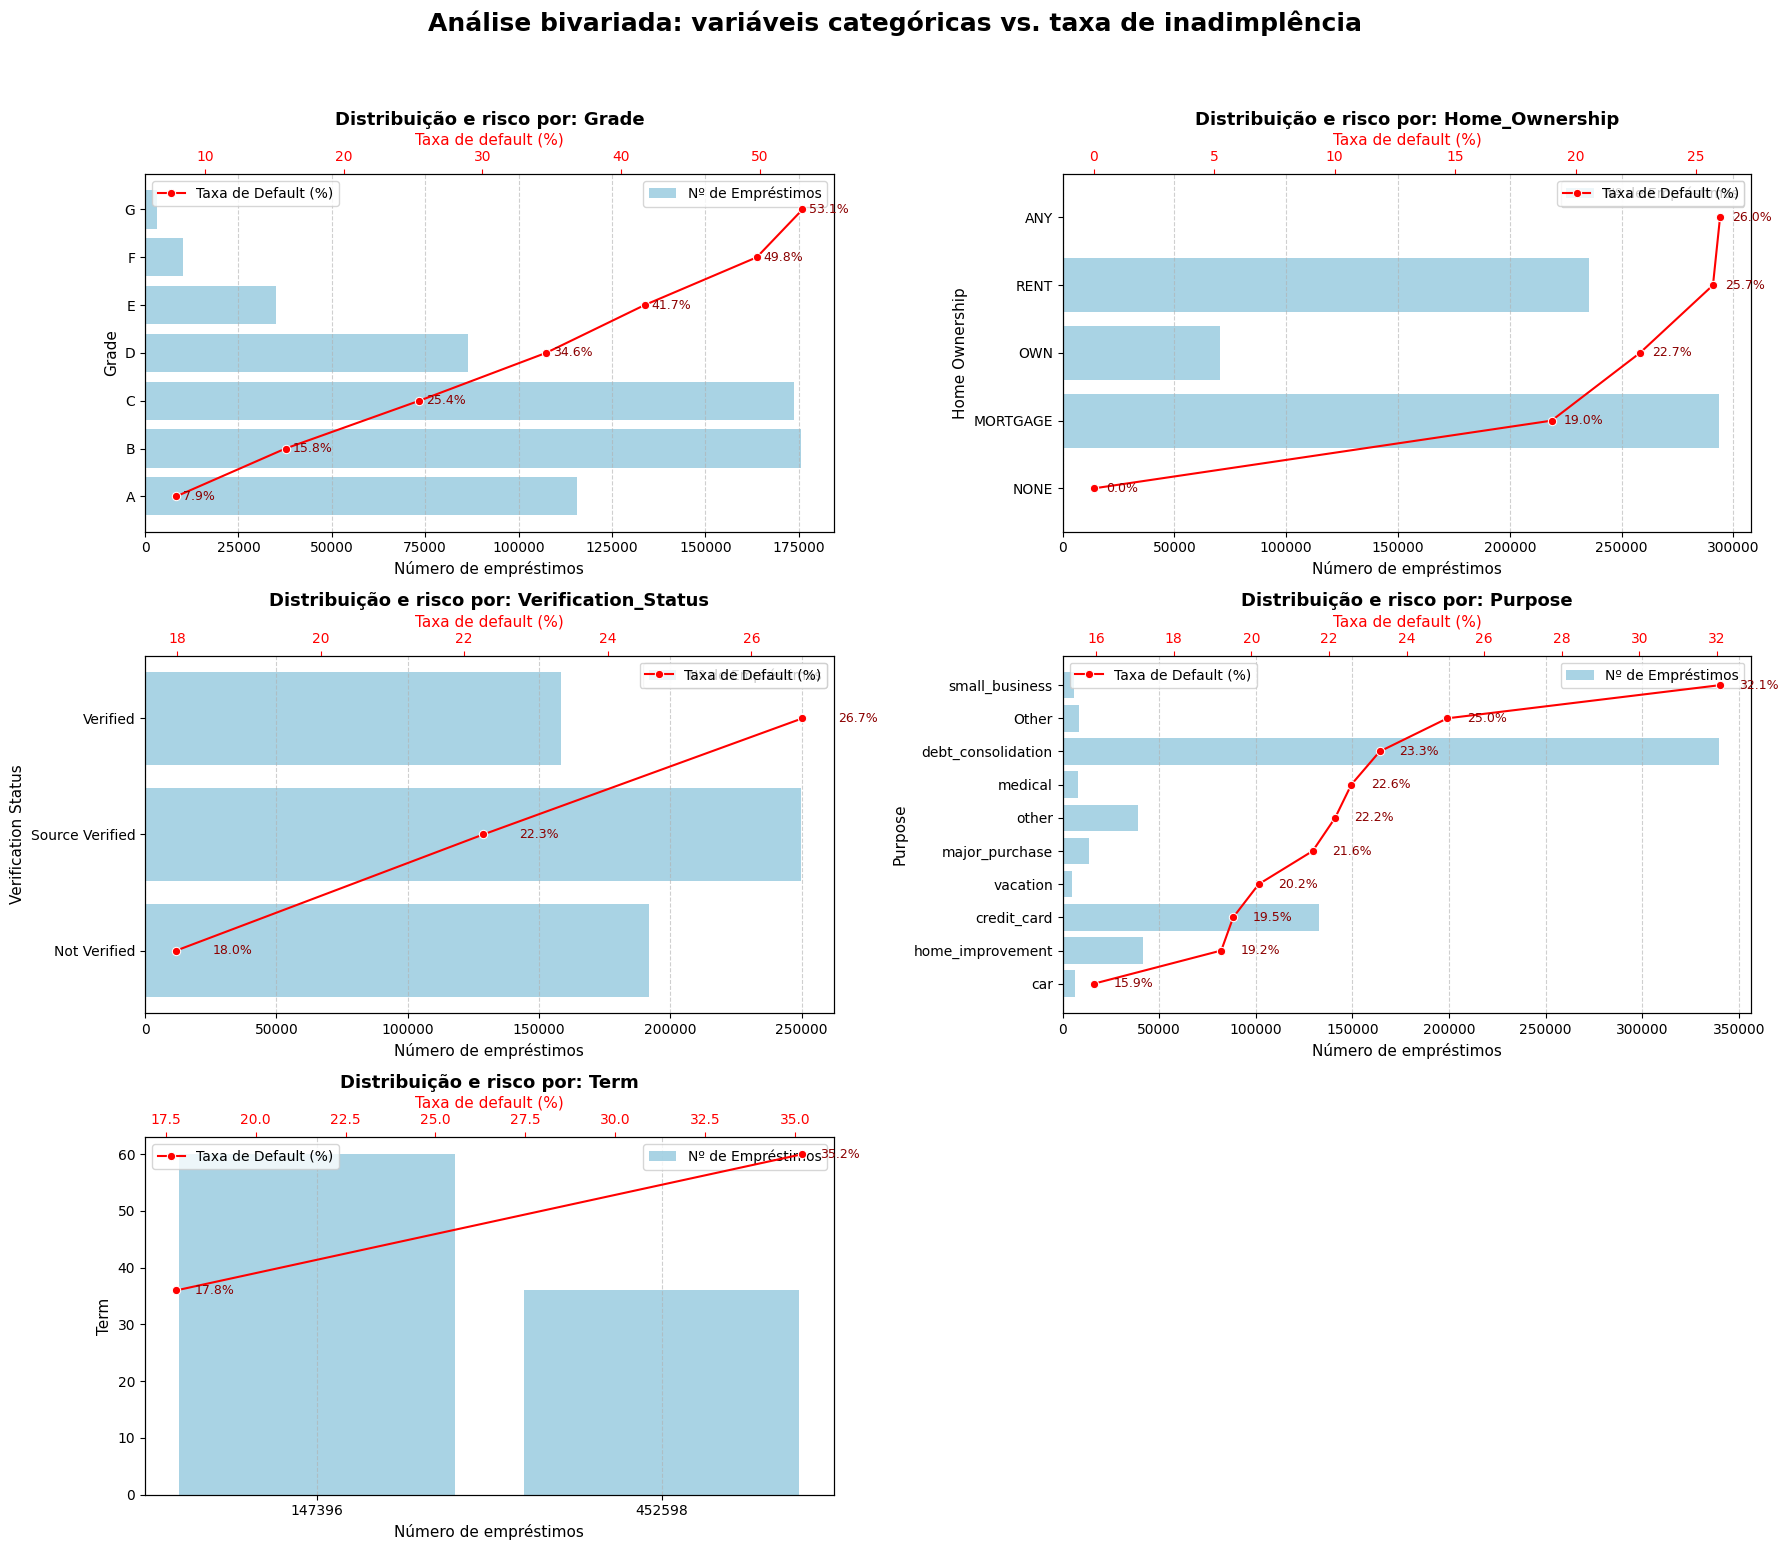

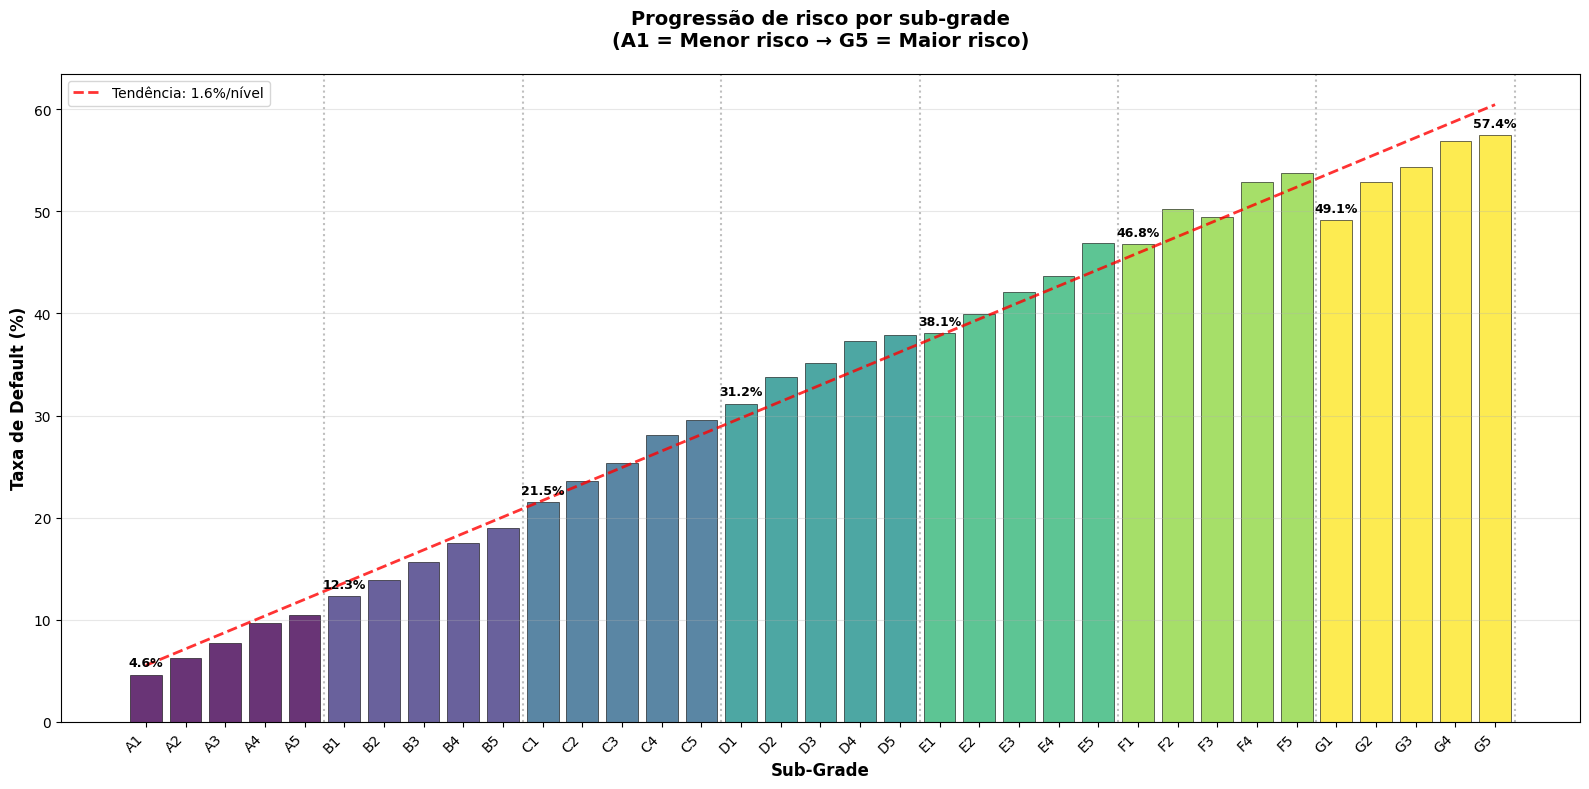


ESTATÍSTICAS DE PROGRESSÃO SUB-GRADE
Range total: 4.6% a 57.4%
Diferença A1 vs G5: 52.8 pontos percentuais
Tendência média: 1.6% de aumento por nível
Volumes nos grades F-G (onde ocorrem anomalias):
  sub_grade  count   mean
0        F1   3348 0.4677
1        F2   2256 0.5018
2        F3   1902 0.4947
3        F4   1473 0.5289
4        F5   1307 0.5371
5        G1   1063 0.4911
6        G2    708 0.5282
7        G3    547 0.5430
8        G4    482 0.5685
9        G5    437 0.5744


In [11]:
# ==============================================================================
# 8. ANÁLISE DE VARIÁVEIS CATEGÓRICAS
# ==============================================================================

print("\n" + "="*60)
print("8. ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
print("="*60)

# Identificar colunas categóricas (tipo 'object') e numéricas com baixa cardinalidade
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
low_cardinality_numeric = [col for col in df.select_dtypes(include=np.number).columns
                           if df[col].nunique() < 15 and col != 'target_default']

# A variável 'term' já foi tratada como numérica, mas para esta análise, a trataremos como categórica.
# Vamos adicioná-la à nossa lista se não estiver lá.
if 'term' not in categorical_cols:
    categorical_cols.append('term')

# Remover variáveis que não são úteis para esta análise específica (ex: datas como strings)
cols_to_exclude = ['issue_d', 'earliest_cr_line', 'sub_grade'] # sub_grade é muito granular para a visualização principal
analysis_cols = [col for col in categorical_cols if col not in cols_to_exclude]

print(f"Variáveis categóricas identificadas para análise: {len(analysis_cols)}")
print(analysis_cols)


def plot_categorical_analysis(df, col, ax):
    """
    Cria um gráfico combinado com a distribuição de empréstimos e a taxa de default por categoria.
    """
    # 1. Preparar os dados
    data = df.groupby(col)['target_default'].agg(['count', 'mean']).reset_index()
    data = data.rename(columns={'count': 'n_emprestimos', 'mean': 'taxa_default'})
    data['taxa_default'] *= 100
    data = data.sort_values('taxa_default', ascending=False)

    # 2. Gráfico de Barras (Distribuição)
    sns.barplot(x='n_emprestimos', y=col, data=data, ax=ax, color='skyblue', alpha=0.8, label='Nº de Empréstimos')
    ax.set_xlabel('Número de empréstimos', fontsize=11)
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=11)
    ax.tick_params(axis='y', labelsize=10)

    # 3. Gráfico de Linha (Taxa de Default)
    ax2 = ax.twiny()
    sns.lineplot(x='taxa_default', y=col, data=data, ax=ax2, color='red', marker='o', label='Taxa de Default (%)')
    ax2.set_xlabel('Taxa de default (%)', fontsize=11, color='red')
    ax2.tick_params(axis='x', colors='red', labelsize=10)
    ax2.grid(False) # Desativar grid do segundo eixo para não poluir

    # Adicionar valores da taxa de default no gráfico de linha
    for index, row in data.iterrows():
        ax2.text(row['taxa_default'] + 0.5, row[col], f"{row['taxa_default']:.1f}%",
                 color='darkred', ha="left", va="center", fontsize=9)

    ax.set_title(f'Distribuição e risco por: {col.title()}', fontsize=13, fontweight='bold')
    ax.grid(axis='x', linestyle='--', alpha=0.6)


# Definir as variáveis mais importantes para visualizar
key_categorical_vars = ['grade', 'home_ownership', 'verification_status', 'purpose', 'term']

# Criar a figura e os eixos para os plots
# Ajustar o número de linhas conforme a quantidade de variáveis
n_vars = len(key_categorical_vars)
n_cols = 2
n_rows = (n_vars + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, var in enumerate(key_categorical_vars):
    # A variável 'purpose' tem muitas categorias, vamos agrupar as menores
    if var == 'purpose' and df[var].nunique() > 10:
        top_categories = df[var].value_counts().nlargest(9).index
        df_plot = df.copy()
        df_plot[var] = df_plot[var].apply(lambda x: x if x in top_categories else 'Other')
        plot_categorical_analysis(df_plot, var, axes[i])
    else:
        plot_categorical_analysis(df, var, axes[i])

# Ocultar eixos não utilizados
for j in range(n_vars, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Análise bivariada: variáveis categóricas vs. taxa de inadimplência', fontsize=18, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

def analyze_subgrade_progression(df):
    """
    Análise visual da progressão de risco através de todos os sub_grades
    em um único gráfico limpo e informativo
    """

    # Preparar dados
    sub_analysis = df.groupby('sub_grade')['target_default'].agg(['count', 'mean']).reset_index()
    sub_analysis['taxa_default'] = sub_analysis['mean'] * 100

    # Ordenar sub_grades corretamente (A1, A2, ..., G5)
    grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    sub_analysis['grade'] = sub_analysis['sub_grade'].str[0]
    sub_analysis['sub_num'] = sub_analysis['sub_grade'].str[1].astype(int)
    sub_analysis['order'] = sub_analysis['grade'].map({g: i for i, g in enumerate(grade_order)}) * 5 + sub_analysis['sub_num']
    sub_analysis = sub_analysis.sort_values('order')

    # Criar gráfico
    fig, ax = plt.subplots(figsize=(16, 8))

    # Cores diferentes para cada grade
    colors = plt.cm.viridis(np.linspace(0, 1, 7))
    bar_colors = [colors[grade_order.index(row['grade'])] for _, row in sub_analysis.iterrows()]

    bars = ax.bar(range(len(sub_analysis)), sub_analysis['taxa_default'],
                  color=bar_colors, alpha=0.8, edgecolor='black', linewidth=0.5)

    # Customizar eixos
    ax.set_xticks(range(len(sub_analysis)))
    ax.set_xticklabels(sub_analysis['sub_grade'], rotation=45, ha='right')
    ax.set_ylabel('Taxa de Default (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Sub-Grade', fontsize=12, fontweight='bold')
    ax.set_title('Progressão de risco por sub-grade\n(A1 = Menor risco → G5 = Maior risco)',
                fontsize=14, fontweight='bold', pad=20)

    # Adicionar linha de tendência
    x_vals = range(len(sub_analysis))
    z = np.polyfit(x_vals, sub_analysis['taxa_default'], 1)
    p = np.poly1d(z)
    ax.plot(x_vals, p(x_vals), "r--", alpha=0.8, linewidth=2, label=f'Tendência: {z[0]:.1f}%/nível')

    # Adicionar valores nas barras (só para alguns pontos para não poluir)
    for i, (bar, row) in enumerate(zip(bars, sub_analysis.itertuples())):
        if i % 5 == 0 or i == len(bars) - 1:  # Mostrar só no primeiro de cada grade + último
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Separadores visuais entre grades
    for i in range(4, len(sub_analysis), 5):
        ax.axvline(x=i+0.5, color='gray', linestyle=':', alpha=0.5)

    # Adicionar legend e grid
    ax.legend(loc='upper left')
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Estatísticas resumo
    print("\n" + "="*60)
    print("ESTATÍSTICAS DE PROGRESSÃO SUB-GRADE")
    print("="*60)
    print(f"Range total: {sub_analysis['taxa_default'].min():.1f}% a {sub_analysis['taxa_default'].max():.1f}%")
    print(f"Diferença A1 vs G5: {sub_analysis['taxa_default'].iloc[-1] - sub_analysis['taxa_default'].iloc[0]:.1f} pontos percentuais")
    print(f"Tendência média: {z[0]:.1f}% de aumento por nível")

    return sub_analysis

# Executar análise
analyze_subgrade_progression(df)

# Focar nos grades problemáticos
fg_analysis = df[df['grade'].isin(['F', 'G'])].groupby('sub_grade')['target_default'].agg(['count', 'mean']).reset_index()
print("Volumes nos grades F-G (onde ocorrem anomalias):")
print(fg_analysis)



### Análise temporal por data de emissão

A análise temporal, levando em consideração o ano de emissão, revela uma distinção fundamental entre a eficácia da ordenação de risco e a estabilidade das taxas absolutas de default. O sistema de rating da Lending Club demonstra excelente capacidade de **ordenação relativa** do risco, mantendo consistentemente a hierarquia A < B < C < D < E < F < G em todos os anos analisados. Esta ordenação nunca se inverte, confirmando que o algoritmo de rating captura adequadamente os fatores intrínsecos de risco dos mutuários.

Contudo, as **taxas absolutas de default** evidenciam dependência de condições externas ao perfil individual dos tomadores. A Grade A, por exemplo, oscila entre 5,5% e 17,1% no período, uma variação de mais de 200% que não pode ser atribuída apenas às características dos mutuários classificados nesta categoria.

O período 2018-2019 exemplifica esta instabilidade, quando todas as grades simultaneamente deterioraram, seguido pela melhoria paradoxal de 2020 durante a pandemia, que pode ser atribuída a estímulos governamentais ou a critérios de seleção mais rigorosos. Estes movimentos síncronos indicam que fatores macroeconômicos, mudanças regulatórias, políticas monetárias e condições de mercado exercem importante influência sobre as taxas de inadimplência, independentemente da qualidade creditícia individual.

A análise da composição do portfólio entre 2015 e 2020 revela uma clara e deliberada mudança estratégica da Lending Club em direção a um perfil de menor risco. A mudança mais expressiva ocorreu na distribuição por grade, onde a participação de empréstimos de maior risco (grades D e E) diminuiu, enquanto a concentração nos grades mais seguros (A e B) aumentou significativamente. Em 2015, os grades A e B somavam cerca de 35% do portfólio; em 2020, essa fatia já ultrapassava 55%. Também é possível observar o aumento da mediana do FICO score, refletindo uma elevação na qualidade de crédito dos tomadores.




9. ANÁLISE TEMPORAL POR DATA DE EMISSÃO
Objetivo: Analisar como o risco de default por grade evoluiu no período 2015-2020
Dados preparados: 37 observações ano-grade
Período: 2015 - 2020
Matriz de dados temporais criada:
ano      2015    2016    2017    2018    2019    2020
grade                                                
A      5.5000  6.0000  7.4000 11.4000 14.5000 17.1000
B     12.8000 13.3000 16.1000 23.0000 24.9000 25.0000
C     21.9000 22.5000 26.4000 33.7000 35.5000 27.3000
D     31.0000 31.7000 34.8000 41.9000 41.7000 29.8000
E     39.9000 41.8000 41.5000 47.4000 40.9000     NaN
F     48.9000 50.9000 48.8000 51.9000     NaN     NaN
G     50.2000 55.9000 52.0000 60.6000     NaN     NaN


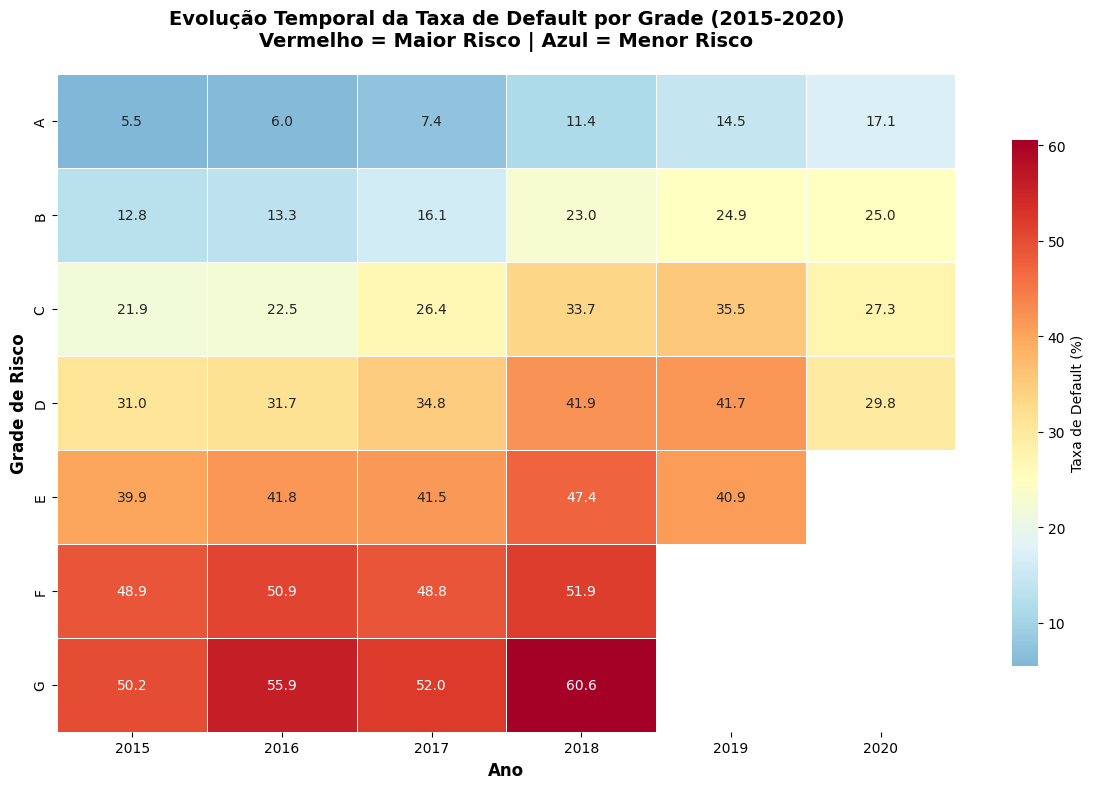


9.3 EVOLUÇÃO DAS CARACTERÍSTICAS DOS EMPRÉSTIMOS


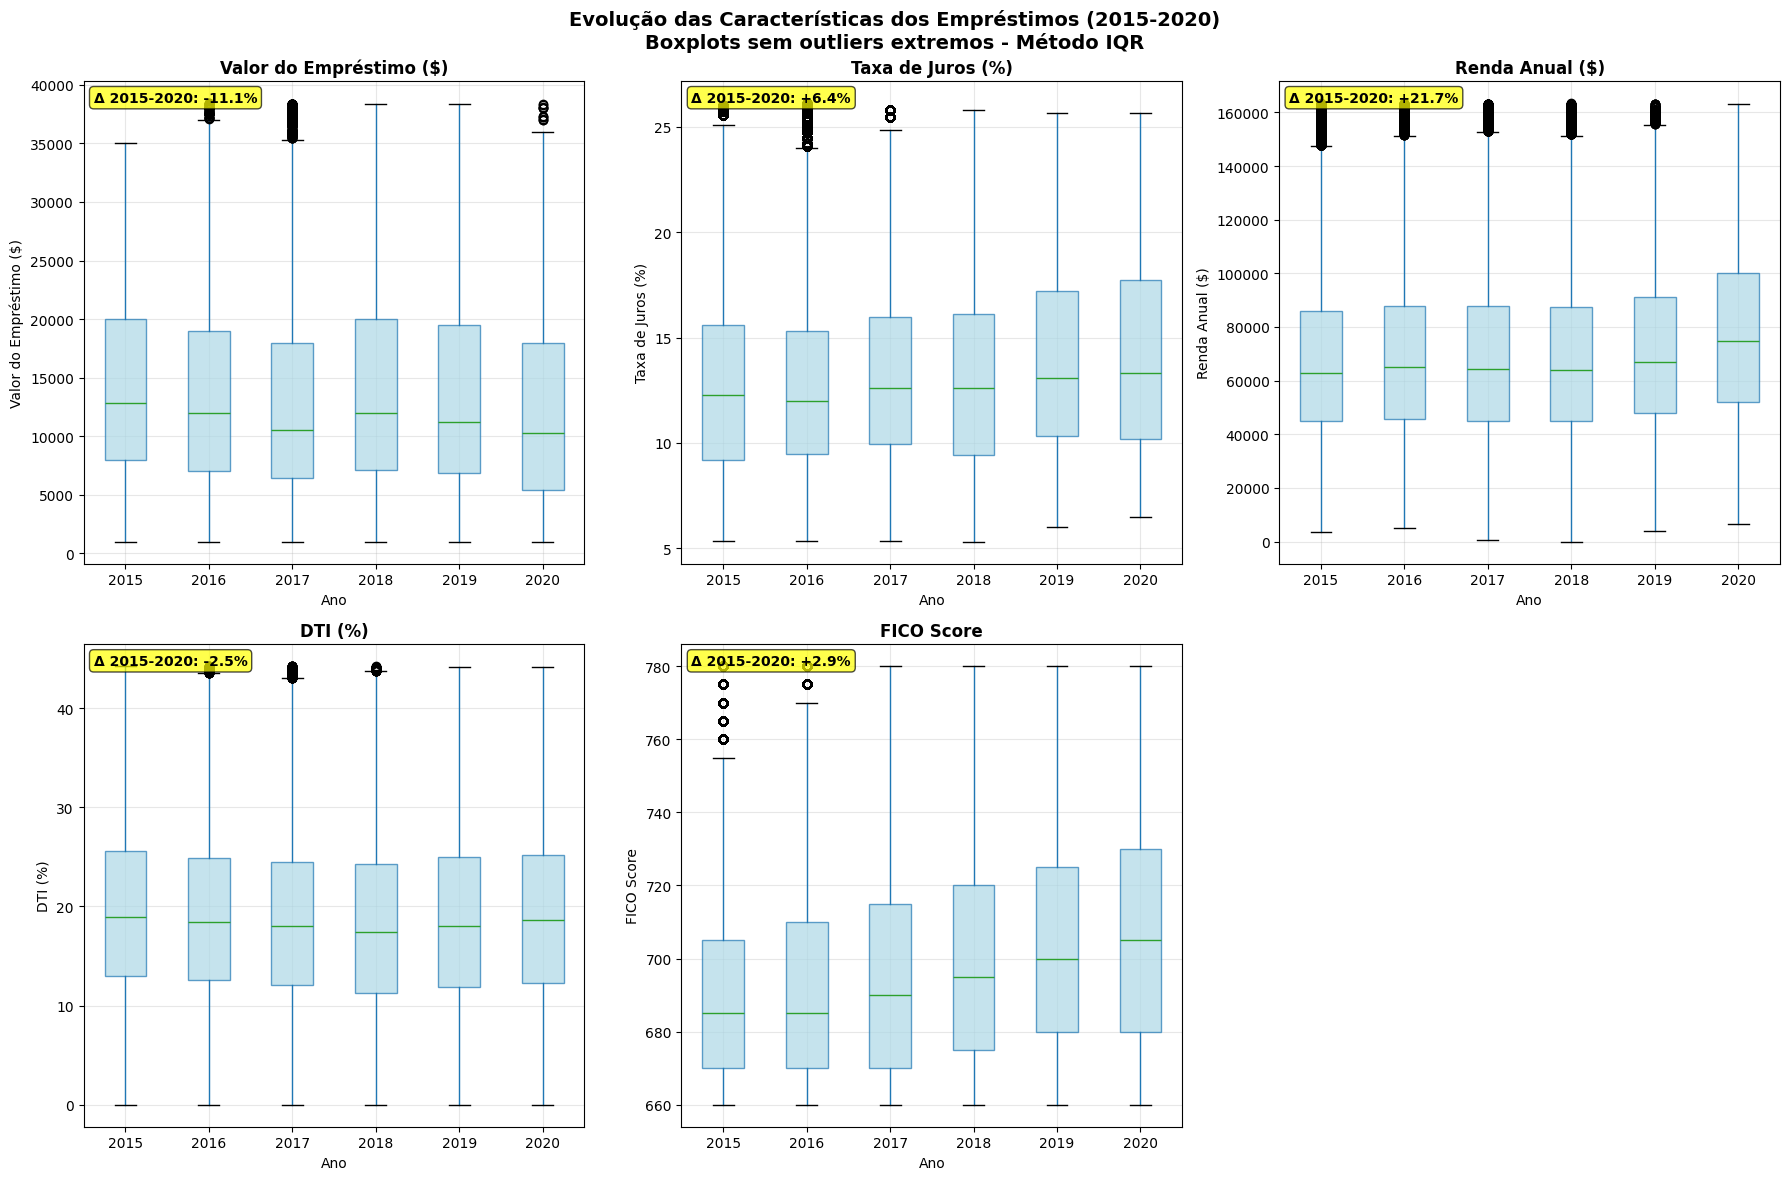


9.4 MUDANÇAS NA COMPOSIÇÃO DO PORTFÓLIO


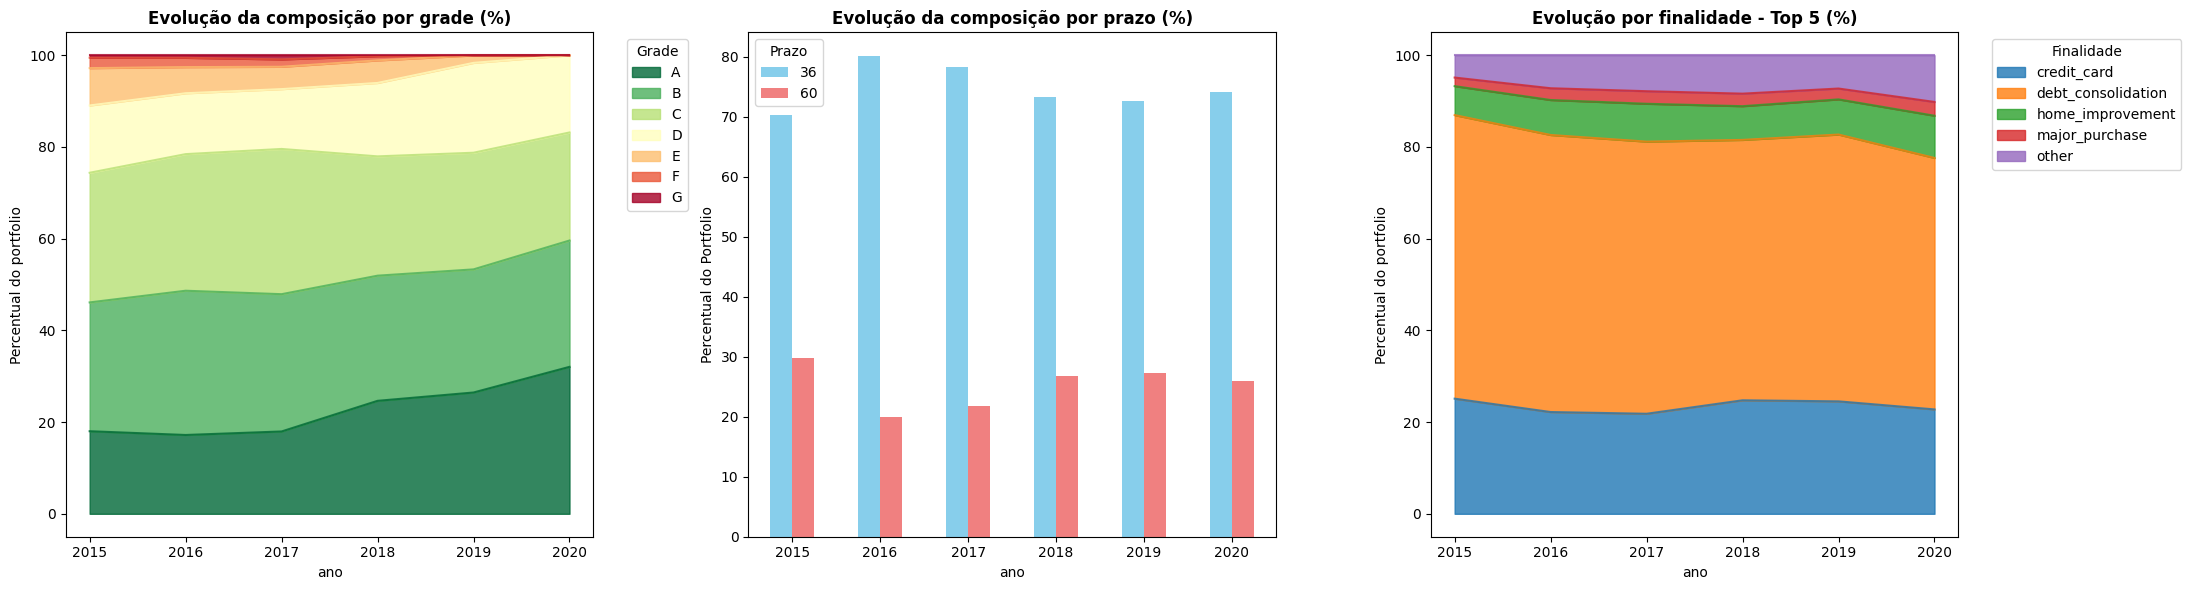

In [12]:
# ==============================================================================
# 9. ANÁLISE TEMPORAL POR DATA DE EMISSÃO
# ==============================================================================

print("\n" + "="*60)
print("9. ANÁLISE TEMPORAL POR DATA DE EMISSÃO")
print("="*60)

# Extrair ano da data de emissão
df['ano'] = pd.to_datetime(df['issue_d']).dt.year

print("Objetivo: Analisar como o risco de default por grade evoluiu no período 2015-2020")

# ==============================================================================
# 9.1 PREPARAÇÃO DOS DADOS TEMPORAIS
# ==============================================================================

# Calcular taxa de default por ano e grade
temporal_analysis = df.groupby(['ano', 'grade'])['target_default'].agg(['count', 'mean']).reset_index()
temporal_analysis['taxa_default'] = temporal_analysis['mean'] * 100

# Filtrar apenas grades com volume mínimo para evitar ruído estatístico
min_volume = 100
temporal_analysis = temporal_analysis[temporal_analysis['count'] >= min_volume]

print(f"Dados preparados: {len(temporal_analysis)} observações ano-grade")
print(f"Período: {temporal_analysis['ano'].min()} - {temporal_analysis['ano'].max()}")

# Criar pivot table para o heatmap
heatmap_data = temporal_analysis.pivot(index='grade', columns='ano', values='taxa_default')

# Garantir ordem correta das grades (A = menor risco → G = maior risco)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
heatmap_data = heatmap_data.reindex([g for g in grade_order if g in heatmap_data.index])

print("Matriz de dados temporais criada:")
print(heatmap_data.round(1))

# ==============================================================================
# 9.2 VISUALIZAÇÃO: HEATMAP TEMPORAL
# ==============================================================================

plt.figure(figsize=(12, 8))

# Criar heatmap com anotações
sns.heatmap(heatmap_data,
            annot=True,
            fmt='.1f',
            cmap='RdYlBu_r',  # Vermelho = alto risco, Azul = baixo risco
            center=25,  # Centro da escala em 25%
            linewidths=0.5,
            cbar_kws={'label': 'Taxa de Default (%)', 'shrink': 0.8})

plt.title('Evolução Temporal da Taxa de Default por Grade (2015-2020)\n' +
          'Vermelho = Maior Risco | Azul = Menor Risco',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Grade de Risco', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ==============================================================================
# 9.3 EVOLUÇÃO DAS CARACTERÍSTICAS DOS EMPRÉSTIMOS AO LONGO DO TEMPO
# ==============================================================================

print("\n" + "="*60)
print("9.3 EVOLUÇÃO DAS CARACTERÍSTICAS DOS EMPRÉSTIMOS")
print("="*60)

def remove_outliers_iqr(series):
    """Remove outliers usando método IQR"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

def analyze_loan_characteristics_evolution(df):
    """Analisa evolução temporal das características usando boxplots"""

    # Preparar dados temporais
    df['ano'] = pd.to_datetime(df['issue_d']).dt.year

    # Criar uma cópia do dataframe para trabalhar com dados limpos
    df_clean = df.copy()

    # Características chave para análise
    characteristics = {
        'loan_amnt': 'Valor do Empréstimo ($)',
        'int_rate': 'Taxa de Juros (%)',
        'annual_inc': 'Renda Anual ($)',
        'dti': 'DTI (%)',
        'fico_range_low': 'FICO Score'
    }

    # Remover outliers de cada variável usando IQR
    for var in characteristics.keys():
        if var in df_clean.columns:
            original_data = df_clean[var].dropna()
            clean_data = remove_outliers_iqr(original_data)
            # Manter apenas os índices dos dados limpos
            valid_indices = clean_data.index
            df_clean = df_clean.loc[df_clean.index.isin(valid_indices)]

    # Calcular estatísticas de mudança 2015 vs 2020
    change_stats = []
    for var in characteristics.keys():
        data_2015 = df[df['ano'] == 2015][var].median()
        data_2020 = df[df['ano'] == 2020][var].median()
        pct_change = ((data_2020 - data_2015) / data_2015) * 100
        change_stats.append({
            'variavel': var,
            'mediana_2015': data_2015,
            'mediana_2020': data_2020,
            'mudanca_pct': pct_change
        })

    # Visualização com boxplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, (var, title) in enumerate(characteristics.items()):
        ax = axes[i]

        # Boxplot usando dados limpos
        df_clean.boxplot(column=var, by='ano', ax=ax, patch_artist=True)

        # Customizar aparência
        ax.set_title(f'{title}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Ano')
        ax.set_ylabel(title)
        ax.grid(True, alpha=0.3)

        # Adicionar estatística de mudança
        change_info = next(item for item in change_stats if item['variavel'] == var)
        ax.text(0.02, 0.98, f"Δ 2015-2020: {change_info['mudanca_pct']:+.1f}%",
                transform=ax.transAxes, fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                verticalalignment='top')

        # Colorir boxes
        for patch in ax.findobj(plt.matplotlib.patches.PathPatch):
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)

    # Remover subplot extra
    axes[5].set_visible(False)

    plt.suptitle('Evolução das Características dos Empréstimos (2015-2020)\nBoxplots sem outliers extremos - Método IQR',
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def analyze_portfolio_composition_changes(df):
    """Analisa mudanças na composição do portfólio ao longo do tempo"""

    print("\n" + "="*60)
    print("9.4 MUDANÇAS NA COMPOSIÇÃO DO PORTFÓLIO")
    print("="*60)

    # 1. Evolução da distribuição por Grade
    grade_evolution = df.groupby(['ano', 'grade']).size().unstack(fill_value=0)
    grade_evolution_pct = grade_evolution.div(grade_evolution.sum(axis=1), axis=0) * 100

    # 2. Evolução da distribuição por Prazo
    term_evolution = df.groupby(['ano', 'term']).size().unstack(fill_value=0)
    term_evolution_pct = term_evolution.div(term_evolution.sum(axis=1), axis=0) * 100

    # 3. Evolução da distribuição por Finalidade (top 5)
    top_purposes = df['purpose'].value_counts().head(5).index
    df_purpose = df[df['purpose'].isin(top_purposes)]
    purpose_evolution = df_purpose.groupby(['ano', 'purpose']).size().unstack(fill_value=0)
    purpose_evolution_pct = purpose_evolution.div(purpose_evolution.sum(axis=1), axis=0) * 100

    # Visualização da evolução da composição
    fig, axes = plt.subplots(1, 3, figsize=(22, 6))

    # Grade evolution
    grade_evolution_pct.plot(kind='area', stacked=True, ax=axes[0],
                            colormap='RdYlGn_r', alpha=0.8)
    axes[0].set_title('Evolução da composição por grade (%)', fontweight='bold')
    axes[0].set_ylabel('Percentual do portfolio')
    axes[0].legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Term evolution
    term_evolution_pct.plot(kind='bar', ax=axes[1], color=['skyblue', 'lightcoral'])
    axes[1].set_title('Evolução da composição por prazo (%)', fontweight='bold')
    axes[1].set_ylabel('Percentual do Portfolio')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    axes[1].legend(title='Prazo')

    # Purpose evolution
    purpose_evolution_pct.plot(kind='area', stacked=True, ax=axes[2], alpha=0.8)
    axes[2].set_title('Evolução por finalidade - Top 5 (%)', fontweight='bold')
    axes[2].set_ylabel('Percentual do portfolio')
    axes[2].legend(title='Finalidade', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


# Executar análises
change_results = analyze_loan_characteristics_evolution(df)
analyze_portfolio_composition_changes(df)



### Análise de correlação entre variáveis explicativas

A análise de correlação complementa as análises bivariadas realizadas anteriormente, revelando como as variáveis preditoras se relacionam entre si. Esta investigação é utilizada para identificar **multicolinearidade**, que não necessariamente é um problema para alguns modelos de machine learning como árvores de decisão, mas pode afetar modelos lineares e de regressão logística.

Para incluir variáveis categóricas ordinais como `grade` nesta análise, utilizamos mapeamento numérico que preserva a ordem natural de risco (A=0, B=1, ..., G=6), permitindo calcular correlações de Pearson significativas.

Com base na matriz de correlação obtida, a análise revela padrões críticos para a modelagem preditiva. A multicolinearidade mais severa ocorre entre int_rate e grade_numeric (r=0.950), confirmando que a Lending Club define taxas diretamente baseadas no rating de risco. As variáveis fico_range_low e fico_range_high apresentam correlação perfeita (r=1.000), sendo redundantes.

As correlações moderadas validam a lógica de precificação: grades piores correlacionam negativamente com FICO scores (r=-0.399) e positivamente com taxas de juros. As variáveis annual_inc e dti mostram baixa correlação entre si e com outras variáveis, agregando informação única.

Para modelagem, recomenda-se então: manter apenas uma das variáveis redundantes (int_rate OU grade_numeric, fico_range_low OU fico_range_high), preservar annual_inc e dti por sua independência, e considerar loan_amnt que apresenta correlações fracas mas relevantes.



10. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS EXPLICATIVAS
Variáveis disponíveis para análise: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'target_default', 'acc_open_past_24mths', 'mort_acc']
Grade convertido para escala numérica: A=0, B=1, ..., G=6

MATRIZ DE CORRELAÇÃO DE PEARSON:


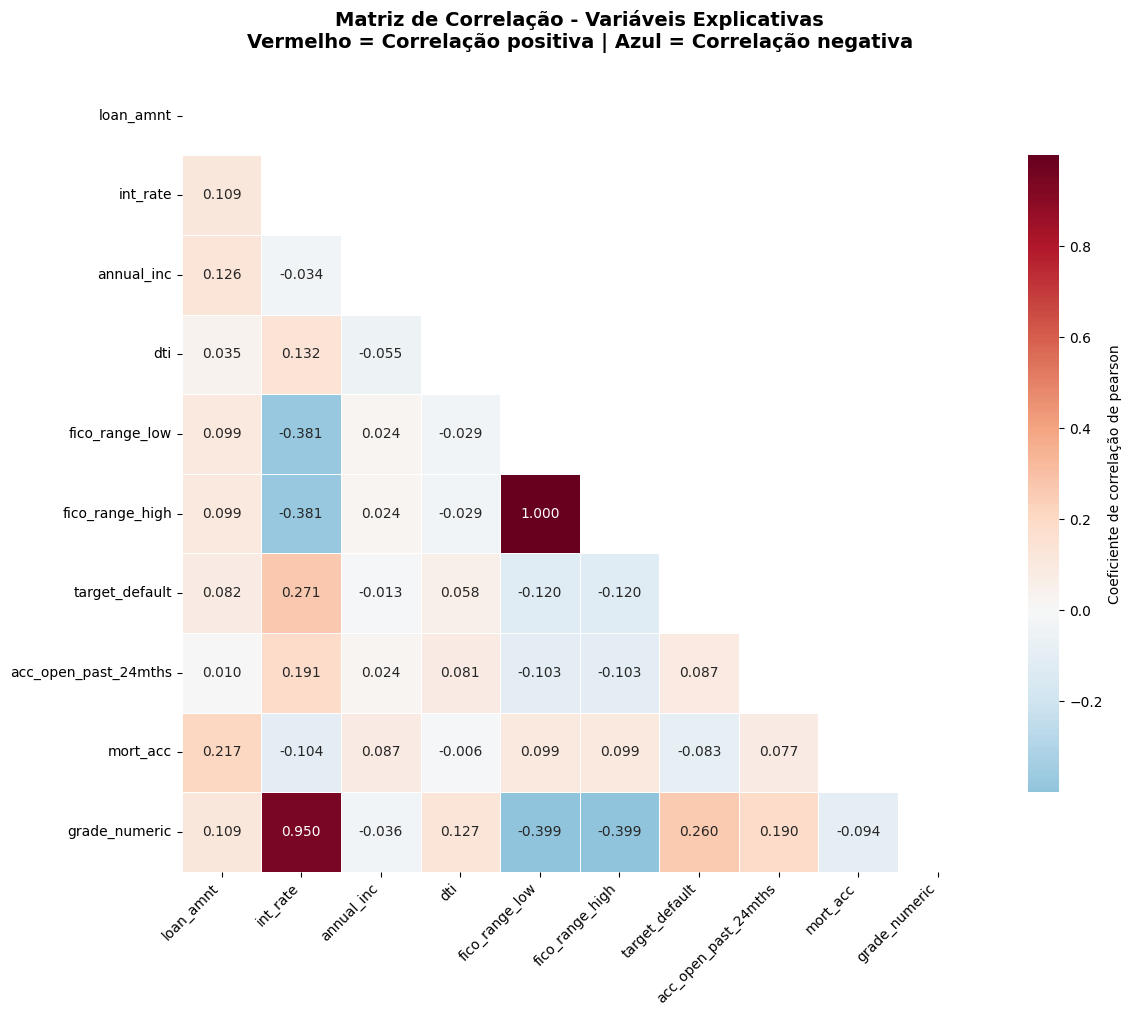

In [13]:
# ==============================================================================
# 10. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS EXPLICATIVAS
# ==============================================================================

print("\n" + "="*60)
print("10. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS EXPLICATIVAS")
print("="*60)

def analyze_variable_correlations(df):
    """Analisa correlações entre variáveis explicativas"""

    # Selecionar variáveis numéricas chave e variável alvo
    correlation_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti',
                       'fico_range_low', 'fico_range_high', 'target_default',
                       'acc_open_past_24mths', 'mort_acc']

    # Verificar se todas as variáveis existem no dataset
    available_vars = [var for var in correlation_vars if var in df.columns]
    print(f"Variáveis disponíveis para análise: {available_vars}")

    # Criar dataframe para correlação
    df_corr = df[available_vars].copy()

    # Adicionar grade como variável numérica ordinal
    if 'grade' in df.columns:
        grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
        df_corr['grade_numeric'] = df['grade'].map(grade_mapping)
        print("Grade convertido para escala numérica: A=0, B=1, ..., G=6")

    # Calcular matriz de correlação
    correlation_matrix = df_corr.corr()

    print("\nMATRIZ DE CORRELAÇÃO DE PEARSON:")
    print("="*50)

    # ==============================================================================
    # 10.1 VISUALIZAÇÃO: HEATMAP DE CORRELAÇÃO
    # ==============================================================================

    # Criar máscara para triângulo superior (evitar redundância)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Configurar visualização
    plt.figure(figsize=(12, 10))

    # Criar heatmap
    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                fmt='.3f',
                cmap='RdBu_r',  # Vermelho = correlação positiva, Azul = negativa
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={'label': 'Coeficiente de correlação de pearson', 'shrink': 0.8})

    plt.title('Matriz de Correlação - Variáveis Explicativas\n' +
              'Vermelho = Correlação positiva | Azul = Correlação negativa',
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

    return correlation_matrix

# Executar análise de correlação
correlation_results = analyze_variable_correlations(df)

### Análise geoespacial da inadimplência por estado

O mapa de inadimplência abaixo deixa claro que o risco não se distribui de forma homogênea entre os estados; surgem manchas coerentes no Sul profundo, porções do Centro-Sul e no litoral Sudeste, enquanto o Upper Midwest, a Nova Inglaterra e parte das Montanhas Rochosas exibem taxas notavelmente menores. Para descobrir se o perfil de crédito dos tomadores explica esses contrastes, correlacionamos a taxa de default estadual com a parcela de empréstimos concedidos a pessoas com FICO abaixo de 670. A regressão simples confirma uma relação positiva, mas só modesta: a inclinação aponta acréscimo médio de cerca de um ponto de inadimplência para cada ponto percentual adicional de tomadores “subprime”, porém o coeficiente de determinação mostra que boa parte da variância não pode ser explicada pelo FICO score.

Uma possível explicação para os resíduos: observa-se que Arkansas, Mississippi e Louisiana aparecem bem acima da curva esperada porque, além de perfis de crédito fracos, sofreram choque simultâneo: o colapso do preço do petróleo entre 2014 e 2016 cortou empregos e salários, e esses estados permitem juros altíssimos em crédito emergencial, o que cria espiral de dívida. Vermont, Distrito de Columbia e Oregon, por sua vez, caem abaixo da linha de tendência; nesses lugares, tetos rigorosos para juros, renda média mais alta e menor exposição a setores voláteis protegem contra o default, mesmo com fração relevante de tomadores subprime.

Portanto, incluir `addr_state` no modelo parece ser uma boa ideia, pois ele capta efeitos agregados difíceis de medir individualmente. Contudo, o poder preditivo seria melhorado se combinássemos variáveis macroeconômicas (desemprego, renda, choques setoriais), intensidade de crédito caro e regras locais de falência.




11.1 ANÁLISE GEOESPACIAL DA INADIMPLÊNCIA POR ESTADO
Carregando dados geoespaciais de: https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json
Dados geoespaciais carregados com sucesso.

--- Diagnóstico: Cabeçalho do GeoDataFrame ---
   id        name  density                                           geometry
0  01     Alabama  94.6500  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  02      Alaska   1.2640  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona  57.0500  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  05    Arkansas  56.4300  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California 241.7000  POLYGON ((-123.23326 42.00619, -122.37885 42.0...

Colunas disponíveis: Index(['id', 'name', 'density', 'geometry'], dtype='object')
--------------------------------------------



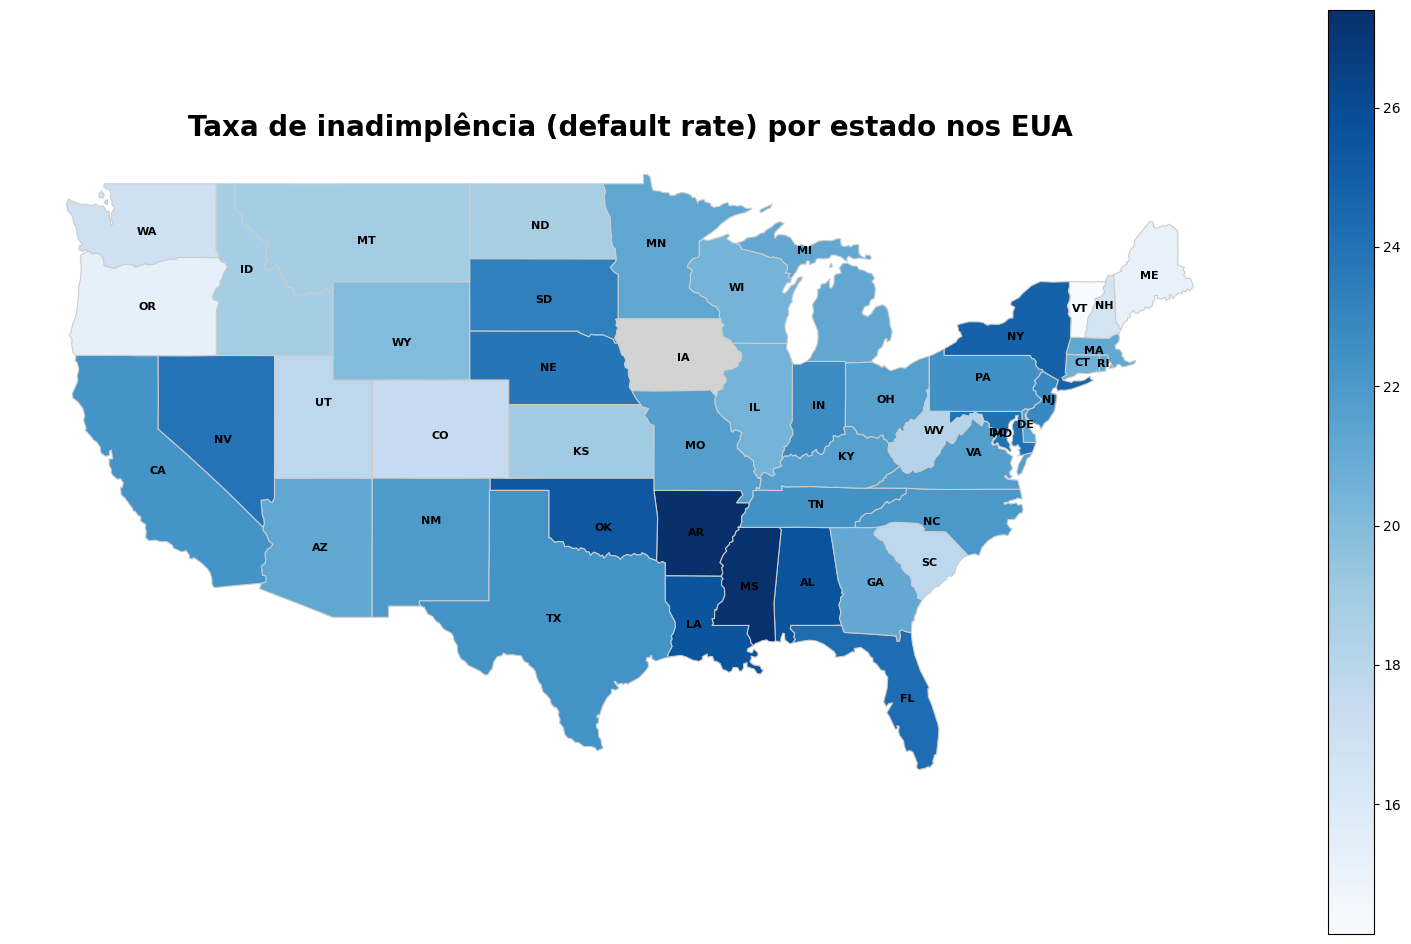


11.2 ANÁLISE DE CORRELAÇÃO: PERFIL DE RISCO VS. INADIMPLÊNCIA POR ESTADO


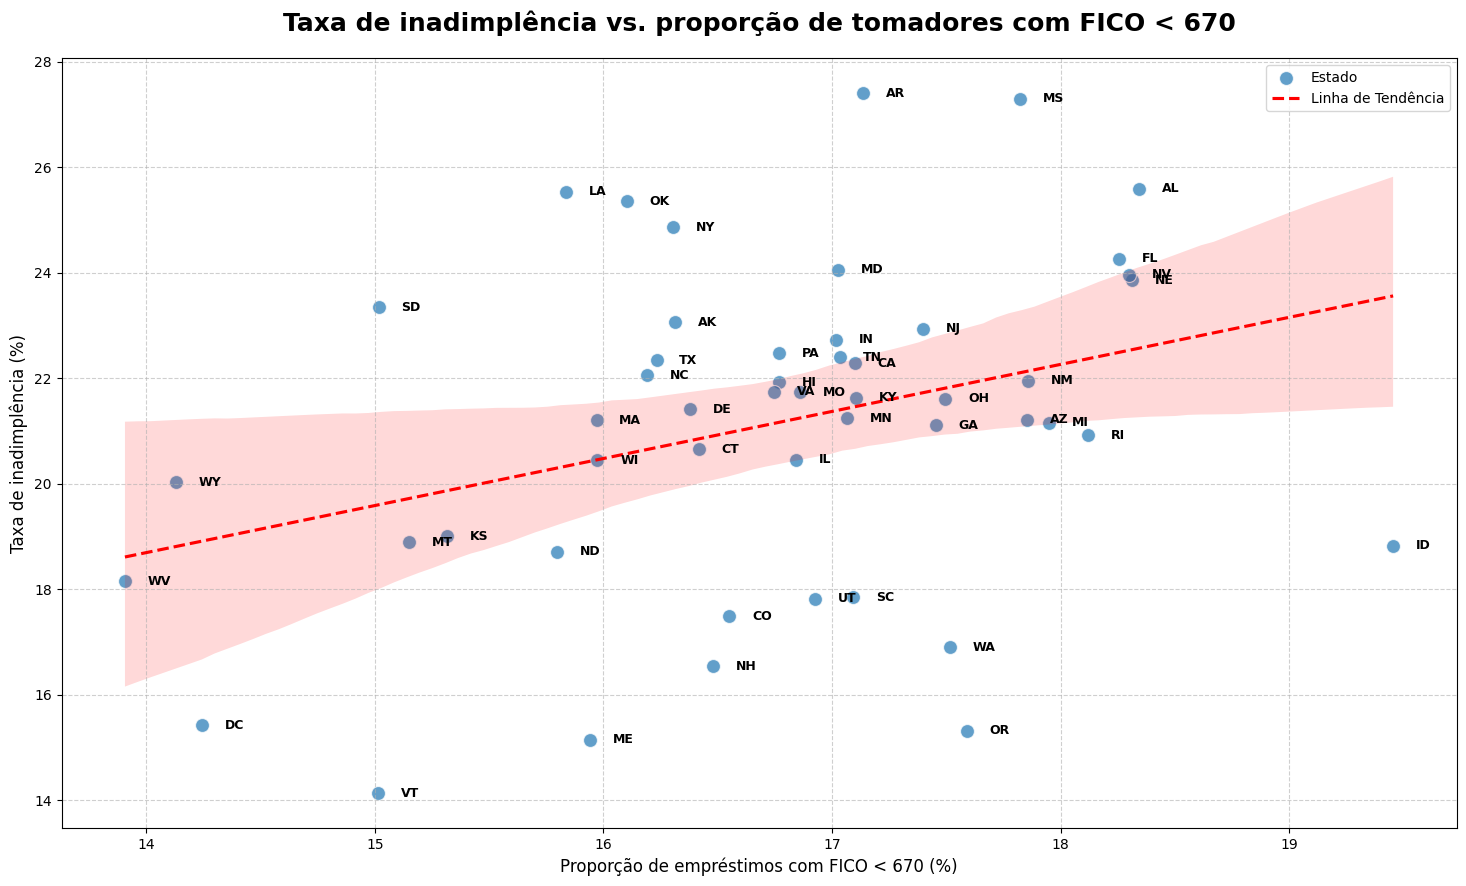

In [14]:

# ==============================================================================
# 11 ANÁLISE GEOESPACIAL DA INADIMPLÊNCIA POR ESTADO
# ==============================================================================
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

print("\n" + "="*60)
print("11.1 ANÁLISE GEOESPACIAL DA INADIMPLÊNCIA POR ESTADO")
print("="*60)

# --- Usar uma URL direta e estável para um GeoJSON de estados dos EUA ---
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
print(f"Carregando dados geoespaciais de: {url}")
states_gdf = gpd.read_file(url)
print("Dados geoespaciais carregados com sucesso.")

# --- PASSO DE DIAGNÓSTICO CRÍTICO ---
# Vamos imprimir o cabeçalho do GeoDataFrame para ver a estrutura exata.
print("\n--- Diagnóstico: Cabeçalho do GeoDataFrame ---")
print(states_gdf.head())
print("\nColunas disponíveis:", states_gdf.columns)
print("--------------------------------------------\n")

# Com base na inspeção do `head()`, a coluna com o nome do estado é 'name'.

# --- Mapear nome do estado para abreviação ---
us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO",
    "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC", "Puerto Rico": "PR"
}

states_gdf['addr_state'] = states_gdf['name'].map(us_state_to_abbrev)

# --- Preparar os dados de inadimplência ---
state_analysis = df.groupby('addr_state')['target_default'].agg(['count', 'mean']).reset_index()
state_analysis = state_analysis.rename(columns={'count': 'n_emprestimos', 'mean': 'taxa_default'})
state_analysis['taxa_default'] *= 100

# --- Juntar os dados geoespaciais com os dados de inadimplência ---
merged_map = states_gdf.set_index('addr_state').join(state_analysis.set_index('addr_state'))

# Remover Alasca e Havaí para melhor visualização do mapa continental
merged_map = merged_map[~merged_map['name'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

# --- Criar o mapa Choropleth ---
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

merged_map.plot(column='taxa_default',
                cmap='Blues',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                missing_kwds={
                    "color": "lightgrey",
                    "label": "Dados ausentes",
                })

# Iterar sobre cada estado no GeoDataFrame para adicionar a sigla
for idx, row in merged_map.iterrows():
    # A geometria pode ser nula para estados sem dados
    if not row.geometry.is_empty:
        # Usar representative_point() para garantir que o ponto esteja dentro do polígono
        point = row.geometry.representative_point()
        ax.text(point.x, point.y, idx,
                fontsize=8,
                fontweight='bold',
                ha='center',
                va='center',
                color='black')

ax.set_title('Taxa de inadimplência (default rate) por estado nos EUA', fontsize=20, fontweight='bold')
ax.set_axis_off()

legend = ax.get_legend()
if legend:
    legend.set_title('Taxa de Default (%)')

plt.show()

# ==============================================================================
# 11.2 ANÁLISE DE CORRELAÇÃO: PERFIL DE RISCO VS. INADIMPLÊNCIA POR ESTADO
# ==============================================================================
print("\n" + "="*60)
print("11.2 ANÁLISE DE CORRELAÇÃO: PERFIL DE RISCO VS. INADIMPLÊNCIA POR ESTADO")
print("="*60)

# Definir o limiar para "alto risco"
FICO_RISK_THRESHOLD = 670

# Calcular a proporção de tomadores de alto risco por estado
def calculate_high_risk_proportion(df, threshold):
    # Contar quantos empréstimos estão abaixo do limiar
    high_risk_counts = df[df['fico_range_low'] < threshold].groupby('addr_state').size()
    # Contar o total de empréstimos por estado
    total_counts = df.groupby('addr_state').size()
    # Calcular a proporção e converter para porcentagem
    risk_proportion = (high_risk_counts / total_counts * 100).fillna(0)
    return risk_proportion.reset_index(name='prop_alto_risco_pct')

# Preparar os dados para o plot
risk_profile_by_state = calculate_high_risk_proportion(df, FICO_RISK_THRESHOLD)
state_plot_data = pd.merge(state_analysis, risk_profile_by_state, on='addr_state')

# Criar o scatter plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plotar os pontos
sns.scatterplot(x='prop_alto_risco_pct', y='taxa_default', data=state_plot_data, s=100, ax=ax, alpha=0.7, label='Estado')

# Adicionar a linha de tendência
sns.regplot(x='prop_alto_risco_pct', y='taxa_default', data=state_plot_data, scatter=False, color='red', ax=ax, line_kws={'linestyle':'--'}, label='Linha de Tendência')

# Adicionar as siglas dos estados
for i, row in state_plot_data.iterrows():
    ax.text(row['prop_alto_risco_pct'] + 0.1,  # Pequeno deslocamento
            row['taxa_default'],
            row['addr_state'],
            fontsize=9,
            fontweight='bold',
            ha='left',
            va='center')

# Configurar títulos e rótulos
ax.set_title(f'Taxa de inadimplência vs. proporção de tomadores com FICO < {FICO_RISK_THRESHOLD}', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel(f'Proporção de empréstimos com FICO < {FICO_RISK_THRESHOLD} (%)', fontsize=12)
ax.set_ylabel('Taxa de inadimplência (%)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

plt.show()




### Conclusão da análise exploratória de dados

A análise exploratória de dados revelou os fatores que influenciam a inadimplência na plataforma Lending Club. As variáveis internas de risco, como `grade`, `sub_grade` e a `int_rate` (taxa de juros), são os preditores mais fortes, confirmando a eficácia do sistema de rating da LC. A análise também validou a relevância de métricas financeiras do tomador, como o score `FICO` e a `dti` (relação dívida/renda), além de demonstrar que fatores externos, capturados pela data de emissão e pelo estado do tomador, exercem uma influência significativa sobre o risco de default.

Para o pré-processamento, a estratégia deve se concentrar em refinar o conjunto de dados para obter o melhor do seu poder preditivo. Sugere-se fazer uma seleção de features, eliminando a redundância ao remover colunas como `funded_amnt` e `fico_range_high`, que são duplicatas funcionais de `loan_amnt` e `fico_range_low`, respectivamente. A variável `grade` será preterida em favor da `sub_grade`, que oferece uma granularidade de risco superior. Além disso, a coluna `dti_joint` será descartada devido à sua alta taxa de ausência de dados (95%), que a torna inviável para modelagem.

Em seguida, realizaremos o tratamento dos dados. Os poucos valores faltantes na `dti` podem ser imputados utilizando a mediana, uma abordagem resistente a outliers. Para corrigir a forte assimetria e a presença de valores extremos identificados em `annual_inc` e `dti`, podemos aplicar uma transformação logarítmica ou similar, o que ajudará a normalizar suas distribuições e a estabilizar a variância. As demais variáveis numéricas, como `loan_amnt` e `fico_range_low`, serão padronizadas através do `StandardScaler` para garantir que todas tenham a mesma escala de importância em algoritmos sensíveis a essa característica.

Por fim, é possível definir algumas sugestões para a feature engineering. A `sub_grade` pode ser convertida em uma variável numérica ordinal para preservar sua hierarquia de risco. Variáveis categóricas como `home_ownership`, `purpose` e `addr_state` podem ser transformadas usando técnicas como *one-hot encoding* ou *target encoding*, com atenção especial para gerenciar a alta cardinalidade de `addr_state`.



## Pré-processamento dos dados

Após a análise exploratória de dados anterior, torna-se trivial as etapas de pré-processamento no que se refere ao tratamento das categóricas, tratamento de outliers, imputação de valores faltantes e transformação de variáveis numéricas. A seguir, apresentamos o pré-processamento necessário para preparar os dados para algoritmos de machine learning, com foco na validação cruzada k-fold (k=10) e evitando vazamento de dados.


### Recarregamento dos dados

Recarregamos o dataset original para garantir que iniciamos o pré-processamento com dados limpos, sem modificações da análise exploratória.

In [15]:
# Recarregamento dos dados originais
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Carregamento do dataset original
df_original = pd.read_csv(github_url, compression='gzip', low_memory=False)

print(f"Dataset recarregado com sucesso!")
print(f"Dimensões: {df_original.shape}")
print(f"Período: {df_original['issue_d'].min()} a {df_original['issue_d'].max()}")

## Visualizar as primeiras linhas
df_original.head()

Dataset recarregado com sucesso!
Dimensões: (599994, 128)
Período: 2015-01-01 a 2020-09-01


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,next_pymnt_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,target_default,ano
0,68619,77481190,10000.0000,10000.0000,10000.0000,36 months,17.27%,357.8800,D,D2,7 years,MORTGAGE,150000.0000,Source Verified,2016-05-01,Fully Paid,n,medical,328xx,FL,30.7800,1.0000,Sep-1998,660.0000,664.0000,2.0000,1.0000,NaN,25.0000,0.0000,14349.0000,57.4%,67.0000,w,357.5300,NaN,714.0000,710.0000,0.0000,1.0000,1.0000,Individual,NaN,NaN,NaN,1.0000,0.0000,449831.0000,0.0000,12.0000,0.0000,2.0000,13.0000,149243.0000,59.0000,2.0000,4.0000,4862.0000,59.0000,25000.0000,1.0000,0.0000,4.0000,6.0000,18743.0000,3995.0000,65.3000,0.0000,0.0000,152.0000,211.0000,9.0000,9.0000,4.0000,9.0000,1.0000,1.0000,1.0000,3.0000,4.0000,11.0000,3.0000,22.0000,20.0000,12.0000,42.0000,11.0000,23.0000,1.0000,0.0000,1.0000,2.0000,95.5000,50.0000,0.0000,0.0000,552647.0000,163592.0000,11500.0000,248797.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2016
1,31941,88514571,28000.0000,28000.0000,28000.0000,60 months,9.49%,587.9200,B,B2,10+ years,MORTGAGE,114500.0000,Verified,2016-08-01,Fully Paid,n,debt_consolidation,220xx,VA,15.2600,0.0000,Oct-1982,705.0000,709.0000,2.0000,49.0000,NaN,19.0000,0.0000,35463.0000,38%,34.0000,w,27167.4000,NaN,574.0000,570.0000,0.0000,NaN,1.0000,Individual,NaN,NaN,NaN,0.0000,0.0000,425523.0000,1.0000,1.0000,1.0000,1.0000,8.0000,18184.0000,91.0000,1.0000,1.0000,7521.0000,38.0000,94050.0000,0.0000,3.0000,3.0000,3.0000,22395.0000,6135.0000,57.0000,0.0000,0.0000,125.0000,406.0000,3.0000,3.0000,3.0000,3.0000,NaN,3.0000,49.0000,0.0000,10.0000,17.0000,16.0000,16.0000,6.0000,17.0000,25.0000,12.0000,19.0000,NaN,0.0000,0.0000,2.0000,97.0000,70.0000,0.0000,0.0000,508656.0000,53647.0000,61350.0000,20000.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2016
2,53611,78309085,35000.0000,35000.0000,35000.0000,60 months,16.29%,856.5400,D,D1,10+ years,MORTGAGE,122000.0000,Source Verified,2016-05-01,Fully Paid,n,debt_cons

### Preparação do dataset para modelagem

Com base nas conclusões da análise exploratória, vamos preparar o dataset para a modelagem.

Nossa tarefa aqui é refinar o conjunto de features, removendo colunas que se mostraram redundantes, com alta proporção de valores ausentes, ou que serão substituídas por versões mais granulares.

In [16]:
# 1. Definir X e y limitando-se as extended_key_columns

df = df_original[extended_key_columns]

y = df['target_default']
X = df.drop(columns=['target_default'])

# 2. Seleção final de features com base na EDA
# Lista de colunas a serem removidas com base nas conclusões da EDA.
cols_to_drop = [
    # Redundância identificada na análise de correlação
    'funded_amnt',          # Duplicata de 'loan_amnt' na amostra
    'fico_range_high',      # Correlação perfeita com 'fico_range_low'
    'grade',                # 'sub_grade' oferece mais granularidade

    # Alta proporção de valores ausentes
    'dti_joint',            # >94% de valores ausentes

    # Alta cardinalidade e baixa relevância (conforme EDA)
    'zip_code',             # 'addr_state' já captura a informação geográfica principal

    # Vamos fazer uma análise Through-the-Cycle (TTC) e não focar em datas específicas
    'issue_d',
    'earliest_cr_line',
    'last_credit_pull_d',
    'last_pymnt_d',
    'next_pymnt_d'
]

# Filtrar apenas colunas que existem no dataframe para evitar erros
final_cols_to_drop = [col for col in cols_to_drop if col in X.columns]

# Remove o caractere '%' e converte a coluna para float
X['int_rate'] = X['int_rate'].str.replace('%', '').astype(float)
X['int_rate'] = X['int_rate'] / 100.0

X_final = X.drop(columns=final_cols_to_drop)

print("Dataset preparado para modelagem.")
print(f"Dimensões das features (X): {X_final.shape}")
print(f"Dimensões do target (y): {y.shape}")

# Exibir as primeiras linhas do conjunto de dados final
X_final.head()

Dataset preparado para modelagem.
Dimensões das features (X): (599994, 14)
Dimensões do target (y): (599994,)


,loan_amnt,sub_grade,int_rate,term,annual_inc,dti,fico_range_low,home_ownership,verification_status,purpose,funded_amnt_inv,acc_open_past_24mths,mort_acc,addr_state
0,10000.0000,D2,0.1727,36 months,150000.0000,30.7800,660.0000,MORTGAGE,Source Verified,medical,10000.0000,6.0000,4.0000,FL
1,28000.0000,B2,0.0949,60 months,114500.0000,15.2600,705.0000,MORTGAGE,Verified,debt_consolidation,28000.0000,3.0000,3.0000,VA
2,35000.0000,D1,0.1629,60 months,122000.0000,14.6300,710.0000,MORTGAGE,Source Verified,debt_consolidation,35000.0000,2.0000,2.0000,GA
3,2750.0000,B1,0.0824,36 months,55000.0000,24.4600,700.0000,RENT,Not Verified,major_purchase,2750.0000,1.0000,0.0000,SC
4,10000.0000,B2,0.1049,36 months,115000.0000,7.4200,670.0000,RENT,Not Verified,debt_consolidation,10000.0000,6.0000,1.0000,TX


### Escolha das transformações das variáveis categóricas (encoding)

Para as variáveis categóricas, serão aplicadas três estratégias principais:
- **One-hot encoding**: Para variáveis com baixa cardinalidade, que possuem categorias bem definidas e não ordenadas.
- **Ordinal encoding**: Para variáveis ordinais, como `sub_grade`, que possuem uma ordem natural de risco.
- **Target encoding**: Para variáveis categóricas com média cardinalidade, como `addr_state`, onde o número de categorias é grande demais para o one-hot encoding ser viável. O target encoding irá substituir cada categoria pelo valor médio da variável target (`target_default`) para aquela categoria, preservando a informação de risco.
- **Frequency encoding**: Para variáveis categóricas com alta cardinalidade. O frequency encoding substitui cada categoria pela frequência relativa daquela categoria no dataset, preservando a informação de risco. Porém, nenhuma variável restante se enquadra nesse caso.

In [17]:
# A lista 'extended_key_columns' foi definida na EDA.
# Vamos filtrar para usar apenas as colunas categóricas que existem no nosso dataframe final.
categorical_cols = [
    col for col in extended_key_columns
    if col in X_final.columns and X_final[col].dtype in ['object', 'category']
]

# Para as células seguintes, ainda precisamos da lista completa de colunas numéricas.
numeric_cols = X_final.select_dtypes(include=['number']).columns.tolist()

print(f"São consideradas {len(categorical_cols)} variáveis categóricas e {len(numeric_cols)} variáveis numéricas.")

# Análise da cardinalidade das variáveis categóricas
print("=== ANÁLISE DE CARDINALIDADE ===")

df_filtered = X_final[categorical_cols].copy()

cardinality_info = {}
for col in categorical_cols:
    n_unique = df_filtered[col].nunique()
    cardinality_info[col] = n_unique
    missing_pct = (df_filtered[col].isnull().sum() / len(df_filtered)) * 100

    print(f"{col}: {n_unique} categorias únicas (Missing: {missing_pct:.1f}%)")

    # Mostrar as categorias mais frequentes
    if n_unique <= 20:  # Se baixa cardinalidade, mostrar todas
        top_cats = df_filtered[col].value_counts().head(10)
        print(f"  Top categorias: {list(top_cats.index[:5])}")
    else:  # Se alta cardinalidade, mostrar apenas as top
        top_cats = df_filtered[col].value_counts().head(10)
        print(f"  Top 5: {list(top_cats.index[:5])} (...e mais {n_unique-5})")

# Estratégias de encoding baseadas na cardinalidade e importância
encoding_strategy = {}

for col, n_unique in cardinality_info.items():
    if col in ['sub_grade']:
        # Ordinal encoding para grades (A < B < C < D < E < F < G)
        encoding_strategy[col] = 'ordinal'
    elif n_unique <= 10:
        # One-hot encoding para baixa cardinalidade
        encoding_strategy[col] = 'onehot'
    elif n_unique <= 50:
        # Target encoding para cardinalidade moderada
        encoding_strategy[col] = 'target'
    else:
        # Frequency encoding para alta cardinalidade
        encoding_strategy[col] = 'frequency'

print(f"\n=== ESTRATÉGIAS DE ENCODING ===")
for col, strategy in encoding_strategy.items():
    print(f"{col}: {strategy}")

# Definir ordens específicas para encoding ordinal
ordinal_mappings = {
    'sub_grade': ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
                 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
                 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
                 'G1', 'G2', 'G3', 'G4', 'G5']
    }


São consideradas 6 variáveis categóricas e 8 variáveis numéricas.
=== ANÁLISE DE CARDINALIDADE ===
sub_grade: 35 categorias únicas (Missing: 0.0%)
  Top 5: ['C1', 'B5', 'B4', 'C2', 'C4'] (...e mais 30)
term: 2 categorias únicas (Missing: 0.0%)
  Top categorias: [' 36 months', ' 60 months']
home_ownership: 5 categorias únicas (Missing: 0.0%)
  Top categorias: ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE']
verification_status: 3 categorias únicas (Missing: 0.0%)
  Top categorias: ['Source Verified', 'Not Verified', 'Verified']
purpose: 13 categorias únicas (Missing: 0.0%)
  Top categorias: ['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'major_purchase']
addr_state: 50 categorias únicas (Missing: 0.0%)
  Top 5: ['CA', 'TX', 'NY', 'FL', 'IL'] (...e mais 45)

=== ESTRATÉGIAS DE ENCODING ===
sub_grade: ordinal
term: onehot
home_ownership: onehot
verification_status: onehot
purpose: target
addr_state: target


### Transformações personalizadas

Criamos duas classes de transformação personalizadas para lidar com as variáveis. Uma é a transformação de log e a outra é a transformação de target encoding. Essas classes serão utilizadas no pré-processamento seguinte para aplicar as transformações necessárias às variáveis numéricas e categóricas, respectivamente.



In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        # Nenhuma ação de fit é necessária
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.columns is None:
            self.columns = X.columns

        # Garante que não haja valores negativos antes do log
        X_copy[self.columns] = X_copy[self.columns].clip(lower=0)

        # Aplica a transformação log1p (log(1+x))
        X_copy[self.columns] = np.log1p(X_copy[self.columns])

        return X_copy

    def get_feature_names_out(self, input_features=None):
        """Returns the feature names."""
        if input_features is None:
            return self.columns
        return input_features

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, smoothing=10.0):
        self.smoothing = smoothing
        self.mappings = []
        self.global_mean = 0

    def fit(self, X, y):
        # Garante que y seja uma Series do pandas
        if not isinstance(y, pd.Series):
            y = pd.Series(y, index=X.index if isinstance(X, pd.DataFrame) else None)

        self.global_mean = y.mean()

        # Converte X para DataFrame se for um array NumPy
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        self.mappings = []
        for col in X.columns:
            # Concatena a feature atual com o target
            temp = pd.concat([X[col], y], axis=1)
            temp.columns = ['feature', 'target']

            # Calcula a média e a contagem por categoria
            agg = temp.groupby('feature')['target'].agg(['count', 'mean'])
            counts = agg['count']
            means = agg['mean']

            # Calcula o encoding com suavização
            smooth = (counts * means + self.smoothing * self.global_mean) / (counts + self.smoothing)
            self.mappings.append(smooth)

        return self

    def transform(self, X):
        # Converte X para DataFrame se for um array NumPy
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        X_transformed = X.copy()
        for i, col in enumerate(X.columns):
            # Aplica o mapeamento para a i-ésima coluna
            X_transformed[col] = X_transformed[col].map(self.mappings[i])
            # Preenche categorias não vistas no treino com a média global
            X_transformed[col].fillna(self.global_mean, inplace=True)

        # Retorna um array NumPy, como esperado em um pipeline
        return X_transformed.values

    def get_feature_names_out(self, input_features=None):
        """Returns the feature names."""
        # The number of output features is the same as input features
        if input_features is None:
            # This case might be tricky if X was a numpy array in fit
            # Let's assume we can get the number of features from the mappings
            return [f"target_encoded_{i}" for i in range(len(self.mappings))]
        return input_features

### Definição do pipeline de pré-processamento

Definimos um pipeline de pré-processamento que aplica as transformações necessárias às variáveis do dataset. O pipeline inclui as seguintes etapas:
- **Imputação de valores faltantes**: Imputação da variável `dti` pela mediana, dado que possui apenas 0,08% de valores faltantes.
- **Transformações numéricas**: Aplicação de transformações logarítmicas para
variáveis como `annual_inc` e `dti`, além de padronização das variáveis numéricas restantes.
- **Transformações categóricas**: Aplicação de one-hot encoding, ordinal encoding e target encoding conforme a estratégia definida anteriormente.
- **Normalização**: Padronização das variáveis numéricas para garantir que todas tenham a mesma escala de importância em algoritmos sensíveis a essa característica.



In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Separar as colunas por tipo de encoding
onehot_columns = [col for col, strategy in encoding_strategy.items()
                  if strategy == 'onehot' and col in df_filtered.columns]

ordinal_columns = [col for col, strategy in encoding_strategy.items()
                   if strategy == 'ordinal' and col in df_filtered.columns]

target_encode_columns = [col for col, strategy in encoding_strategy.items()
                         if strategy == 'target' and col in df_filtered.columns]

frequency_columns = [col for col, strategy in encoding_strategy.items()
                     if strategy == 'frequency' and col in df_filtered.columns]

# Segundo a EDA, somente a coluna dti possui missing values
for_impute_columns = ['dti']
# Segunda a EDA, somente as colunas dti e annual_inc deveriam passar por capping ou transformação log
# Vamos optar por fazer somente a transformação log, uma vez que não parecem ser erros nos dados
log_columns = ['dti', 'annual_inc']

# Colunas numéricas que não precisam de transformação log, vão sofrer somente normalização
standard_numeric = [col for col in numeric_cols if col not in log_columns]


print("=== CONFIGURAÇÃO DO PIPELINE ===")
print(f"One-hot encoding: {onehot_columns}")
print(f"Ordinal encoding: {ordinal_columns}")
print(f"Target encoding: {target_encode_columns}")
print(f"Frequency encoding: {frequency_columns}")
print(f"Imputação: {for_impute_columns}")
print(f"Transformação log: {log_columns}")

# Criar pipelines para diferentes tipos de variáveis

# Pipeline para variáveis categóricas com one-hot encoding
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Pipeline para variáveis categóricas com ordinal encoding
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal', OrdinalEncoder(
        categories=[ordinal_mappings.get(col, 'auto') for col in ordinal_columns],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

# Pipeline para variáveis categóricas com target encoding
target_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('target_encoder', TargetEncoder(smoothing=10.0))
])

# Pipeline para variáveis categóricas com frequency encoding
# Não implementado, não tem

# Pipeline para variáveis numéricas com log transform
log_pipeline = Pipeline([
    ('log', LogTransformer(columns=log_columns)),
    ('scaler', StandardScaler())
])

# 7. Pipeline para variáveis numéricas padrão
standard_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combinar todos os pipelines em um ColumnTransformer
transformers = []

if onehot_columns:
    transformers.append(('onehot', onehot_pipeline, onehot_columns))
if ordinal_columns:
    transformers.append(('ordinal', ordinal_pipeline, ordinal_columns))
if target_encode_columns:
    transformers.append(('target', target_pipeline, target_encode_columns))
if log_columns:
    transformers.append(('log_numeric', log_pipeline, log_columns))
if standard_numeric:
    transformers.append(('standard_numeric', standard_pipeline, standard_numeric))

# Criar o preprocessor final
preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='drop'  # Drop qualquer coluna não especificada
)

print(f"\nPipeline criado com {len(transformers)} transformadores!")

# Verificar se todas as features estão cobertas
all_used_columns = (onehot_columns + ordinal_columns + target_encode_columns +
                   frequency_columns + log_columns + standard_numeric)

missing_columns = set(categorical_cols + numeric_cols) - set(all_used_columns)
if missing_columns:
    print(f"Colunas não cobertas pelo pipeline: {missing_columns}")
else:
    print("Todas as features estão cobertas pelo pipeline!")

=== CONFIGURAÇÃO DO PIPELINE ===
One-hot encoding: ['term', 'home_ownership', 'verification_status']
Ordinal encoding: ['sub_grade']
Target encoding: ['purpose', 'addr_state']
Frequency encoding: []
Imputação: ['dti']
Transformação log: ['dti', 'annual_inc']

Pipeline criado com 5 transformadores!
Todas as features estão cobertas pelo pipeline!


### Configuração da validação cruzada e verificação final

Nesta etapa, finalizamos a preparação dos dados e configuramos a estratégia de validação para o treinamento dos modelos. Utilizamos `StratifiedKFold` com 10 folds para garantir que a proporção de inadimplentes (`target_default`) seja a mesma em cada divisão de treino e validação. Essa abordagem é crucial para datasets desbalanceados, pois previne que um fold contenha uma proporção muito diferente de casos positivos, o que poderia enviesar a avaliação do modelo.

O código verifica explicitamente a distribuição da taxa de inadimplência (`bad rate`) em cada um dos 10 folds, confirmando a estabilidade da estratificação. As estatísticas de média e desvio padrão demonstram que a variação entre os folds é mínima.


In [20]:
# Preparar os dados finais para ML

print("=== PREPARAÇÃO FINAL DOS DADOS ===")
print(f"Features (X): {X_final.shape}")
print(f"Target (y): {y.shape}")
print(f"Distribuição do target: {y.value_counts().to_dict()}")

# Verificar tipos de dados das features
print(f"\nTipos de dados por feature:")
print(f"Categóricas: {len(categorical_cols)} features")
print(f"Numéricas: {len(numeric_cols)} features")

# Configurar validação cruzada estratificada com 10 folds
cv_strategy = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=101
)

print(f"\n=== CONFIGURAÇÃO DE VALIDAÇÃO CRUZADA ===")
print(f"Estratégia: StratifiedKFold com {cv_strategy.n_splits} folds")
print(f"Shuffle: {cv_strategy.shuffle}")
print(f"Random state: {cv_strategy.random_state}")

# Verificar a distribuição do target em cada fold
fold_distributions = []
for fold_idx, (train_idx, val_idx) in enumerate(cv_strategy.split(X, y)):
    y_train_fold = y.iloc[train_idx]
    y_val_fold = y.iloc[val_idx]

    train_dist = y_train_fold.value_counts(normalize=True)
    val_dist = y_val_fold.value_counts(normalize=True)

    fold_distributions.append({
        'fold': fold_idx + 1,
        'train_size': len(train_idx),
        'val_size': len(val_idx),
        'train_bad_rate': train_dist.get(1, 0),
        'val_bad_rate': val_dist.get(1, 0)
    })

fold_df = pd.DataFrame(fold_distributions)
print(f"\nDistribuição por fold:")
print(fold_df)

print(f"\nEstatísticas da bad rate:")
print(f"Média treino: {fold_df['train_bad_rate'].mean():.4f}")
print(f"Média validação: {fold_df['val_bad_rate'].mean():.4f}")
print(f"Desvio padrão treino: {fold_df['train_bad_rate'].std():.4f}")
print(f"Desvio padrão validação: {fold_df['val_bad_rate'].std():.4f}")

# Salvar informações importantes para uso posterior
preprocessing_info = {
    'features': {
        'categorical': categorical_cols,
        'numeric': numeric_cols,
        'total': len(categorical_cols) + len(numeric_cols)
    },
    'target': {
        'column': 'target_default',
        'classes': y.unique().tolist(),
        'distribution': y.value_counts().to_dict()
    },
    'data_shape': {
        'n_samples': X_final.shape[0],
        'n_features': X_final.shape[1]
    },
    'encoding_strategy': encoding_strategy,
    'cv_config': {
        'method': 'StratifiedKFold',
        'n_splits': cv_strategy.n_splits,
        'shuffle': cv_strategy.shuffle,
        'random_state': cv_strategy.random_state
    }
}

print(f"\n=== RESUMO FINAL ===")
print(f"- Dataset preparado com {preprocessing_info['data_shape']['n_samples']:,} amostras")
print(f"- {preprocessing_info['features']['total']} features processadas")
print(f"- Target balanceado: {preprocessing_info['target']['distribution']}")


=== PREPARAÇÃO FINAL DOS DADOS ===
Features (X): (599994, 14)
Target (y): (599994,)
Distribuição do target: {0: 467554, 1: 132440}

Tipos de dados por feature:
Categóricas: 6 features
Numéricas: 8 features

=== CONFIGURAÇÃO DE VALIDAÇÃO CRUZADA ===
Estratégia: StratifiedKFold com 10 folds
Shuffle: True
Random state: 101

Distribuição por fold:
   fold  train_size  val_size  train_bad_rate  val_bad_rate
0     1      539994     60000          0.2207        0.2207
1     2      539994     60000          0.2207        0.2207
2     3      539994     60000          0.2207        0.2207
3     4      539994     60000          0.2207        0.2207
4     5      539995     59999          0.2207        0.2207
5     6      539995     59999          0.2207        0.2207
6     7      539995     59999          0.2207        0.2207
7     8      539995     59999          0.2207        0.2207
8     9      539995     59999          0.2207        0.2207
9    10      539995     59999          0.2207        0

### Verificação do pré-processamento

Para inspecionar o resultado final do pipeline de pré-processamento, aplicamos o `preprocessor` a todo o conjunto de dados `X_final`. Esta etapa serve como uma verificação final, permitindo-nos visualizar a estrutura dos dados que foram efetivamente utilizados pelo modelo.

O código executa o `fit` e o `transform`, convertendo o `DataFrame` original em uma matriz numérica. O resultado é exibido em um novo `DataFrame`, utilizando `get_feature_names_out()` para obter os nomes das colunas geradas pelas transformações, como as novas colunas do one-hot encoding etc. Isso confirma que todas as etapas de imputação, transformação e encoding foram aplicadas corretamente, resultando em um conjunto de dados pronto para a modelagem.

In [21]:
print("Fitando o pré-processador nos dados...")
preprocessor.fit(X_final, y)

print("Transformando os dados...")
X_transformed = preprocessor.transform(X_final)
#feature_names = preprocessor.get_feature_names_out()
print("Transformação concluída. Número de features após transformação:", X_transformed.shape[1])

# Mostra as primeiras linhas do resultado transformado
print("Dados transformados (primeiras linhas):")
display(pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out()))

Fitando o pré-processador nos dados...
Transformando os dados...
Transformação concluída. Número de features após transformação: 18
Dados transformados (primeiras linhas):


,onehot__term_ 60 months,onehot__home_ownership_MORTGAGE,onehot__home_ownership_NONE,onehot__home_ownership_OWN,onehot__home_ownership_RENT,onehot__verification_status_Source Verified,onehot__verification_status_Verified,ordinal__sub_grade,target__purpose,target__addr_state,log_numeric__dti,log_numeric__annual_inc,standard_numeric__loan_amnt,standard_numeric__int_rate,standard_numeric__fico_range_low,standard_numeric__funded_amnt_inv,standard_numeric__acc_open_past_24mths,standard_numeric__mort_acc
0,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,16.0000,0.2257,0.2426,1.0551,1.2855,-0.5128,0.8594,-1.1475,-0.5123,0.3664,1.3250
1,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,6.0000,0.2331,0.2174,-0.1128,0.8634,1.4425,-0.7059,0.2038,1.4434,-0.5411,0.7879
2,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,15.0000,0.2331,0.2111,-0.1817,0.9626,2.2029,0.6622,0.3539,2.2039,-0.8436,0.2507
3,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,5.0000,0.2158,0.1786,0.6686,-0.2826,-1.3003,-0.9574,0.0536,-1.3000,-1.1461,-0.8236
4,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,6.0000,0.2331,0.2234,-1.2598,0.8702,-0.5128,-0.5047,-0.8473,-0.5123,0.3664,-0.2864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599989,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,0.2331,0.2046,-0.5163,0.6518,1.6597,-0.3981,-0.6971,1.6607,-0.8436,1.3250
599990,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,16.0000,0.2216,0.2426,-0.1011,0.0235,-0.9473,1.5194,0.3539,-0.9469,-0.2386,-0.2864
599991,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,2.0000,0.1953,0.1691,0.7678,1.3667,2.7460,-1.0943,-0.5470,2.7472,0.9715,1.8621
599992,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.1953,0.1750,0.9857,-0.2826,-0.0783,-1.0943,2.3059,-0.0777,0.0639,0.2507


## Modelagem preditiva com LightGBM

Para a modelagem, optamos pelo LightGBM devido à sua alta performance. O processo é encapsulado em um Pipeline do Scikit-learn, que integra o pré-processamento com o classificador LGBMClassifier para evitar vazamento de dados durante a validação cruzada estratificada de 10 folds.

O desbalanceamento de classes é tratado com o parâmetro is_unbalance=True. Embora a métrica principal utilizada seja a AUC-ROC, que mede a discriminação geral, o custo assimétrico dos erros (falsos negativos são mais caros) exige uma análise complementar. Por isso, em seguida, utilizamos a curva Precision-Recall (AUC-PR) para encontrar um limiar de decisão que otimize o equilíbrio entre capturar o máximo de inadimplentes (Recall) e minimizar alarmes falsos (Precision).

A análise dos gráficos revela um desempenho moderado do modelo, com uma AUC-PR de 0,416, que é superior a um modelo aleatório (≈0,23). A curva Precision-Recall evidencia o trade-off entre capturar o máximo de inadimplentes (recall) e minimizar alarmes falsos (precisão).

O segundo gráfico mostra que o limiar de decisão ideal depende do objetivo de negócio para minimizar perdas (priorizar recall), um limiar baixo (ex: 0,6) captura mais inadimplentes, mas aumenta os falsos positivos.
Para minimizar recusas incorretas (priorizar precisão), um limiar alto (ex: 0,8) é mais assertivo, mas deixa de identificar muitos inadimplentes.
A escolha final do limiar deve ser baseada em uma análise de custo-benefício.

In [22]:
# ==============================================================================
# MODELAGEM PREDITIVA COM LIGHTGBM
# ==============================================================================
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier
import time

print("\n" + "="*60)
print("MODELAGEM PREDITIVA COM LIGHTGBM")
print("="*60)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=101, is_unbalance=True))
])

print("Pipeline do modelo final criado:")
print(model_pipeline)

# 2. Definir as métricas de avaliação
scoring_metrics = ['roc_auc', 'accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

print(f"\nMétricas de avaliação: {scoring_metrics}")

# 3. Executar a validação cruzada
# Usando a estratégia de CV (cv_strategy) já definida
print("\nIniciando a validação cruzada (10-fold)...")
start_time = time.time()

# O cross_validate lida com o fit/predict para cada fold
cv_results = cross_validate(
    estimator=model_pipeline,
    X=X_final,
    y=y,
    cv=cv_strategy,
    scoring=scoring_metrics,
    n_jobs=-1  # Usar todos os cores disponíveis
)

end_time = time.time()
print(f"Validação cruzada concluída em {end_time - start_time:.2f} segundos.")

# 4. Apresentar os resultados de forma clara
print("\n" + "="*60)
print("RESULTADOS DA VALIDAÇÃO CRUZADA (10-FOLD)")
print("="*60)

print(f"{'Métrica':<25} | {'Média':<15} | {'Desvio Padrão':<15}")
print("-" * 60)

for metric in scoring_metrics:
    key = f'test_{metric}'
    mean_score = cv_results[key].mean()
    std_score = cv_results[key].std()
    print(f"{metric:<25} | {mean_score:<15.4f} | {std_score:<15.4f}")

print("-" * 60)
print(f"Tempo total de execução: {end_time - start_time:.2f} segundos")



MODELAGEM PREDITIVA COM LIGHTGBM
Pipeline do modelo final criado:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['term', 'home_ownership',
                                                   'verification_status']),
                  

[LightGBM] [Info] Number of positive: 119196, number of negative: 420798
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1483
[LightGBM] [Info] Number of data points in the train set: 539994, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220736 -> initscore=-1.261384
[LightGBM] [Info] Start training from score -1.261384
[LightGBM] [Info] Number of positive: 119196, number of negative: 420798
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1485
[LightGBM] [Info] Number of data points in the train set: 539994, number of used features: 17
[LightGBM] [

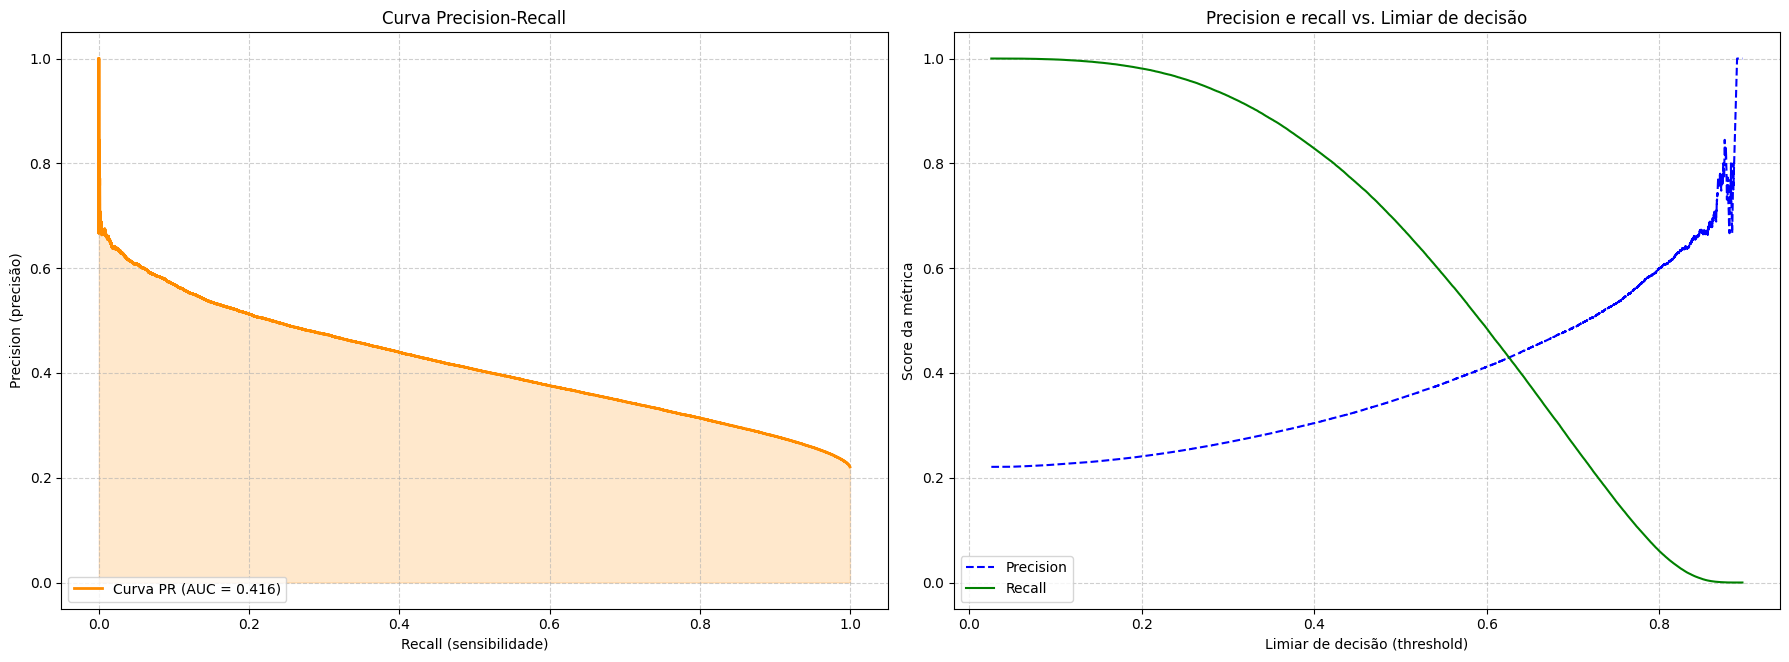

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, auc

# 1. Obter as probabilidades de previsão para cada amostra usando validação cruzada
# Isso evita o vazamento de dados e fornece uma estimativa realista do desempenho.
y_probas = cross_val_predict(
    model_pipeline,
    X_final,
    y,
    cv=cv_strategy,
    method='predict_proba',
    n_jobs=-1
)

# Probabilidades da classe positiva (inadimplentes)
y_scores = y_probas[:, 1]

# 2. Calcular precision, recall e limiares
precision, recall, thresholds = precision_recall_curve(y, y_scores)
auc_pr = auc(recall, precision)

# 3. Criar as visualizações
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1: Curva Precision-Recall
axes[0].plot(recall, precision, color='darkorange', lw=2, label=f'Curva PR (AUC = {auc_pr:.3f})')
axes[0].fill_between(recall, precision, alpha=0.2, color='darkorange')
axes[0].set_xlabel('Recall (sensibilidade)')
axes[0].set_ylabel('Precision (precisão)')
axes[0].set_title('Curva Precision-Recall')
axes[0].legend(loc='lower left')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Gráfico 2: Precision e Recall vs. Limiar de Decisão
axes[1].plot(thresholds, precision[:-1], 'b--', label='Precision')
axes[1].plot(thresholds, recall[:-1], 'g-', label='Recall')
axes[1].set_xlabel('Limiar de decisão (threshold)')
axes[1].set_ylabel('Score da métrica')
axes[1].set_title('Precision e recall vs. Limiar de decisão')
axes[1].legend(loc='best')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Conclusão final

A análise exploratória de dados realizada forneceu uma base sólida para a modelagem preditiva do risco de inadimplência na Lending Club. Através da identificação de variáveis-chave, como `grade`, `sub_grade`, `int_rate`, `fico_range_low` e `dti`, conseguimos entender os fatores que mais influenciam o risco de default. Foram analisadas as distribuições das variáveis numéricas e categóricas, bem como a correlação entre elas e o variável alvo `target_default`.

A análise temporal demonstrou a consistência do sistema de rating da Lending Club em ordenar o risco, embora as taxas absolutas de inadimplência variem significativamente ao longo do tempo, influenciadas por fatores externos. A análise geoespacial revelou padrões regionais significativos, indicando que o risco de inadimplência não é distribuído uniformemente entre os estados dos EUA.

O pré-processamento, baseado nas conclusões da análise exploratória de dados, incluiu a remoção de colunas redundantes, imputação de valores faltantes e transformação de variáveis numéricas e categóricas (encoding), preparando o dataset para algoritmos de machine learning.

Embora não seja o foco do trabalho, observa-se que a modelagem preditiva com LightGBM demonstrou um desempenho moderado, indicando que o modelo é capaz de discriminar entre tomadores adimplentes e inadimplentes, embora haja espaço para melhorias em ações como testar outros modelos, fazer busca de hiperparâmetros e reincluir variáveis que foram descartadas nas análises de associação realizadas na expĺoração de dados.

Abaixo, é mostrado o que se concluiu sobre as hipóteses iniciais levantadas no início do projeto:

- Capacidade de pagamento influencia inadimplência

  - **CONFIRMADA**: A análise de distribuições por grupo de pagamento mostrou que o dti (relação dívida/renda) apresenta diferença significativa entre adimplentes e inadimplentes (+12,6% na mediana, effect size de 0,120). A annual_inc também mostrou relação, embora com menor intensidade (-7,5% na mediana).

- FICO e grades internas concentram a maior parte da informação de risco

  - **CONFIRMADA**: int_rate demonstrou o maior poder discriminatório (effect size: 0,375), enquanto a progressão de risco por sub_grade mostrou aumento consistente da inadimplência de A1 (7,2%) a G5 (60%). O FICO score, mesmo com diferenças absolutas pequenas (-0,7%), apresentou effect size relevante (-0,163).

- O prazo do empréstimo é um fator de risco primário

  - **CONFIRMADA**: Empréstimos de 60 meses apresentaram taxa de inadimplência de 34,2%, quase o dobro dos de 36 meses (17,8%), validando que o maior tempo de exposição aumenta substancialmente o risco.

- Fatores geográficos e macroeconômicos impactam o risco

  - **CONFIRMADA**: A análise geoespacial revelou padrões regionais significativos, com variações de até 15 pontos percentuais entre estados. A análise temporal mostrou que, mesmo mantendo a ordenação de risco constante, as taxas absolutas de inadimplência variaram consideravelmente ao longo dos anos (ex: Grade A oscilou entre 5,5% e 17,1%).


## ANEXO A - Pipeline de anonimização e amostragem estratificada

Este anexo documenta o processo completo de preparação dos dados utilizado para criar a amostra anonimizada carregada no notebook principal.



In [24]:
# CÓDIGO DOCUMENTATIVO - Pipeline de anonimização e amostragem

'''
# 1. Download e configuração
def download_kaggle_dataset(dataset_id='ethon0426/lending-club-20072020q1'):
    """Download do dataset original do Kaggle"""
    try:
        kaggle.api.dataset_download_files(dataset_id, path='.', unzip=True)
        print(f"Dataset baixado: {dataset_id}")
        return True
    except Exception as e:
        print(f"Erro no download: {e}")
        return False

# 2. Carregamento do arquivo principal
def load_lending_club_data():
    """Carrega o dataset principal do Lending Club"""
    filename = 'Loan_status_2007-2020Q3.gzip'

    # O arquivo está em formato CSV, não gzip binário
    df = pd.read_csv(filename, low_memory=False)
    print(f"Dataset original carregado: {df.shape}")
    return df

# 3. Anonimização e filtragem
def anonymize_and_filter_data(df):
    """
    Aplica anonimização e filtros conforme LGPD e requisitos do projeto
    """
    # Filtrar período 2015-2020
    df['issue_d'] = pd.to_datetime(df['issue_d'])
    df_filtered = df[(df['issue_d'] >= '2015-01-01') &
                     (df['issue_d'] <= '2020-12-31')].copy()

    # Criar variável target binária
    paid_status = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
    default_status = ['Charged Off', 'Default', 'Late (31-120 days)',
                     'In Grace Period', 'Does not meet the credit policy. Status:Charged Off',
                     'Late (16-30 days)']

    df_filtered = df_filtered[df_filtered['loan_status'].isin(paid_status + default_status)]
    df_filtered['target_default'] = df_filtered['loan_status'].isin(default_status).astype(int)

    # Remover colunas com vazamento de informação futura
    future_leak_cols = ['last_pymnt_d', 'total_pymnt', 'recoveries',
                       'collection_recovery_fee', 'last_credit_pull_d',
                       'out_prncp', 'out_prncp_inv', 'total_pymnt_inv',
                       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                       'hardship_flag', 'settlement_status', 'settlement_date',
                       'settlement_amount', 'debt_settlement_flag']

    existing_leak_cols = [col for col in future_leak_cols if col in df_filtered.columns]
    df_filtered = df_filtered.drop(columns=existing_leak_cols)

    # Remover identificadores pessoais (LGPD)
    privacy_cols = ['member_id', 'emp_title', 'url', 'desc', 'title']
    existing_privacy_cols = [col for col in privacy_cols if col in df_filtered.columns]
    df_filtered = df_filtered.drop(columns=existing_privacy_cols)

    print(f"Dados anonimizados: {df_filtered.shape}")
    return df_filtered
'''

print("Pipeline de anonimização documentado")
print("Para executar: descomente o código e configure kaggle.json")
print("Código completo disponível em: dataset_anonymization.py")



Pipeline de anonimização documentado
Para executar: descomente o código e configure kaggle.json
Código completo disponível em: dataset_anonymization.py


In [25]:
# CÓDIGO DOCUMENTATIVO - Amostragem Estratificada

'''
def create_stratified_sample(df, target_sample_size=600000):
    """
    Cria amostra estratificada por ano e variável target
    Garante representatividade temporal e de classes
    """
    # Criar estratos combinando ano e target
    df['strata'] = df['ano'].astype(str) + '_' + df['target_default'].astype(str)

    # Calcular proporções dos estratos
    strata_props = df['strata'].value_counts(normalize=True)

    # Calcular tamanhos das amostras por estrato
    sample_sizes = (strata_props * target_sample_size).round().astype(int)

    # Ajustar para atingir exatamente o tamanho desejado
    current_size = sample_sizes.sum()
    if current_size != target_sample_size:
        diff = target_sample_size - current_size
        largest_stratum = sample_sizes.idxmax()
        sample_sizes[largest_stratum] += diff

    # Amostrar de cada estrato
    dfs_sample = []
    for strata, sample_size in sample_sizes.items():
        if sample_size > 0:
            strata_data = df[df['strata'] == strata]

            # Se o estrato tem menos dados que o necessário, pegar todos
            if len(strata_data) <= sample_size:
                sampled = strata_data
            else:
                sampled = strata_data.sample(n=sample_size, random_state=42)
            dfs_sample.append(sampled)

    # Combinar todas as amostras
    df_sample = pd.concat(dfs_sample, ignore_index=True)
    df_sample = df_sample.drop(columns=['strata'])  # Remover coluna auxiliar

    print(f"Amostra estratificada criada: {df_sample.shape}")
    print(f"Taxa de amostragem: {len(df_sample)/len(df):.1%}")

    return df_sample

def save_sample_for_github(df_sample, filename='lending_club_sample_2015_2020.csv.gz'):
    """
    Salva amostra compactada para upload no GitHub
    """
    df_sample.to_csv(filename, compression='gzip', index=False)

    # Verificar tamanho do arquivo
    file_size = os.path.getsize(filename) / (1024**2)  # MB
    print(f"Arquivo salvo: {filename}")
    print(f"Tamanho: {file_size:.1f} MB")

    if file_size < 100:
        print("Compatível com GitHub (<100MB)")
    else:
        print("Arquivo muito grande para GitHub")

    return filename, file_size
'''

print("Algoritmo de amostragem estratificada documentado")
print("Garante representatividade por ano E variável target")
print("Resultado: arquivo <100MB compatível com GitHub")

Algoritmo de amostragem estratificada documentado
Garante representatividade por ano E variável target
Resultado: arquivo <100MB compatível com GitHub


In [26]:
# CÓDIGO DOCUMENTATIVO - Validação da Representatividade

'''
def analyze_temporal_distribution(df_original, df_sample):
    """
    Analisa se a amostra mantém representatividade temporal
    """
    # Distribuição por ano
    original_years = df_original['ano'].value_counts(normalize=True).sort_index()
    sample_years = df_sample['ano'].value_counts(normalize=True).sort_index()

    print("Comparação da distribuição temporal:")
    print("Ano | Original | Amostra  | Diferença")
    print("-" * 40)

    for year in original_years.index:
        orig_pct = original_years[year] * 100
        samp_pct = sample_years.get(year, 0) * 100
        diff = abs(orig_pct - samp_pct)
        print(f"{year} | {orig_pct:6.1f}% | {samp_pct:6.1f}% | {diff:6.1f}pp")

    # Distribuição da variável target
    orig_target = df_original['target_default'].value_counts(normalize=True)
    samp_target = df_sample['target_default'].value_counts(normalize=True)

    print(f"\nDistribuição da variável target:")
    print(f"Classe | Original | Amostra  | Diferença")
    print("-" * 40)
    for cls in [0, 1]:
        orig_pct = orig_target[cls] * 100
        samp_pct = samp_target[cls] * 100
        diff = abs(orig_pct - samp_pct)
        print(f"   {cls}   | {orig_pct:6.1f}% | {samp_pct:6.1f}% | {diff:6.1f}pp")

# Pipeline completo
def process_lending_club_pipeline(dataset_id='ethon0426/lending-club-20072020q1',
                                 target_sample_size=600000):
    """
    Pipeline completo: download → anonimização → amostragem → salvamento
    """
    print("Iniciando pipeline completo...")

    # 1. Download
    if not download_kaggle_dataset(dataset_id):
        return None, None

    # 2. Carregamento
    df_original = load_lending_club_data()

    # 3. Anonimização
    df_clean = anonymize_and_filter_data(df_original)

    # 4. Amostragem estratificada
    df_sample = create_stratified_sample(df_clean, target_sample_size)

    # 5. Salvamento
    filename, file_size = save_sample_for_github(df_sample)

    # 6. Validação
    analyze_temporal_distribution(df_clean, df_sample)

    # Informações do processo
    process_info = {
        'original_shape': df_original.shape,
        'filtered_shape': df_clean.shape,
        'sample_shape': df_sample.shape,
        'file_info': {'filename': filename, 'file_size_mb': file_size}
    }

    print("Pipeline concluído com sucesso!")
    return df_sample, process_info
'''

print("Validação de representatividade documentada")
print("Pipeline completo disponível em dataset_anonymization.py")
print("Para desenvolvedores: import dataset_anonymization; process_lending_club_pipeline()")

Validação de representatividade documentada
Pipeline completo disponível em dataset_anonymization.py
Para desenvolvedores: import dataset_anonymization; process_lending_club_pipeline()
